<a href="https://colab.research.google.com/github/titwan37/GCLRrepo/blob/main/cesr_OICHandshakes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pre-requisites

In [ ]:
#!pip install pandas
#!pip install plotly
#!pip install networkx

import numpy as np
import pandas as pd

In [ ]:
import os

def getFolderFileList(folder_path = "path/to/folder"):  # Replace with the actual folder path
  try:
      file_list = os.listdir(folder_path)
      print(f"Files in the folder: {folder_path}")
      for file in file_list: print(file)
  except FileNotFoundError:
      print("Folder not found. Please check the folder path and try again.")
  return file_list

In [ ]:
from datetime import datetime, timedelta

study_period = 60
studyDate = '07.26.2024'
studyDatetime = '2024-07-26 19:30:00'

end_date = datetime.now().date()
start_date = end_date - timedelta(days=study_period)
dates = lambda start, end, format: [start + timedelta(days=x) for x in range((end-start).days + 1)]
print(dates)
format = '%Y-%m-%d'
#datefiles = [ '2024-02-01','2024-02-02', '2024-02-20', '2024-02-22', '2024-02-23', '2024-03-11', '2024-03-12']  #, '2024-02-29'
datefiles = [date.strftime(format) for date in dates(start_date, end_date, format)]
datefile = datefiles[-1]

print(datefiles)

<function <lambda> at 0x786d6d91b2e0>
['2024-06-08', '2024-06-09', '2024-06-10', '2024-06-11', '2024-06-12', '2024-06-13', '2024-06-14', '2024-06-15', '2024-06-16', '2024-06-17', '2024-06-18', '2024-06-19', '2024-06-20', '2024-06-21', '2024-06-22', '2024-06-23', '2024-06-24', '2024-06-25', '2024-06-26', '2024-06-27', '2024-06-28', '2024-06-29', '2024-06-30', '2024-07-01', '2024-07-02', '2024-07-03', '2024-07-04', '2024-07-05', '2024-07-06', '2024-07-07', '2024-07-08', '2024-07-09', '2024-07-10', '2024-07-11', '2024-07-12', '2024-07-13', '2024-07-14', '2024-07-15', '2024-07-16', '2024-07-17', '2024-07-18', '2024-07-19', '2024-07-20', '2024-07-21', '2024-07-22', '2024-07-23', '2024-07-24', '2024-07-25', '2024-07-26', '2024-07-27', '2024-07-28', '2024-07-29', '2024-07-30', '2024-07-31', '2024-08-01', '2024-08-02', '2024-08-03', '2024-08-04', '2024-08-05', '2024-08-06', '2024-08-07']


In [ ]:
#@title Mounting Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
sourcefolder = 'C://Users/falempia/Downloads/DropBox/'
sourcefolder = '/content/'
targetfolder = '/content/drive/MyDrive/Colab_output/'
nodes = ['node1', 'node2' ]

fileradical = '_CPCLogs_HandshakeEvents__GlobalValues.csv'
hanshakefilenames = [ [sourcefolder + datefile  + ''+ fileradical, datefile] for datefile in datefiles]
print(hanshakefilenames)

globalCFCallfilename = targetfolder + datefile + '_MES_IMSAPI_' + 'GlobalCFCalls_col.csv'
globalCFCallfilename_pur = targetfolder + datefile + '_MES_IMSAPI_' + 'GlobalCFCalls_pur.csv'

[['/content/2024-06-08_CPCLogs_HandshakeEvents__GlobalValues.csv', '2024-06-08'], ['/content/2024-06-09_CPCLogs_HandshakeEvents__GlobalValues.csv', '2024-06-09'], ['/content/2024-06-10_CPCLogs_HandshakeEvents__GlobalValues.csv', '2024-06-10'], ['/content/2024-06-11_CPCLogs_HandshakeEvents__GlobalValues.csv', '2024-06-11'], ['/content/2024-06-12_CPCLogs_HandshakeEvents__GlobalValues.csv', '2024-06-12'], ['/content/2024-06-13_CPCLogs_HandshakeEvents__GlobalValues.csv', '2024-06-13'], ['/content/2024-06-14_CPCLogs_HandshakeEvents__GlobalValues.csv', '2024-06-14'], ['/content/2024-06-15_CPCLogs_HandshakeEvents__GlobalValues.csv', '2024-06-15'], ['/content/2024-06-16_CPCLogs_HandshakeEvents__GlobalValues.csv', '2024-06-16'], ['/content/2024-06-17_CPCLogs_HandshakeEvents__GlobalValues.csv', '2024-06-17'], ['/content/2024-06-18_CPCLogs_HandshakeEvents__GlobalValues.csv', '2024-06-18'], ['/content/2024-06-19_CPCLogs_HandshakeEvents__GlobalValues.csv', '2024-06-19'], ['/content/2024-06-20_CPCLo

## Data Import

In [ ]:
# @title echo Ranks
def echoValueRanked(df, colName):
  # Step 1: Extract method names
  method_names = df[colName]
  # Step 2: Count occurrences of each method name
  method_counts = method_names.value_counts()
  # Step 3: Sort method names based on counts in descending order
  sorted_method_names = method_counts.index.tolist()
  # Print the sorted method names
  print(sorted_method_names)
  return sorted_method_names
def echoValueCount(df, colName):
  echoValueRanked(df, colName)
  count = df[colName].value_counts().sort_values(ascending=False)
  print(f'{colName} Count=\n{count}')
  # Convert the MultiIndex to a DataFrame
  table_df = count.reset_index().rename(columns={'index': 'Value', 0: 'Count'})
  return table_df
def echoColumnCount(df, colName):
  count = len(df[colName].unique())
  print(f'{colName} Count = {count}')
  return count

def echoTopRank1(df, colName):
    # Extract the custom error string using regex
    #df['custom_error_string'] = df['rdf'].str.extract(r'custom_error_string:\s*(.*)')
    # Drop rows with NaN values in the 'customErrorString' column
    dff = df.dropna(subset=[colName])
    # Count the occurrences of each customErrorString
    custom_error_counts = dff[colName].value_counts().sort_values(ascending=False)
    # Convert the MultiIndex to a DataFrame
    table_df = custom_error_counts.reset_index().rename(columns={'index': 'Value', 0: 'Count'})
    return table_df

def echoTopRank2(df, colName):
    dff = df.dropna(subset=[colName])
    # Count the occurrences of each customErrorString
    custom_error_counts = dff[colName].value_counts().sort_values(ascending=False)
    # Get the top rank for each customErrorString  # .rank(method='min', ascending=False)
    top_ranks = custom_error_counts.groupby(custom_error_counts).apply(lambda x: x.index.tolist())
    return top_ranks

def echoPerformance(df, subset, colName):
  #To calculate the minimum value, maximum value, average value, and standard deviation value of the 'duration' column per groups of columns in a DataFrame
  #grouped_df = df.groupby(subset)[colName].agg(['min', 'max', 'mean', 'std'])
  grouped_df = df.groupby(subset).agg({colName: ['count', 'min', 'max', 'mean', 'std']})
  #grouped_df = df.groupby(subset)[colName].agg({['count', 'min', 'max', 'mean', 'std']})
  return grouped_df

def echoFirstOccurence(rdf, indexedColumn, sortingColumn='datetime'):
  # Assuming your dataframe has a 'workorderNumber' column
  # Filter the dataframe to keep only the first occurrence of each unique workorderNumber
  first_occurrence_df = rdf.drop_duplicates(subset=indexedColumn)
  # Set 'workorderNumber' as the index
  first_occurrence_df = first_occurrence_df.set_index(indexedColumn)
  sortedfirstO_df = first_occurrence_df.sort_values(sortingColumn)
  # Display the workorderNumber and timestamp columns of the first occurrence dataframe without showing the index column
  print(sortedfirstO_df[[sortingColumn]].to_string(index=True))
  return sortedfirstO_df

In [ ]:
# @title Parsing Data
def hasPipe(value):
  ret = False
  if (value is not None):
    if (  '|' in value):
      ret = True
  return ret

def hasSemiColumn(value):
  ret = False
  if (value is not None):
    if (  ';' in value):
      ret = True
  return ret

def convertColumnToInteger(df, column_name):
  if (column_name in df.columns):
    # Convert the 'column_name' column from string to integer
    #df[column_name] = df[column_name].astype(int)
    # Convert string column to integer coerce empty string
    df[column_name] = pd.to_numeric(df[column_name], errors='coerce').fillna(0).astype(int)
  return df

# def get_substring_before_pipe(value):
#     index = value.find('|')
#     if index != -1:
#         return value[:index]
#     else:
#         return value

def get_substring_before_pipe(value):
    return value.split('|')

def getHeaderIndex(dataframe, header):
    if (header in dataframe.columns):
      column_number = dataframe.columns.get_loc(header)
      return column_number
    else:
      return -1

def assign_new_header(dataframe, column_number, new_header):
    if (column_number<len(dataframe.columns)):
      dataframe.rename(columns={dataframe.columns[column_number]: new_header}, inplace=True)
      return column_number
    else :
      # Create a new column
      dataframe[new_header] = None
      column_number = getHeaderIndex(dataframe, new_header)
      return column_number

def create_new_header(dataframe, new_header):
    column_number = len(dataframe.columns)
    if (new_header not in dataframe.columns):
      column_number = assign_new_header(dataframe, column_number, new_header)
      print (f'New column created for : {column_number} -> {new_header}')
      return column_number
    else :
      column_number = getHeaderIndex(dataframe, new_header)
      return column_number

def assign_new_value(dataframe, index, column, new_value):
    if (hasSemiColumn(new_value)):
        sub_values = new_value.split(';')
        if (len(sub_values)==2):
          #print (sub_values)
          new_header = sub_values[0]
          # create new Header
          column = create_new_header(dataframe, new_header)
          dataframe.at[index, new_header] = sub_values[1] # -> change value
        else: # more or less
          dataframe.at[index, column] =  new_value # -> change value
    else:
        dataframe.at[index, column] = new_value  # -> change value

def assignColumnHeaders(dataframe):
  # Iterate over each row to find new Headers
  for index, row in dataframe.iterrows():
    # Iterate over each column
    for column, value in row.items():
        # Assign column header based on specific condition
        if hasPipe(value):
            split_vals = get_substring_before_pipe(value)
            if(len(split_vals)>0):
              new_header = split_vals[0].strip()
              if (new_header=='RC'):
                if (column==8): new_header = 'CT2'
              if (new_header=='RC'):
                #print(column)
                if (column==9): new_header = 'RC'

              new_value =  split_vals[1]
              # create new Header  by forcing the naming
              if (dataframe.columns[column] != new_header):
                  assign_new_header(dataframe, column, new_header)
              # assign value
              assign_new_value(dataframe, index, new_header, new_value)


def assign_new_value(dataframe, index, column, new_value):
    if (hasSemiColumn(new_value)):
        sub_values = new_value.split(';')
        if (len(sub_values)==2):
          #print (sub_values)
          new_header = sub_values[0]
          # create new Header
          column = create_new_header(dataframe, new_header)
          dataframe.at[index, new_header] = sub_values[1] # -> change value
        else: # more or less
          dataframe.at[index, column] =  new_value # -> change value
    else:
        dataframe.at[index, column] = new_value  # -> change value

def assignColumnHeaders(dataframe):
  # Iterate over each row to find new Headers
  for index, row in dataframe.iterrows():
    # Iterate over each column
    for column, value in row.items():
        # Assign column header based on specific condition
        if hasPipe(value):
            split_vals = get_substring_before_pipe(value)
            if(len(split_vals)>0):
              new_header = split_vals[0].strip()
              if (new_header=='RC'):
                if (column==8): new_header = 'CT2'
              if (new_header=='RC'):
                #print(column)
                if (column==9): new_header = 'RC'

              new_value =  split_vals[1]
              # create new Header  by forcing the naming
              if (dataframe.columns[column] != new_header):
                  assign_new_header(dataframe, column, new_header)
              # assign value
              assign_new_value(dataframe, index, new_header, new_value)

In [ ]:
# @title import tooling
import re
import numpy as np
import pandas as pd
from datetime import datetime, timedelta

def importDataset(filename, datefile, node=None):
  df = pd.DataFrame()
  if os.path.isfile(filename):  # Check if the file exists
    try:
      # Try reading with UTF-8 first
      df = pd.read_csv(filename, sep=';', on_bad_lines='skip', encoding='utf-8')
      print('read as '+ 'utf-8')
    except UnicodeDecodeError:
      # If UTF-8 fails, try Latin-1
      df = pd.read_csv(filename, sep=';', on_bad_lines='skip', encoding='latin-1')
      print('read as '+ 'latin-1')
    except FileNotFoundError:
        print(f"{filename} File not found for {datefile}. Please check the file path and try again.")
    except pd.errors.ParserError as e:
        print(f"Error parsing CSV file: {e}")

    # Continue with your data processing
    headers = df.columns
    if ('filename' not in headers):
      df.insert(1, 'filename', filename)
    if (node is not None):
      df.insert(1, 'node', node)
    else:
      df.insert(1, 'node', 'opcua')
    # insert datefile
    df.insert(1, 'datefile', datefile)
    # insert DNF
    df.insert(2, 'DNF', df['datefile'].str.cat([df['node'], df['filename']], sep='_'))
    headers = df.columns
    #print(headers)
  else:
    print(f"{filename} File not found for {datefile}. Please check the file path and try again.")
  return df

# def extractSerialNumbers(inArgs):
#     serial_numbers_string = ''
#     pattern = r'((011|012|11|12)\d{7,9})'
#     if (inArgs is not None):
#       serial_numbers = re.findall(pattern, str(inArgs))
#       if (len(serial_numbers)>0):
#         serial_numbers_string = serial_numbers[0]
#       elif (len(serial_numbers)>1):
#         serial_numbers_string = ', '.join(serial_numbers)  # Concatenate serial numbers with a delimiter
#       else:
#         serial_numbers_string = ''
#     return serial_numbers_string

            #serial_numbers_string = ', '.join([match[0] for match in serial_numbers]) # Concatenate serial numbers with a delimiter

def extractSerialNumbers(inArgs):
    serial_numbers_string = ''
    pattern = r'\b(?P<serialNumber>(011|012|11|12)\d{8,9})\b' # \b  word boundary 0 (11|12) matches either '11' or '12' \d{7,9} matches 7 to 9 digits
    if inArgs is not None:
        serial_numbers = re.findall(pattern, str(inArgs))
        if len(serial_numbers) > 0:
            serial_numbers_string = serial_numbers[0][0]
        elif len(serial_numbers) > 1:
            serial_numbers_string = ', '.join(serial_numbers[0]) # Concatenate serial numbers with a delimiter
        else:
          serial_numbers_string = ''
    return serial_numbers_string

def extractWorkorderNumber(inArgs):
    workorderNumbers_string = ''
    pattern = r'(112\d{5})'  # Regular expression pattern to match 8-digit serial numbers starting with '112'
    if (inArgs is not None):
      workorderNumbers = re.findall(pattern, str(inArgs))
      if (len(workorderNumbers)>0):
        workorderNumbers_string = workorderNumbers[0]
      elif (len(workorderNumbers)>1):
        workorderNumbers_string = ', '.join(workorderNumbers)  # Concatenate serial numbers with a delimiter
      else:
        workorderNumbers_string = ''
    return workorderNumbers_string

def addWorkorderColumn(df,workorderNumberColumnName, sourceColumnName):
    if workorderNumberColumnName not in df.columns:
        df[workorderNumberColumnName] = ''
    if (sourceColumnName in df.columns):
       df[workorderNumberColumnName] = df.apply(lambda row: extractWorkorderNumber(row[sourceColumnName]) if row[workorderNumberColumnName] == '' else row[workorderNumberColumnName], axis=1)
    else:
      print(f'column {sourceColumnName} is not found!!!!')
    return df

def addSerialNumerColumn(df,serialNumberColumnName, sourceColumnName):
    if serialNumberColumnName not in df.columns:
        df[serialNumberColumnName] = ''
    if (sourceColumnName in df.columns):
      #df.insert(0, serialNumberColumnName, extractSerialNumbers(df[sourceColumnName]))  # Insert the serial numbers as a new column
      #df[serialNumberColumnName] = extractSerialNumbers(df[sourceColumnName])
      #df[serialNumberColumnName] = df[sourceColumnName].apply(extractSerialNumbers)  # Apply the extractSerialNumbers function to each row
      #df[serialNumberColumnName] = df.apply(lambda row: extractSerialNumbers(row[sourceColumnName]), axis=1)
       df[serialNumberColumnName] = df.apply(lambda row: extractSerialNumbers(row[sourceColumnName]) if row[serialNumberColumnName] == '' else row[serialNumberColumnName], axis=1)
    else:
      print(f'column {sourceColumnName} is not found!!!!')
    return df

def addSerialNumer(rdf):
    insertPosition = rdf.columns.get_loc('serviceName')
    rdf.insert(insertPosition, 'serialNumber','')

    if 'inArgs' in rdf.columns:
        rdf = addSerialNumerColumn(rdf, 'serialNumber', 'inArgs')

    if 'outArgs' in rdf.columns:
        rdf = addSerialNumerColumn(rdf, 'serialNumber', 'outArgs')

    uniqueSN_values = rdf['serialNumber'].unique()
    print("________________________________________________")
    print(f"Unique serialNumber values : {uniqueSN_values}")
    print("________________________________________________")
    uniqueSN_counts = rdf['serialNumber'].value_counts().sort_values(ascending=False)
    print(f"Unique serialNumber counts : {uniqueSN_counts}")
    print("________________________________________________")

    return rdf

def addWorkorder(rdf):
  insertPosition = rdf.columns.get_loc('serviceName')
  rdf.insert(insertPosition, 'workorderNumber','')
  if 'inArgs' in rdf.columns:
    rdf = addWorkorderColumn(rdf,'workorderNumber', 'inArgs')
  if 'outArgs' in rdf.columns:
    rdf = addWorkorderColumn(rdf,'workorderNumber', 'outArgs')

  uniqueWO_values = rdf['workorderNumber'].unique()
  print("________________________________________________")
  print(f"Unique workorderNumber values : {uniqueWO_values}")
  print("________________________________________________")
  uniqueWO_counts = rdf['workorderNumber'].value_counts().sort_values(ascending=False)
  print(f"Unique workorderNumber counts : {uniqueWO_counts}")
  print("________________________________________________")
  return rdf

def addDateTimeColumn(df, timestampString, datetime):
  # Add a new column 'Row Number' with sequentially numbered rows
  #df['rowIndex'] = range(1, len(df) + 1)
  df.insert(0, 'rowIndex', range(1, len(df) + 1))
  try:
    # Assuming you have a DataFrame named 'df' with a column named 'datetime' containing timestamp strings
    df.insert(0, datetime,     pd.to_datetime(df[timestampString]))
  except Exception as e:
    print("An error occurred:", str(e))
  return df

def filterByDateTime(df, notOlderDays=5):
  # Assuming your DataFrame is named 'df' and the datetime column is named 'date'
  current_date = datetime.now()  # Get the current date and time
  five_days_ago = current_date - timedelta(days=notOlderDays)  # Calculate the date 5 days ago
  if ('datetime' in df.columns):
    filtered_df = df[df['datetime'] <= current_date]  # Filter the DataFrame to include rows with dates newer than today
    filtered_df = filtered_df[filtered_df['datetime'] >= five_days_ago]  # Filter the DataFrame to include rows with dates not older than 5 days

    printFirstRow(filtered_df)
    print('#####################################')
    getShapeSize('All filtered dates',filtered_df)
    return filtered_df
  else:
    print('CAUTION> Cannot find datetime column')
    return df

def printFirstRow(dataset):
  first_row = dataset.iloc[0]
  print(first_row)

def getShapeSize(label='', df=None):
  # Assuming you have a DataFrame called 'df'
  dimensions = df.shape
  num_rows = dimensions[0]
  num_columns = dimensions[1]
  print(f"Dataframe={label} has Number of rows: {num_rows} and columns : {num_columns}")
  return dimensions

def allCapitalLettersInColumns(df, colName):
  # Transform the 'manufacturer' column to capital letters
  df[colName] = df[colName].str.upper()
  return df

def removePrefixInColumn(df, colName, prefix):
  if (colName in df.columns):
    # Remove a specific pattern from the 'methodName' column
    #df[colName] = df[colName].str.replace(prefix, '')
    #df[colName] = df[colName].str.lstrip(prefix)
    df[colName] = df[colName].str.replace(f'^{re.escape(prefix)}', '', regex=True)
  else:
    print(f'column {colName} is not found!!!!')
  return df

def getColumnNames(dnp, title=''):
  print ('############ ' + title)
  cols = dnp.columns.values.tolist()
  for col in range(len(cols)): print(f'index ({col}) -> {cols[col]}')
  return cols

def printFirstRow(dataset):
  print ('############')
  first_row = dataset.iloc[0]
  print(first_row)

def printFirstRowNotEmpty(dataset, columnName):
    print('############')
    if (columnName in dataset.columns):
      first_non_empty_row = dataset[dataset[columnName] != ''].iloc[0]
      if (first_non_empty_row):
        print(first_non_empty_row)
      else:
        print('Every row is empty.')
    else:
      print(f'column {columnName} is not found!!!!')

def reduceDFColumns(df, nbCol):
  # Create a clone of the dataframe and drop the last 3 columns
  #df_clone = df.copy()
  df_clone = df.iloc[:, :-1*nbCol]
  return df_clone

# node1_df = importDataset(imsapifilenames[0])
# node2_df = importDataset(imsapifilenames[1])
# getShapeSize('node1_df', node1_df)
# #getColumnNames(node1_df, 'node1_df')
# getShapeSize('node2_df',node2_df)
# #getColumnNames(node2_df, 'node2_df')

def removeDuplicates(df):
    # Convert 'timestampString' column to string
    df['timestampString'] = df['timestampString'].astype(str)
    # Handle the ValueError if it occurs
    # Handle the ValueError here, such as providing a default value or performing alternative actions
    try:
        df['timestampString'] = df['timestampString'].apply(lambda x: datetime.strptime(x, "%Y.%m.%dT%H:%M:%S.%f"))
    except ValueError as e:
        print(f"ValueError: {e}")

    # Convert 'timestampString' column to datetime
    df['timestampString'] = pd.to_datetime(df['timestampString'], errors='coerce')

    # Sort the DataFrame by 'datefile' column in ascending order
    df.sort_values('datefile', inplace=True)
    # Drop duplicates based on the specified conditions, keeping the first occurrence
    df.drop_duplicates(subset=['index', 'thread', 'timestampString'], keep='first', inplace=True)
    # Reset the index of the DataFrame
    df.reset_index(drop=True, inplace=True)
    return df

def removeDuplicateRows(df, columns):
    # Drop duplicates based on specified columns, keeping the first occurrence
    df.drop_duplicates(subset=columns, keep='first', inplace=True)
    # Reset the index of the DataFrame
    df.reset_index(drop=True, inplace=True)
    return df

In [ ]:
# @title aggregate & merge
def aggregateIMSAPIFileDataFrame(imsapifilenames):
  print(imsapifilenames)
  nodes_df = []
  for imsapifileobj in imsapifilenames:
    imsapifilename = imsapifileobj[0]
    imsapidatefile = imsapifileobj[1]
    imsapinode = imsapifileobj[2]
    nodeZ_df = importDataset(imsapifilename, imsapidatefile, imsapinode)
    dim = getShapeSize(imsapifilename, nodeZ_df)
    if (dim[0]>0):
      nodes_df.append(nodeZ_df)
    else:
      print(f'Expected File:\n{imsapifilename}')

  aggregated_df = pd.DataFrame()
  if len(nodes_df) > 0:
      aggregated_df = pd.concat(nodes_df, ignore_index=True, axis=0)
      # Measure the number of duplicates
      num_duplicates = aggregated_df.duplicated().sum()
      print(f"Number of duplicates: {num_duplicates}")
      # Remove duplicates
      #aggregated_df = aggregated_df[~aggregated_df.index.duplicated()]
      aggregated_df = aggregated_df.drop_duplicates() # remove duplicates
      deduplicated_df = removeDuplicates(aggregated_df)
      # Reindex the DataFrame
      aggregated_df = deduplicated_df.reindex()
  return aggregated_df

def aggregateOICLogileDataFrame(hanshakefilenames):
  print(hanshakefilenames)
  nodes_df = []
  node = 'OIClogs'
  aggregated_df = pd.DataFrame()
  for items in hanshakefilenames:
    filename = items[0]
    datefile = items[1]
    nodeZ_df = importDataset(filename, datefile, node)
    dim = getShapeSize(filename, nodeZ_df)
    if (dim[0]>0):
      nodes_df.append(nodeZ_df)
    else:
      print(f'Expected File:\n{filename}')

  if len(nodes_df) > 0:
      aggregated_df = pd.concat(nodes_df, axis=0)
  return aggregated_df

def aggregateOPCUAFileDataFrame(opcuafilenames):
  print(opcuafilenames)
  nodes_df = []
  for opcfileobj in opcuafilenames:
    filename = opcfileobj[0]
    datefile = opcfileobj[1]
    node = None
    nodeZ_df = importDataset(filename, datefile, node)
    dim = getShapeSize(filename, nodeZ_df)
    if (dim[0]>0):
      nodes_df.append(nodeZ_df)
    else:
      print(f'Expected File:\n{filename}')

  aggregated_df = pd.DataFrame()
  if len(nodes_df) > 0:
      aggregated_df = pd.concat(nodes_df, axis=0)
      # Measure the number of duplicates
      num_duplicates = aggregated_df.duplicated().sum()
      print(f"Number of duplicates: {num_duplicates}")
      # Remove duplicates
      #aggregated_df = aggregated_df[~aggregated_df.index.duplicated()]
      aggregated_df = aggregated_df.drop_duplicates() # remove duplicates
      deduplicated_df = removeDuplicates(aggregated_df)
      # Reindex the DataFrame
      aggregated_df = deduplicated_df.reindex()
  return aggregated_df

def aggregateMainServiceFileDataFrame(mainopcuafilenames):
  print(mainopcuafilenames)
  nodes_df = []
  for opcfileobj in mainopcuafilenames:
    filename = opcfileobj[0]
    datefile = opcfileobj[1]
    node = None
    nodeZ_df = importDataset(filename, datefile, node)
    dim = getShapeSize(filename, nodeZ_df)
    if (dim[0]>0):
      nodes_df.append(nodeZ_df)
    else:
      print(f'Expected File:\n{filename}')

  aggregated_df = pd.DataFrame()
  if len(nodes_df) > 0:
      aggregated_df = pd.concat(nodes_df, axis=0)
      # Measure the number of duplicates
      num_duplicates = aggregated_df.duplicated().sum()
      print(f"Number of duplicates: {num_duplicates}")
      # Remove duplicates
      #aggregated_df = aggregated_df[~aggregated_df.index.duplicated()]
      aggregated_df = aggregated_df.drop_duplicates() # remove duplicates
      deduplicated_df = removeDuplicates(aggregated_df)
      # Reindex the DataFrame
      aggregated_df = deduplicated_df.reindex()
  return aggregated_df

def mergeRCodeandCError(df_C):
  # Assuming dataframe A is named 'df_A' and dataframe B is named 'df_B'
  # Select the desired columns from dataframe A
  #df_A_selected = df_A[['returnCode', 'customError']]
  df_C['returnCode'].fillna(df_C['return_value'], inplace=True)

  # Select the desired columns from dataframe B
  #df_B_selected = df_B[['return_value', 'customErrorString']]
  df_C['customErrorString'].fillna(df_C['customError'], inplace=True)
  # Merge the selected columns from dataframe A and dataframe B into a new dataframe C
  #df_C = pd.concat([df_A_selected, df_B_selected], axis=1)
  #df_C.drop(columns=['return_value', 'customError'], inplace=True)
  # Print the resulting dataframe C
  #print(df_C)
  return df_C

def mergeAggregatedDF(aggregatedIMS_df, aggregatedOPC_df):
  aggregatedIMS_df = aggregatedIMS_df.reset_index(drop=True)
  num_rows = aggregatedIMS_df.count()
  print(f'Number of rows from IMSapi is equal to : {num_rows}')
  aggregatedOPC_df = aggregatedOPC_df.reset_index(drop=True)
  num_rows = aggregatedOPC_df.count()
  print(f'Number of rows from OPCUA is equal to : {num_rows}')

  # aggregated_df = pd.DataFrame()
  # if len(aggregatedIMS_df) > 0:
  #     aggregated_df = pd.concat(aggregatedIMS_df, axis=0)
  # if len(aggregatedOPC_df) > 0:
  #     aggregated_df = pd.concat(aggregatedOPC_df, axis=0)
  aggregated_df = pd.DataFrame()
  if len(aggregatedIMS_df) > 0:
      aggregated_df = pd.concat([aggregated_df, aggregatedIMS_df], ignore_index=True, axis=0)
  if len(aggregatedOPC_df) > 0:
      aggregated_df = pd.concat([aggregated_df, aggregatedOPC_df], ignore_index=True, axis=0)
  if len(aggregated_df) > 0:
      # errorCode
        aggregated_df = mergeRCodeandCError(aggregated_df)
        #workstation
        aggregated_df['workstationNumber'] = aggregatedIMS_df['workstationNumber'].combine_first(aggregatedOPC_df['StationNumber'])

  num_rows = aggregated_df.count()
  print(f'Number of rows from aggregated_df is equal to : {num_rows}')

  # column index
  #aggregated_df = aggregatedIMS_df.set_index('column').join(aggregatedOPC_df.set_index('column'))

  # Reindex the DataFrame
  aggregated_df = aggregated_df.reindex()
  print(f'Rows are reindexed.')

  return aggregated_df

def mergeWorkstationNumber(aggregated_df):
  #aggregated_df['workstationNumber'].astype(str).str.cat(aggregatedOPC_df['StationNumber'].astype(str), sep='')
  #aggregated_df['workstationNumber'] = aggregated_df['workstationNumber'].astype(str).str.cat(aggregated_df['StationNumber'].astype(str), sep='')
  # Assuming you have two DataFrames: df1 and df2
  if ('workstationNumber' in aggregated_df.columns):
    if ('StationNumber' in aggregated_df.columns):
      aggregated_df['workstationNumber'] = aggregated_df['workstationNumber'].fillna(aggregated_df['StationNumber'])
  return aggregated_df


## Filter Execution

### Filter by Datetime

In [ ]:
import datetime as dt
from datetime import datetime, timedelta

In [ ]:
def createSimpleCountTable(figsize, rdf, ySeries):
  # Assuming your DataFrame is named 'df'
  table = rdf.groupby(ySeries).size().reset_index(name='count')
  # Sort the table by the 'methodName' column
  if len(ySeries)>0:
    table = table.sort_values(ySeries[0])
  # Create the histogram
  fig, ax = plt.subplots(figsize=figsize) # , layout='constrained'
  ax.axis('off')  # Hide the axis
  ax.table(cellText=table.values, colLabels=table.columns, loc='center')
  # # Show the figure
  plt.show()
  return fig

def createDoubleCountTable(figsize, rdf, ySerie1, ySerie2):
  # Assuming your DataFrame is named 'df'
  table = rdf.groupby([ySerie1, ySerie2]).size().reset_index(name='count')
  table = table.sort_values(by='count', ascending=False)  # Sort values by descending counts
  # Create the histogram
  fig, ax = plt.subplots(figsize=figsize) # , layout='constrained'
  ax.axis('off')  # Hide the axis
  ax.table(cellText=table.values, colLabels=table.columns, loc='center')
  # # Show the figure
  plt.show()
  return fig

def showMinMaxDates(df, legend=''):
  min_date = df['datetime'].min()
  max_date = df['datetime'].max()
  print (f'Legend:{legend}, Min date: {min_date}, Max date: {max_date}')
  result_df = df.groupby('machineName')['datetime'].agg(['first', 'last'])
  fig = createSimpleCountTable((8,4), result_df, ['machineName','first', 'last'])
  return result_df

def showMinMaxInColumn(df, colName, legend=''):
  min_date = df[colName].min()
  max_date = df[colName].max()
  print (f'Legend:{legend}, Min : {min_date}, Max : {max_date}')
  result_df = df.groupby('machineName')[colName].agg(['min', 'max'])
  fig = createSimpleCountTable((8,4), result_df, ['machineName','min', 'max'])
  return result_df

In [ ]:
def getShorterTime(ts):
  # Remove milliseconds and seconds from the rounded datetime
  #shorter_ts = ts.replace(second=0, microsecond=0)

  shorter_ts = ts.replace(microsecond=0) # second=0,

  #print(type(shorter_ts))
  # truncate time string
  #string_ts = np.datetime_as_string(shorter_ts)
  string_ts = str(shorter_ts)
  string_ts  = string_ts[:len(string_ts)]
  str_rounded_max_time = string_ts #+'.00 +01'
  return str_rounded_max_time

def getRoundMinTime(dnp):
  date_format = '%Y-%m-%d %H:%M:%S'
  # Check the length of the X-axis
  len_axis = len(dnp["datetime"])
  if (len_axis>0):
    # Set the minimum value on the X-axis
    min_time = dnp["datetime"].iloc[0]
  else:
    min_time = start_date
  ######
  datetime_str = str(min_time)[:23]
  #datetime_obj = datetime.datetime.strptime(datetime_str, '%Y-%m-%d %H:%M:%S.%f %z')
  datetime_obj = datetime.strptime(datetime_str,date_format)
  ######
  if (isinstance(min_time, datetime)):
    return min_time
  else:
    return datetime_obj

def getRoundMaxTime(dnp):
  #print (type(max_time))
  date_format = '%Y-%m-%d %H:%M:%S.%f %z'
  date_format = '%Y-%m-%d %H:%M:%S.%f'
  date_format = '%Y-%m-%d %H:%M:%S'
  # Check the length of the axis
  len_axis = len(dnp["datetime"])
  if (len_axis>1):
    # Set the maximum value on the X-axis
    max_time = dnp["datetime"].iloc[-1]
  elif (len_axis>0):
    # Set the maximum value on the X-axis
    max_time = dnp["datetime"].iloc[0]
  else:
    max_time = end_date

  # print (f'Max Time1 = {max_time}')
  # Calculate the number of minutes to the next 5-minute interval
  minutes_to_next_interval = (5 - (max_time.minute % 5)) % 5
  # Round the datetime to the next 5-minute interval
  rounded_max_time = max_time + timedelta(minutes=minutes_to_next_interval)
  # Round the datetime to the nearest 5-minute interval
  #rounded_dt = dt - timedelta(minutes=dt.minute % 5,seconds=dt.second,microseconds=dt.microsecond)
  str_rounded_max_time = getShorterTime(rounded_max_time)
  #rounded_max_time = pd.to_datetime(str_rounded_max_time)
  # print (f'Max Time2 = {str_rounded_max_time}')
  ######
  datetime_str = str(str_rounded_max_time)
  datetime_str = datetime_str[:23]  # Remove the remaining unconverted data
  # print (f'Max Time3 = {datetime_str}')
  datetime_obj = datetime.strptime(datetime_str, date_format)
  #datetime_obj = datetime.strptime(datetime_str[:-3] + datetime_str[-2:], '%Y-%m-%d %H:%M:%S %z')
  #datetime_obj = datetime.datetime.strptime(datetime_str)
  ######
  if (isinstance(rounded_max_time, datetime)):
    return rounded_max_time
  else:
    return datetime_obj


def filterByDate(dnp):
  #######  DATE Filtering
  date_format = '%Y-%m-%d %H:%M:%S.%f %z'
  date_format = '%Y-%m-%d %H:%M:%S'
  # Assuming you have a pandas DataFrame called 'df' with a column named "datetime"
  if 'datetime' in dnp.columns:
    print ('datetime is already in')
  else:
    timestamps = dnp.iloc[:, 0].values
    times = pd.to_datetime(timestamps).tolist()
    shorttimes = [getShorterTime(shorts) for shorts in times]
    dnp.insert(0, "datetimeLegend", shorttimes)
    dnp.insert(0, "datetime", times)
    # Convert datetime values to numerical format
    num_datetime = mdates.date2num(dnp['datetime'])
    dnp.insert(0, 'num_datetime', num_datetime)
    # Set the datetime column as the index
    #dnp.set_index('num_datetime', inplace=True)
    #dnp.set_index('datetime', inplace=True)

  # Get today's date
  #today = dt.date.today()
  today = datetime.now()
  # Set the limits for the x-axis using the desired date and time range:
  # Calculate the start date as 15 days before today
  today_early = today.replace(hour=0, minute=0, second=1, microsecond=0)
  start_date = today_early - dt.timedelta(days=5)
  # Calculate the end date as tomorrow
  end_date = today + dt.timedelta(days=0)

  # Get Data Datetime boundaries
  if (len(times)>0):
    start_date = times[0]
    start_date = times[-1] - dt.timedelta(days=5)
    end_date = times[-1]
    # Print the start and end dates
    print("Start Date:", start_date)
    print("End Date:", end_date)
    dnp = dnp.query('datetime >= @start_date and datetime <= @end_date')

  getShapeSize(f'cfpSetupSettings within dates {start_date} and {end_date}', dnp)
  return (dnp, start_date, end_date)


## Filter by Machines

In [ ]:
def extractMachineNames(df, colName):
  machines = df[colName].dropna().unique()
  return machines

## Execute Import

In [ ]:
# @title import Handshake services
handshake_df = aggregateOICLogileDataFrame(hanshakefilenames)
getShapeSize('OIClogs',handshake_df)

[['/content/2024-06-08_CPCLogs_HandshakeEvents__GlobalValues.csv', '2024-06-08'], ['/content/2024-06-09_CPCLogs_HandshakeEvents__GlobalValues.csv', '2024-06-09'], ['/content/2024-06-10_CPCLogs_HandshakeEvents__GlobalValues.csv', '2024-06-10'], ['/content/2024-06-11_CPCLogs_HandshakeEvents__GlobalValues.csv', '2024-06-11'], ['/content/2024-06-12_CPCLogs_HandshakeEvents__GlobalValues.csv', '2024-06-12'], ['/content/2024-06-13_CPCLogs_HandshakeEvents__GlobalValues.csv', '2024-06-13'], ['/content/2024-06-14_CPCLogs_HandshakeEvents__GlobalValues.csv', '2024-06-14'], ['/content/2024-06-15_CPCLogs_HandshakeEvents__GlobalValues.csv', '2024-06-15'], ['/content/2024-06-16_CPCLogs_HandshakeEvents__GlobalValues.csv', '2024-06-16'], ['/content/2024-06-17_CPCLogs_HandshakeEvents__GlobalValues.csv', '2024-06-17'], ['/content/2024-06-18_CPCLogs_HandshakeEvents__GlobalValues.csv', '2024-06-18'], ['/content/2024-06-19_CPCLogs_HandshakeEvents__GlobalValues.csv', '2024-06-19'], ['/content/2024-06-20_CPCLo

<ipython-input-56-ac08f0ef3ace>:12: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filename, sep=';', on_bad_lines='skip', encoding='utf-8')


read as utf-8
Dataframe=/content/2024-06-18_CPCLogs_HandshakeEvents__GlobalValues.csv has Number of rows: 1089596 and columns : 19
/content/2024-06-19_CPCLogs_HandshakeEvents__GlobalValues.csv File not found for 2024-06-19. Please check the file path and try again.
Dataframe=/content/2024-06-19_CPCLogs_HandshakeEvents__GlobalValues.csv has Number of rows: 0 and columns : 0
Expected File:
/content/2024-06-19_CPCLogs_HandshakeEvents__GlobalValues.csv
/content/2024-06-20_CPCLogs_HandshakeEvents__GlobalValues.csv File not found for 2024-06-20. Please check the file path and try again.
Dataframe=/content/2024-06-20_CPCLogs_HandshakeEvents__GlobalValues.csv has Number of rows: 0 and columns : 0
Expected File:
/content/2024-06-20_CPCLogs_HandshakeEvents__GlobalValues.csv
/content/2024-06-21_CPCLogs_HandshakeEvents__GlobalValues.csv File not found for 2024-06-21. Please check the file path and try again.
Dataframe=/content/2024-06-21_CPCLogs_HandshakeEvents__GlobalValues.csv has Number of rows

(1089596, 19)

In [ ]:
print('#####################################')
getShapeSize('handshakes ',handshake_df)

#####################################
Dataframe=handshakes  has Number of rows: 1089596 and columns : 19


(1089596, 19)

In [ ]:
import matplotlib.pyplot as plt

def displayColumnDataType(df, colName):
  # Create a new column with the data type of 'nodeID'
  df['data_type'] = df[colName].apply(lambda x: type(x).__name__)
  # Convert the column to strings for the histogram
  df['data_type'] = df['data_type'].astype(str)
  # Generate a histogram based on the data type
  plt.hist(df['data_type'], bins='auto')
  plt.xlabel('Data Type')
  plt.ylabel('Frequency')
  plt.title('Histogram of nodeID by Data Type')
  plt.show()

def convertoldNodeIDType(df, colName):
  df2 = pd.DataFrame(df)
  # Drop rows with NaN values in 'nodeID'
  df2[colName].fillna(0, inplace=True)
  df2.dropna(subset=[colName], inplace=True)
  # Convert 'nodeID' to int based on data type and drop lines with invalid values
  df2[colName] = pd.to_numeric(df2[colName], errors='coerce')
  df3 = df2.dropna(subset=[colName]).astype({colName: int})
  # Convert the 'nodeID' column from float to int
  #df2[colName] = df2[colName].astype(str).str.rstrip('.0')
  #df[colName] = df2[colName].astype(int)
  # Convert colName to int based on data type
  df3[colName] = df3.apply(lambda x: int(float(x[colName])) if isinstance(x[colName], (str, float)) else x[colName], axis=1)
  df3[colName] = df3[colName].astype(str).str.rstrip('.0')
  # display
  displayColumnDataType(df3, colName)
  return df3


def convertfastNodeIDToIntType(df, colName):
    # Drop rows with NaN values in 'nodeID'
    df[colName].fillna(0, inplace=True)
    # Convert 'nodeID' to numeric and drop rows with invalid values
    df[colName] = pd.to_numeric(df[colName], errors='coerce')
    df = df.dropna(subset=[colName])
    df[colName] = df[colName].astype(int, errors='ignore')
    df[colName] = df[colName].astype(str, errors='ignore')
    return df


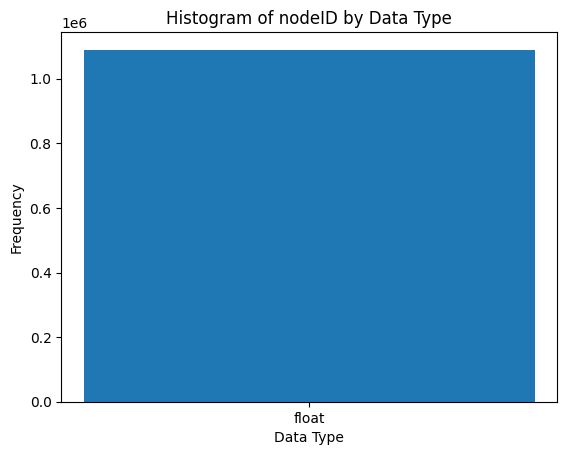

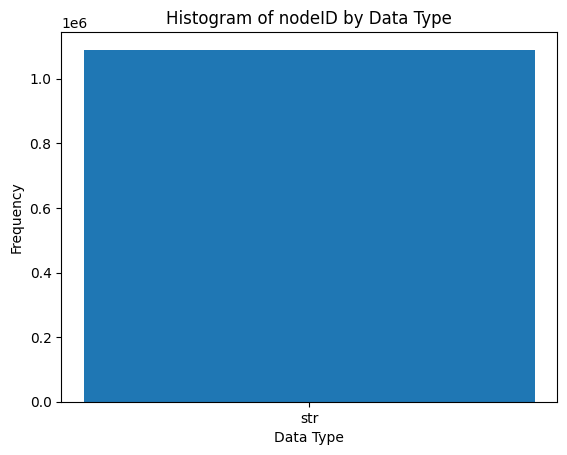

In [ ]:
colName = 'nodeID'
if (handshake_df.size>0):
  displayColumnDataType(handshake_df, colName)
  handshake_df = convertfastNodeIDToIntType(handshake_df,colName)
  displayColumnDataType(handshake_df, colName)

In [ ]:
handshake_df

,index,datefile,DNF,node,filename,datetime,Folder,Filename,Severity,nodeID,machineName,address,function,parameterName,parameterValue,handshakeOldValue,handshakeCurrentValue,duration,message,data_type
0,2,2024-06-18,2024-06-18_OIClogs_/content/2024-06-18_CPCLogs...,OIClogs,/content/2024-06-18_CPCLogs_HandshakeEvents__G...,2024-06-13 00:00:00.000007,CPC Logs 12.07.2024,2024-06-13.oiclog,MAX_MSG_BUFFER_SIZE,0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,0,str
1,46,2024-06-18,2024-06-18_OIClogs_/content/2024-06-18_CPCLogs...,OIClogs,/content/2024-06-18_CPCLogs_HandshakeEvents__G...,2024-06-13 00:00:14.000743,CPC Logs 12.07.2024,2024-06-13.oiclog,INFO,2104102,NaN,NaN,Node,TemperatureValue,22.8,NaN,NaN,NaN,Node 'TemperatureValue' (2104102) updated. New...,str
2,47,2024-06-18,2024-06-18_OIClogs_/content/2024-06-18_CPCLogs...,OIClogs,/content/2024-06-18_CPCLogs_HandshakeEvents__G...,2024-06-13 00:00:14.000743,CPC Logs 12.07.2024,2024-06-13.oiclog,INFO,15104102,NaN,NaN,Node,TemperatureValue,21.76,NaN,NaN,NaN,Node 'TemperatureValue' (15104102) updated. Ne...,str
3,52,2024-06-18,2024-06-18_OIClogs_/content/2024-06-18_CPCLogs...,OIClogs,/content/2024-06-18_CPCLogs_HandshakeEvents__G...,2024-06-13 00:00:14.000743,CPC Logs 12.07.2024,2024-06-13.oiclog,INFO,29104102,NaN,NaN,Node,TemperatureValue,22.89,NaN,NaN,NaN,Node 'TemperatureValue' (29104102) updated. Ne...,str
4,53,2024-06-18,2024-06-18_OIClogs_/content/2024-06-18_CPCLogs...,OIClogs,/content/2024-06-18_CPCLogs_HandshakeEvents__G...,2024-06-13 00:00:14.000743,CPC Logs 12.07.2024,2024-06-13.oiclog,INFO,19104102,NaN,NaN,Node,TemperatureValue,22.66,NaN,NaN,NaN,Node 'TemperatureValue' (19104102) updated. Ne...,str
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1089591,511237,2024-06-18,2024-06-18_OIClogs_/content/2024-06-18_CPCLogs...,OIClogs,/content/2024-06-18_CPCLogs_HandshakeEvents__G...,2024-06-18 23:59:46.000808,CPC Logs 12.07.2024,2024-06-18_4.oiclog,INFO,34111001,NaN,NaN,HandleCFP,NaN,NaN,NaN,4.0,NaN,HandleCFP() - Handshake '34111001' has value '4',str
1089592,511239,2024-06-18,2024-06-18_OIClogs_/content/2024-06-18_CPCLogs...,OIClogs,/content/2024-06-18_CPCLogs_HandshakeEvents__G...,2024-06-18 23:59:46.000871,CPC Logs 12.07.2024,2024-06-18_4.oiclog,INFO,33110984,TPS_DPU_317,10.10.1.72|7000,Echo,NaN,NaN,NaN,NaN,5189.0,Echo response time for 'TPS_DPU_317 (10.10.1.7...,str
1089593,511241,2024-06-18,2024-06-18_OIClogs_/content/2024-06-18_CPCLogs...,OIClogs,/content/2024-06-18_CPCLogs_HandshakeEvents__G...,2024-06-18 23:59:46.000902,CPC Logs 12.07.2024,2024-06-18_4.oiclog,INFO,34110984,TPS_DPU_318,10.10.1.73|7000,Echo,NaN,NaN,NaN,NaN,5080.0,Echo response time for 'TPS_DPU_318 (10.10.1.7...,str
1089594,511243,2024-06-18,2024-06-18_OIClogs_/content/2024-06-18_CPCLogs...,OIClogs,/content/2024-06-18_CPCLogs_HandshakeEvents__G...,2024-06-18 23:59:46.000965,CPC Logs 12.07.2024,2024-06-18_4.oiclog,INFO,35111001,NaN,NaN,HandleCFP,NaN,NaN,NaN,4.0,NaN,HandleCFP() - Handshake '35111001' has value '4',str


## Filter Data By date or keys

In [ ]:
def filterDataFrameBylastDays(df, endDay, timewindowsInDays, sortingColumn='datetime'):
  # Get the current date
  current_date = pd.to_datetime(endDay).normalize()
  # Calculate the start date by subtracting 3 days from the current date
  start_date = current_date - pd.DateOffset(days=timewindowsInDays)
  # Filter the DataFrame for the last 3 days
  filtered_df = df.loc[(df[sortingColumn] >= start_date) & (df[sortingColumn] <= current_date)]
  return filtered_df

def filterDataFrameBylastHours(df, endDatetime, timewindowsInHours):
  # Get the current datetime
  current_datetime = pd.to_datetime(endDatetime)
  # Calculate the start datetime by subtracting the specified number of hours from the current datetime
  start_datetime = current_datetime - pd.DateOffset(hours=timewindowsInHours)
  # Filter the DataFrame for the specified time window
  filtered_df = df.loc[(df['datetime'] >= start_datetime) & (df['datetime'] <= current_datetime)]
  return filtered_df

def filterDataFrameIfNot(df, redundantCalls):
  # Filter the DataFrame where 'methodName' is not 'cfpPing' or 'echo'
  filtered_df = df.loc[~df['methodName'].isin(redundantCalls)]
  return filtered_df

def filterDataFrameIfIn(df, focusedCalls):
  # Filter the DataFrame where 'methodName' is not 'cfpPing' or 'echo'
  filtered_df = df.loc[df['methodName'].isin(focusedCalls)]
  return filtered_df


def showMinMaxInColumn(df, colName, legend=''):
  min_date = df[colName].min()
  max_date = df[colName].max()
  print (f'Legend:{legend}, Min : {min_date}, Max : {max_date}')
  result_df = df.groupby('machineName')[colName].agg(['min', 'max'])
  fig = createSimpleCountTable((8,4), result_df, ['machineName','min', 'max'])
  return result_df

## Extract Custom functions

In [ ]:
#@title Plate History
# prompt: gather in the chronological order all rows related to each serialNumber and drop the one without serialNumber, then display the results
# Out of the results, give the sequence of methodName per serialNumber and display the list

class PlateHistoryItem:
  def __init__(self, index, serialNumber):
    self.index = index
    self.workorderNumber = ''
    self.serialNumber = serialNumber
    self.plateType = ''
    self.first_datetime = None
    self.last_datetime = None
    self.duration = None
    self.machines = None
    self.machinesCount = 0
    self.steps = None
    self.stepsCount = 0
    self.rc1sCount = 0
    self.last_machine = ''
    self.last_step = ''
    self.last_rc = ''
    self.machineStream = []
    self.machineStream_string = ''
    self.methodStream = []
    self.methodStream_string = ''
    self.inArgs = None
    self.inStream = []
    self.inStream_string = ''
    self.outArgs = None
    self.outStream = []
    self.outStream_string = ''
    self.rc1s = None
    self.rcStream = []
    self.rcStream_string = ''
    self.combined = []
    self.combined_string = ''

  def feedDataFrame(self, rdf_dp):
    self.machines = rdf_dp[rdf_dp['serialNumber'] == self.serialNumber]['machineName']
    self.steps = rdf_dp[rdf_dp['serialNumber'] == self.serialNumber]['methodName']
    self.inArgs = rdf_dp[rdf_dp['serialNumber'] == self.serialNumber]['inArgs']
    self.outArgs = rdf_dp[rdf_dp['serialNumber'] == self.serialNumber]['outArgs']
    self.rc1s = rdf_dp[rdf_dp['serialNumber'] == self.serialNumber]['returnCode']
    #self.machines = self.machines.dropna()
    #self.steps = self.steps.dropna()
    #self.rc1s = self.rc1s.dropna()
    self.first_datetime = rdf_dp[rdf_dp['serialNumber'] == self.serialNumber]['datetime'].iloc[0]
    self.last_datetime = rdf_dp[rdf_dp['serialNumber'] == self.serialNumber]['datetime'].iloc[-1]
    self.last_machine = rdf_dp[rdf_dp['serialNumber'] == self.serialNumber]['machineName'].iloc[-1]
    self.last_step = rdf_dp[rdf_dp['serialNumber'] == self.serialNumber]['methodName'].iloc[-1]
    self.last_rc = rdf_dp[rdf_dp['serialNumber'] == self.serialNumber]['returnCode'].iloc[-1]

  def calculateCounters(self):
    self.machinesCount = len(self.machines.unique())
    self.stepsCount = len(self.steps)
    self.rc1sCount = len(self.rc1s)

  def calculateDuration(self):
    self.duration = self.last_datetime - self.first_datetime

  def getMachineStream(self):
    previous_machine = None
    self.machineStream = []
    for machine in self.machines:
        if pd.notnull(machine):
          if machine != previous_machine:
            self.machineStream.append(f'{machine}')
          previous_machine = machine

  def calculateCombined(self):
    self.methodStream = [f'{method}' for method in (self.steps)]
    self.methodStream_string = '>'.join(self.methodStream)
    self.inStream = [f'{inArg}' for inArg in (self.inArgs)]
    self.inStream_string = '>'.join(self.inStream)
    self.outStream = [f'{outArg}' for outArg in (self.outArgs)]
    self.outStream_string = '>'.join(self.outStream)
    self.rcStream = [f'{rcArg}' for rcArg in (self.rc1s)]
    self.rcStream_string = '>'.join(self.rcStream)
    #self.machineStream = [f'{machine}' for machine in zip(self.machines)]
    #self.machineStream = [f'{machine}' for i, machine in enumerate(self.machines) if pd.notnull(machine) and (i == 0 or self.machines[i-1] != machine)]
    self.getMachineStream()
    self.machineStream_string = '>'.join(self.machineStream)
    self.combined = [f"{machine}_{method}({rc1})" for machine, method, rc1 in zip(self.machines, self.steps, self.rc1s)]
    self.combined_string = '>'.join(self.combined)

  @staticmethod
  def extractPlateType(outStream_string):
    plateType = ''
    if outStream_string is not None:
      if 'VORDRUCK' in outStream_string:
        plateType = 'PreprintPlate'
      else:
        plateType = 'ProcessPlate'
    return plateType

  @staticmethod
  def extractWorkorderNumber(outStream_string):
      workorder_number = ''
      if outStream_string is not None:
          #workorder_numbers = re.findall(r'\b\d{8}\b', outStream_string)
          match = re.search(r'\b(\d{8})(?:_VORDRUCK)?\b', outStream_string)
          if match:
              workorder_number = match.group(1)
      return workorder_number

  def calculateAll(self):
    self.calculateCounters()
    self.calculateDuration()
    self.calculateCombined()
    self.workorderNumber = PlateHistoryItem.extractWorkorderNumber(self.outStream_string)
    self.plateType = PlateHistoryItem.extractPlateType(self.outStream_string)

  @staticmethod
  def get_header():
    return ['firstDate', 'lastDate', 'Duration', 'workorderNumber', 'serialNumber', 'PlateType', 'LastMachine', 'LastStep', 'LastRC', 'MachineCount', 'StepCount', 'Machine History', 'WorkflowPath', 'InStream', 'OutStream', 'RCStream']

  def to_string(self):
    return f'serialNumber: {self.serialNumber}, firstDate: {self.first_datetime}, lastDate: {self.last_datetime}, Duration: {self.duration}, LastMachine: {self.last_machine}, LastStep: {self.last_step}, LastRC: {self.last_rc}, MachineCount: {self.machinesCount}, StepCount: {self.stepsCount}, WorkflowPath: {self.combined_string}'

  def to_csv(self):
    return {'firstDate': [self.first_datetime], 'lastDate': [self.last_datetime],'Duration': [self.duration], 'workorderNumber':[self.workorderNumber], 'serialNumber': [self.serialNumber], 'PlateType' : [self.plateType], 'LastMachine': [self.last_machine],'LastStep': [self.last_step], 'LastRC':[self.last_rc],'MachineCount': [self.machinesCount],'StepCount': [self.stepsCount], 'Machine History': [self.machineStream_string], 'WorkflowPath': [self.combined_string], 'InStream': [self.inStream_string], 'OutStream': [self.outStream_string], 'RCStream': [self.rcStream_string]}

import pandas as pd
def generateWorkflowPlateHistory(rdf, printout=False):
    # Sort the DataFrame by serialNumber and timestampString
    # Gather in the chronological order all rows related to each serialNumber and drop the one without serialNumber
    rdf_dp = rdf.sort_values(by=['timestampString', 'serialNumber']).dropna(subset=['serialNumber'])
    # Remove the row where the value of serieX is extreme
    rdf_dp = rdf_dp[rdf_dp['serialNumber'] != '']

    # Create a new DataFrame to store the results
    result_df = pd.DataFrame(columns=PlateHistoryItem.get_header())
    # Give the sequence of methodName per serialNumber and display the list
    serial_numbers = rdf_dp['serialNumber'].unique()
    for i, serialNumber in enumerate(serial_numbers):
        plateID = PlateHistoryItem(i, serialNumber)
        plateID.feedDataFrame(rdf_dp)
        plateID.calculateAll()
        if (printout):
            print(plateID.to_string())
        # Append the results to the new DataFrame
        result_df = pd.concat([result_df, pd.DataFrame(plateID.to_csv())], ignore_index=True)
    getShapeSize('PlateHistory', result_df)
    return result_df


In [ ]:
# @title Extract Long Duration
def getLongDuration(df, duration_threshold):
  # Assuming your dataframe has a 'duration' columns
  # Filter the dataframe to keep only the rows where the duration is above 10 seconds
  filtered_df = df[df['duration'] >= duration_threshold]
  return filtered_df

### Extract CameraOut

In [ ]:
import pandas as pd
import datetime as dt
from datetime import datetime, timedelta
import re

def hasPipe(value):
  ret = False
  if (value is not None):
    if (  '|' in value):
      ret = True
  return ret

def hasSemiColumn(value):
  ret = False
  if (value is not None):
    if (  ';' in value):
      ret = True
  return ret

# def get_substring_before_pipe(value):
#     index = value.find('|')
#     if index != -1:
#         return value[:index]
#     else:
#         return value

def get_substring_before_pipe(value):
    return value.split('|')

def getHeaderIndex(dataframe, header):
    if (header in dataframe.columns):
      column_number = dataframe.columns.get_loc(header)
      return column_number
    else:
      return -1

def assign_new_header(dataframe, column_number, new_header):
    if (column_number<len(dataframe.columns)):
      dataframe.rename(columns={dataframe.columns[column_number]: new_header}, inplace=True)
      return column_number
    else :
      # Create a new column
      dataframe[new_header] = None
      column_number = getHeaderIndex(dataframe, new_header)
      return column_number

def create_new_header(dataframe, new_header):
    column_number = len(dataframe.columns)
    if (new_header not in dataframe.columns):
      column_number = assign_new_header(dataframe, column_number, new_header)
      print (f'New column created for : {column_number} -> {new_header}')
      return column_number
    else :
      column_number = getHeaderIndex(dataframe, new_header)
      return column_number

def assign_new_value(dataframe, index, column, new_value):
    if (hasSemiColumn(new_value)):
        sub_values = new_value.split(';')
        if (len(sub_values)==2):
          #print (sub_values)
          new_header = sub_values[0]
          # create new Header
          column = create_new_header(dataframe, new_header)
          dataframe.at[index, new_header] = sub_values[1] # -> change value
        else: # more or less
          dataframe.at[index, column] =  new_value # -> change value
    else:
        dataframe.at[index, column] = new_value  # -> change value

def assignColumnHeaders(dataframe):
  # Iterate over each row to find new Headers
  for index, row in dataframe.iterrows():
    # Iterate over each column
    for column, value in row.items():
        # Assign column header based on specific condition
        if hasPipe(value):
            split_vals = get_substring_before_pipe(value)
            if(len(split_vals)>0):
              new_header = split_vals[0].strip()
              if (new_header=='RC'):
                if (column==8): new_header = 'CT2'
              if (new_header=='RC'):
                #print(column)
                if (column==9): new_header = 'RC'

              new_value =  split_vals[1]
              # create new Header  by forcing the naming
              if (dataframe.columns[column] != new_header):
                  assign_new_header(dataframe, column, new_header)
              # assign value
              assign_new_value(dataframe, index, new_header, new_value)

def convertColumnToFloat(df, column_name1):
  # Convert the 'column_name' column from string to integer
  if (column_name1 in df.columns):
    if len(df[column_name1])>0:
      # Convert string column to float coerce empty string
      df[column_name1] = pd.to_numeric(df[column_name1], errors='coerce').fillna(0).astype(float)
  return df

def convert2ColumnsToFloat(df, column_name1, column_name2):
  # Convert the 'column_name' column from string to integer
  if (column_name1 in df.columns):
    if len(df[column_name1])>0:
      df[column_name1] = df[column_name1] + '.' +  df[column_name2]
      # Convert string column to float coerce empty string
      df[column_name1] = pd.to_numeric(df[column_name1], errors='coerce').fillna(0).astype(float)
      df[column_name2] = None
  return df

def convertColumnToInteger(df, column_name):
  if (column_name in df.columns):
    # Convert the 'column_name' column from string to integer
    #df[column_name] = df[column_name].astype(int)
    # Convert string column to integer coerce empty string
    df[column_name] = pd.to_numeric(df[column_name], errors='coerce').fillna(0).astype(int)
  return df

def convertColumnToBoolean(df, col_name):
  if (col_name in df.columns):
    # Map NaN values to False
    df[col_name] = df[col_name].fillna(False)
    # Assuming your DataFrame is named 'df'
    df[col_name] = df[col_name].map({'TRUE': True, 'FALSE': False})
    # Explicitly cast object-dtype columns with all-bool values to bool dtype
    #bool_columns = df.select_dtypes(include='object').columns
    df[col_name] = df[col_name].astype(bool)
  return df

def getListAllSTSNPP(df):
    i = 0
    for index, row in df.iterrows():
      stsnpp_value = row['STSNPP']
      # Do something with the stsnpp_value
      print(f'{stsnpp_value}')
      #print(f'{index} => {stsnpp_value}')
      i+=1
    print(f'List contains {i} elements .')

# @markdown extractCameraName

def extractCameraName(cameraREpattern, sourceString):
  # Convert the sourceString to a string if it is not already
  if not isinstance(sourceString, (str, bytes)):
      sourceString = str(sourceString)
  # Search for the pattern in the string
  match = re.search(cameraREpattern, sourceString)
  if match is not None:
    #print(f'CameraName={match.group("cameraName")}, imageType={match.group("imageType")}')
    return (match.group("cameraName"),match.group("imageType")) if match else ('','')
  else:
    #print(f'No match for {sourceString}')
    return ('','')

def addCameraColumns(df, insertPosition=0):
  df.insert(insertPosition+1, 'CameraName', '')
  df.insert(insertPosition+2, 'ImageType', '')
  cameraREpattern = r".*[_](?P<cameraName>.*)(?P<imageType>.ipd|.tiff)"
  ### --> LL links
  # Extract CameraName from 'LL'
  # Apply the extractCameraName function to create new columns
  df[['CameraName', 'ImageType']] = df['LL'].apply(lambda x: pd.Series(extractCameraName(cameraREpattern, x)))
  ### --> LG links
  # Select rows where 'CameraName' or 'ImageType' is empty or ''
  empty_rows = df[(df['CameraName'] == '') | (df['CameraName'].isna()) | (df['ImageType'] == '')| (df['ImageType'].isna())]
  #empty_rows = df[df[['CameraName', 'ImageType']].isna().any(axis=1) | (df[['CameraName', 'ImageType']] == '').any(axis=1)]
  if len(empty_rows)>0:
    # Apply the extractCameraName function to the selected empty rows
    results = empty_rows['LG'].apply(lambda x: pd.Series(extractCameraName(cameraREpattern, x)))
    # Assign the values to the 'CameraName' and 'ImageType' columns at the indices of empty rows
    df.loc[empty_rows.index, ['CameraName', 'ImageType']] = results.values

  # Replace NaN values with empty strings in 'CameraName' and 'ImageType' columns
  df[['CameraName', 'ImageType']] = df[['CameraName', 'ImageType']].fillna('Unknown')
  return df

def extractPlateType(df):
  # Assuming your DataFrame is named 'df'
  df = df.assign(Contains_Vordruck=df['LL'].str.contains('VORDRUCK'))
  # Get unique values in the 'STSNPP' column
  unique_values = df['SN'].unique()
  # Check if any matching rows contain True in the 'Contains_LocalLink' column
  for value in unique_values:
      matching_rows = df[df['SN'] == value]
      ### hasAnyVORDRUCK
      if matching_rows['Contains_Vordruck'].any():
        # Set the 'hasAnyLocalLink' column to True for all matching rows
        df.loc[df['SN']==value, 'hasAnyVORDRUCK'] = True
      else:
        df.loc[df['SN']==value, 'hasAnyVORDRUCK'] = False
  # Assuming your DataFrame is named 'df'
  df['plateType'] = np.where(df.groupby('SN')['hasAnyVORDRUCK'].transform('any'), 'PreprintPlate', 'ProcessPlate')
  #print(df)
  return df

def extractCameraOut_InArgs(dataset):
  column_data3 = dataset['inArgs']
  # Assuming you have a column_data variable containing the desired column data
  column_data_list = column_data3.astype(str).tolist()  # Convert column_data to a list of strings
  split_values = [row.split(',') for row in column_data_list]  # Split each string by comma
  ## Create new DataFrame based on split values
  df = pd.DataFrame(split_values)  # Create a new DataFrame
  #getColumnNames(df)
  #for row in df.itertuples(index=False):
  assignColumnHeaders(df)

  # Assuming your PreprintPlate is named 'VORDRUCK'
  df = extractPlateType(df)
  # Get the column names of the DataFrame
  column_names = getColumnNames(df)
  column_numb = len(dataset.columns)
  print(f'Dataset has {column_numb} columns')
  # Insert the DataFrame as new columns in the dataset
  for i, col_name in enumerate(column_names):
    print(f'index: {column_numb + i}, {col_name}')
    if (col_name not in dataset.columns):
      dataset.insert(column_numb + i, col_name, df[col_name].values)

  # Merge CT1 and CT2 into CT as a float column
  # dataset['CT'] = dataset['CT'].astype(str) + '.' + dataset['CT2'].astype(str)
  # dataset['CT'] = dataset['CT'].astype(float)
  if ('CT2' in dataset.columns):
    convert2ColumnsToFloat(dataset, 'CT', 'CT2')
    # # Delete CT1 and CT2 columns
    dataset.drop(['CT2'], axis=1, inplace=True)

  # convert PP as integer
  convertColumnToInteger(dataset, 'PP')
  insertPosition = dataset.columns.get_loc('PP') + 1
  # convert integer column df['PP'] as double digit string with a leading zero
  dataset.insert(insertPosition, 'PP2d',  dataset['PP'].astype(str).str.zfill(2))

  column_numb = len(dataset.columns)
  if ('inArgs' in dataset.columns): dataset.insert(column_numb, 'Line', dataset['inArgs'])
  #getColumnNames(dataset)
  return dataset

def extractCameraArgs4ProcessData(dataset, filename, sortingColumn, canCreateFakes=False):
  ## CAMERA
  df = extractCameraOut_InArgs(dataset)
  df = addCameraColumns(df)
  #df.insert(0, 'isReal', True)
  df['isReal'] = True
  df['isReal'] = df['isReal'].astype(bool)

  # concat SN with PP with '_' separator
  insertPosition = df.columns.get_loc('SN') + 1
  #df = df.assign(SNPP=df['SN'].str.cat(df['PP2d'], sep='_'))
  df.insert(insertPosition, 'SNPP', df['SN'].str.cat(df['PP2d'], sep='_'))

  # concat SN with ST with '_' separator
  insertPosition = df.columns.get_loc('SN') + 1
  df.insert(insertPosition, 'STSN', df['ST'].str.cat(df['SN'], sep='_'))

  # concat SNPP with ST with '_' separator
  insertPosition = df.columns.get_loc('SNPP') + 1
  df.insert(insertPosition, 'STSNPP', df['ST'].str.cat(df['SNPP'], sep='_'))

  #df = df.assign(SNPP=df['SN'].str.cat('_', na_rep='').str.cat(df['PP'], na_rep=''))
  if ('CT2' in df.columns):
    convert2ColumnsToFloat(df, 'CT', 'CT2')
  convertColumnToInteger(df, 'RC')

  # Check if any NaN values exist in the 'PL' column
  if df['PL'].isnull().values.any():
    print("NaN values exist in the 'PL' column.")
    df['PL'] = df['PL'].fillna(False)
  convertColumnToBoolean(df, 'PL')
  convertColumnToBoolean(df, 'LA')

  ## Add previous columns
  colName = 'stationDescription'; df.insert(0, colName, dataset[colName].values) if colName not in df.columns else None
  colName = 'machineName'; df.insert(0, colName, dataset[colName].values) if colName not in df.columns else None
  colName = 'manufacturer'; df.insert(0, colName, dataset[colName].values) if colName not in df.columns else None
  colName = 'timestampString'; df.insert(0, colName, dataset[colName].values) if colName not in df.columns else None

  # Add a new column 'Row Number' with sequentially numbered rows
  #df['rowIndex'] = range(1, len(df) + 1)
  colName = 'rowIndex'; df.insert(0, colName, range(1, len(df) + 1)) if colName not in df.columns else None
  try:
    # Assuming you have a DataFrame named 'df' with a column named 'datetime' containing timestamp strings
    colName = 'datetime'; df.insert(0, colName, pd.to_datetime(df['timestampString'])) if colName not in df.columns else None
  except Exception as e:
    print("An error occurred:", str(e))

  df = df.assign(Contains_LocalLink=df['LL'].str.len()>3)
  df = df.assign(Contains_GlobalLink=df['LG'].str.len()>3)

  # Get unique values in the 'STSNPP' column
  unique_values = df['STSNPP'].unique()
  for value in unique_values:
    matching_rows = df[df['STSNPP'] == value]
    ### hasAnyLocalLink
    if matching_rows['Contains_LocalLink'].any():
      # Set the 'hasAnyLocalLink' column to True for all matching rows
      df.loc[df['STSNPP']==value, 'hasAnyLocalLink'] = True
    else:
      df.loc[df['STSNPP']==value, 'hasAnyLocalLink'] = False
    ### hasAnyGlobalLink
    if matching_rows['Contains_GlobalLink'].any():
      # Set the 'hasAnyGlobalLink' column to True for all matching rows
      df.loc[df['STSNPP']==value, 'hasAnyGlobalLink'] = True
    else:
      df.loc[df['STSNPP']==value, 'hasAnyGlobalLink'] = False

  ### SuperUID
  insertPosition = df.columns.get_loc('STSNPP') + 1
  conv = pd.DataFrame()
  conv['b_hasAnyLocalLink'] = df['hasAnyLocalLink'].astype(int)
  conv['s_hasAnyLocalLink'] = conv['b_hasAnyLocalLink'].astype(str)
  conv['b_hasAnyGlobalLink'] = df['hasAnyGlobalLink'].astype(int)
  conv['s_hasAnyGlobalLink'] = conv['b_hasAnyGlobalLink'].astype(str)
  conv['LG'] = conv['s_hasAnyLocalLink'].str.cat(conv['s_hasAnyGlobalLink'], sep='')
  #print(conv)
  df.insert(insertPosition, 'STSNPPLG', df['STSNPP'].str.cat(conv['LG'], sep='_'))
  insertPosition = df.columns.get_loc('LG') + 1
  df.insert(insertPosition, 'LLG', conv['LG'])

  #### Add decoration for NeuralNetwork Display / decoration
  df = df.assign(QA_hasAnyLocalLink=df['hasAnyVORDRUCK'].astype(str).apply(lambda x: 'hasAnyVORDRUCK=' + x))
  #df = df.assign(QA_hasAnyLocalLink=str.cat(df['hasAnyLocalLink'].astype(str), sep='hasAnyLocalLink='))
  df = df.assign(QA_hasAnyLocalLink=df['hasAnyLocalLink'].astype(str).apply(lambda x: 'hasAnyLocalLink=' + x))
  #df = df.assign(QA_hasAnyGlobalLink=str.cat(df['hasAnyGlobalLink'].astype(str), sep='hasAnyGlobalLink='))
  df = df.assign(QA_hasAnyGlobalLink=df['hasAnyGlobalLink'].astype(str).apply(lambda x: 'hasAnyGlobalLink=' + x))

  # Save the new DataFrame as a VORDRUCK CSV file
  filenameVORDRUCK = filename[:len(filename)-4] + 'VORDRUCK.csv'
  df.to_csv(filenameVORDRUCK, index=False)
  print(f'{filenameVORDRUCK} has been exported.')

  # Rename the columns using the dictionary
  #df.rename(columns=column_mapping, inplace=True)
  getColumnNames(df)
  # Sort the DataFrame by the 'datetime' column
  if sortingColumn in df.columns:
    df = df.sort_values(sortingColumn, ascending=True)
  # Save the new DataFrame as a CSV file
  df.to_csv(filename, index=False)
  # Assuming you have a DataFrame called 'df'
  dimensions = df.shape
  num_rows = dimensions[0]
  num_columns = dimensions[1]
  print(f"Number of rows: {num_rows} and columns : {num_columns}")
  print(f'{filename} has been exported.')
  return df

In [ ]:
#@title extractCameraOut_InArgs(camera_df)

# cameraOut_df = rdf[rdf['methodName'] == 'cffcCameraOut']
# echoValueCount(cameraOut_df, 'machineName')
# # export
# co_filename  = globalCFCallfilename[:len(globalCFCallfilename)-7] + '(cffcCameraOut)'
# cameraOutInArgs_df = extractCameraArgs4ProcessData(cameraOut_df, co_filename,'serialNumber')
# cameraOutInArgs_df.to_csv(co_filename+'DF.csv', index=False)
# print(f'Save cffcCameraOut csv filename : {co_filename}.csv')


# Visualization

## Vis Lib

## Scatter Plots

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
#@title Generic SingleScatterPlot
def createSingleScatterPlotPerMachineName(figsize, dnp, start_date, end_date, machines, selectedMachine=-1, axisColumnName='datetime',  dataColumnName='',AxisLegend='', PlotTitle=''):
  # Create scatter plots
  row_index = dnp.columns.get_loc(axisColumnName)
  column_index = dnp.columns.get_loc(dataColumnName)
  print(f'Display a SingleScatterPlot chart from column index {column_index} named {dataColumnName}')
  #fig = plt.figure(figsize=(10, 10))  # Increase the figure size as desired
  fig, ax = plt.subplots(figsize=figsize)  # Increase the figure size as desired
  colors = np.random.rand(50)
  # Create the first plot
  i =0
  # ax = axs[0,0]
  for machine in machines:
    serie_times=dnp[dnp['machineName'] == machine].iloc[:, row_index].values
    values_Dw1 = dnp[dnp['machineName'] == machine].iloc[:, column_index].values
    # Set the limits for the x-axis using the desired date and time range:
    ax.set_xlim(start_date, end_date)
    if(i==selectedMachine or selectedMachine==-1):
      #print(f'Plot {i} for {machine}')
      #print(f'times={serie_times}')
      #print(f'values={values_Dw1}')
      ax.scatter(serie_times, values_Dw1, alpha=0.5, label=machine)
    # ax.legend(*[*zip(*{l:h for h,l in zip(*ax.get_legend_handles_labels())}.items())][::-1])

    # Format x-axis tick labels
    #ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))  # Display one label per day
    ax.xaxis.set_major_locator(mdates.HourLocator(interval=6))  # Set the locator to display ticks every xx hours
    #ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  # Format the labels as 'YYYY-MM-DD'
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))  # Format the labels as 'YYYY-MM-DD HH:MM'
    # Set x-label
    #ax.set_xlabel('Date', rotation=45, ha='left')
    # Set y-label
    ax.set_ylabel(AxisLegend)
    ax.xaxis.set_major_locator(plt.MaxNLocator(10))
    i+=1
    if (i>20): break

  # Set y-label
  ax.set_ylabel(AxisLegend)

  # To specify the number of ticks on both or any single axes
  # plt.locator_params(axis='y', nbins=6)
  # plt.locator_params(axis='x', nbins=10)
  plt.locator_params(nbins=10)
  # Rotate x-axis tick labels for better readability
  plt.xticks(rotation=45)

  # Add legend
  #ax.legend()
  handles, labels = plt.gca().get_legend_handles_labels()
  by_label = dict(zip(labels, handles))
  plt.legend(by_label.values(), by_label.keys(), loc='center', bbox_to_anchor=(0.5, +1.25), ncol=5)

  plt.title(PlotTitle)
  # Adjust the layout to prevent overlapping
  plt.tight_layout()
  # Display the plot
  plt.show()

In [ ]:
#@title Generic Dice Plot
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def CreateDiceChart(dnp, column_names, legend_names, title, machines, selectedMachine, pngfilename):

  if (selectedMachine==-1):
    selectedMachineName = '(ALL)'
  else:
    selectedMachineName = machines[selectedMachine]

  print(f'==============================================')
  print(f'Scatter Plot for {selectedMachineName} machine')

  # Plot the data
  # plt.xticks(rotation=45)
  fig, axs = plt.subplots(2, 3, figsize=(32, 18), squeeze=False, sharex=True, sharey=False, constrained_layout=True)
  #fig.subplots_adjust(top=0.88) # Leave space on the top of the page for the haupt title
  fig.suptitle(f"{selectedMachineName} Machine Process Data ({title})" , fontsize=28) #

  colors = np.random.rand(50)

  # Create the first plot
  column_index = dnp.columns.get_loc(column_names[0])
  subpt1 = axs[0, 0]
  ax = axs[0,0]
  # Set the limits for the x-axis using the desired date and time range:
  ax.set_xlim(start_date, end_date)
  i = 0
  for machine in machines:
    serie_times= dnp[dnp['machineName'] == machine].iloc[:, 0].values
    values_Dw1 = dnp[dnp['machineName'] == machine].iloc[:, column_index].values
    # Set the limits for the x-axis using the desired date and time range:
    if(i==selectedMachine or selectedMachine==-1):
      ax.scatter(serie_times, values_Dw1, alpha=0.5, label=machine,color=plt.cm.tab20(i))
    # ax.legend(*[*zip(*{l:h for h,l in zip(*ax.get_legend_handles_labels())}.items())][::-1])
    i+=1

  # Format x-axis tick labels
  ax.xaxis.set_major_locator(mdates.HourLocator(interval=2))  # Set the locator to display ticks every xx hours
  ax.xaxis.set_major_locator(plt.MaxNLocator(10))
  ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))  # Format the labels as 'YYYY-MM-DD HH:MM'
  #ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  # Format the labels as 'YYYY-MM-DD HH:MM'

  ax.tick_params(labelrotation=45)
  plt.xticks(rotation=45)
  # Set y-label
  ax.legend(loc="upper left")
  ax.set_title(legend_names[0])
  ax.set_ylabel(legend_names[0])

  # Create the second plot
  column_index = dnp.columns.get_loc(column_names[1])
  ax = axs[0,1]
  # Set the limits for the x-axis using the desired date and time range:
  ax.set_xlim(start_date, end_date)
  i = 0
  for machine in machines:
    serie_times= dnp[dnp['machineName'] == machine].iloc[:, 0].values
    values_Dw1 = dnp[dnp['machineName'] == machine].iloc[:, column_index].values
    # Set the limits for the x-axis using the desired date and time range:
    if(i==selectedMachine or selectedMachine==-1):
      ax.scatter(serie_times, values_Dw1, alpha=0.5, label=machine,color=plt.cm.tab20(i))
    # ax.legend(*[*zip(*{l:h for h,l in zip(*ax.get_legend_handles_labels())}.items())][::-1])
    i+=1

  # Format x-axis tick labels
  ax.xaxis.set_major_locator(mdates.HourLocator(interval=2))  # Set the locator to display ticks every xx hours
  ax.xaxis.set_major_locator(plt.MaxNLocator(10))
  ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))  # Format the labels as 'YYYY-MM-DD HH:MM'
  #ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  # Format the labels as 'YYYY-MM-DD HH:MM'

  ax.tick_params(labelrotation=45)
  plt.xticks(rotation=45)
  # Set y-label
  ax.legend(loc="upper left")
  ax.set_title(legend_names[1])
  ax.set_ylabel(legend_names[1])

  # Create the third plot
  column_index = dnp.columns.get_loc(column_names[2])
  ax = axs[0,2]
  # Set the limits for the x-axis using the desired date and time range:
  ax.set_xlim(start_date, end_date)
  i = 0
  for machine in machines:
    serie_times= dnp[dnp['machineName'] == machine].iloc[:, 0].values
    values_Dw1 = dnp[dnp['machineName'] == machine].iloc[:, column_index].values
    # Set the limits for the x-axis using the desired date and time range:
    if(i==selectedMachine or selectedMachine==-1):
      ax.scatter(serie_times, values_Dw1, alpha=0.5, label=machine,color=plt.cm.tab20(i))
    # ax.legend(*[*zip(*{l:h for h,l in zip(*ax.get_legend_handles_labels())}.items())][::-1])
    i+=1

  # Format x-axis tick labels
  ax.xaxis.set_major_locator(mdates.HourLocator(interval=12))  # Set the locator to display ticks every xx hours
  ax.xaxis.set_major_locator(plt.MaxNLocator(10))
  ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))  # Format the labels as 'YYYY-MM-DD HH:MM'
  #ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  # Format the labels as 'YYYY-MM-DD HH:MM'

  ax.tick_params(labelrotation=45)
  plt.xticks(rotation=45)
  # Set y-label
  ax.legend(loc="upper left")
  ax.set_title(legend_names[2])
  ax.set_ylabel(legend_names[2])

  # Create the fourth plot
  column_index = dnp.columns.get_loc(column_names[3])
  ax = axs[1,0]
  # Set the limits for the x-axis using the desired date and time range:
  ax.set_xlim(start_date, end_date)
  i = 0
  for machine in machines:
    serie_times= dnp[dnp['machineName'] == machine].iloc[:, 0].values
    values_Dw1 = dnp[dnp['machineName'] == machine].iloc[:, column_index].values
    # Set the limits for the x-axis using the desired date and time range:
    if(i==selectedMachine or selectedMachine==-1):
      ax.scatter(serie_times, values_Dw1, alpha=0.5, label=machine,color=plt.cm.tab20(i))
    # ax.legend(*[*zip(*{l:h for h,l in zip(*ax.get_legend_handles_labels())}.items())][::-1])
    i+=1

  # Format x-axis tick labels
  ax.xaxis.set_major_locator(mdates.HourLocator(interval=2))  # Set the locator to display ticks every xx hours
  ax.xaxis.set_major_locator(plt.MaxNLocator(10))
  ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))  # Format the labels as 'YYYY-MM-DD HH:MM'
  #ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  # Format the labels as 'YYYY-MM-DD HH:MM'

  ax.tick_params(labelrotation=45)
  plt.xticks(rotation=45)
  # Set y-label
  ax.legend(loc="upper left")
  ax.set_title(legend_names[3])
  ax.set_ylabel(legend_names[3])

  # handles, labels = plt.gca().get_legend_handles_labels()
  # by_label = dict(zip(labels, handles))
  # plt.legend(by_label.values(), by_label.keys(), loc='center', bbox_to_anchor=(0.5, +1.25), ncol=5)

  # Create the fith plot
  column_index = dnp.columns.get_loc(column_names[4])
  ax = axs[1,1]
  ax.set_xlim(start_date, end_date)
  i = 0
  for machine in machines:
    serie_times= dnp[dnp['machineName'] == machine].iloc[:, 0].values
    values_Dw1 = dnp[dnp['machineName'] == machine].iloc[:, column_index].values
    colors = np.random.rand(50)
    # Set the limits for the x-axis using the desired date and time range:
    if(i==selectedMachine or selectedMachine==-1):
      ax.scatter(serie_times, values_Dw1, alpha=0.5, label=machine,color=plt.cm.tab20(i))
    # ax.legend(*[*zip(*{l:h for h,l in zip(*ax.get_legend_handles_labels())}.items())][::-1])
    i+=1

  # Format x-axis tick labels
  ax.xaxis.set_major_locator(mdates.HourLocator(interval=2))  # Set the locator to display ticks every xx hours
  ax.xaxis.set_major_locator(plt.MaxNLocator(10))
  ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))  # Format the labels as 'YYYY-MM-DD HH:MM'
  #ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  # Format the labels as 'YYYY-MM-DD HH:MM'
  ax.tick_params(labelrotation=45)
  plt.xticks(rotation=45)
  # Set y-label
  ax.legend(loc="upper left")
  ax.set_title(legend_names[4])
  ax.set_ylabel(legend_names[4])

  # handles, labels = plt.gca().get_legend_handles_labels()
  # by_label = dict(zip(labels, handles))
  # plt.legend(by_label.values(), by_label.keys(), loc='center', bbox_to_anchor=(0.5, +1.25), ncol=5)

  # Create the sixth plot
  column_index = dnp.columns.get_loc(column_names[5])
  ax = axs[1,2]
  # Set the limits for the x-axis using the desired date and time range:
  ax.set_xlim(start_date, end_date)
  i = 0
  for machine in machines:
    serie_times= dnp[dnp['machineName'] == machine].iloc[:, 0].values
    values_Dw1 = dnp[dnp['machineName'] == machine].iloc[:, column_index].values
    colors = np.random.rand(50)
    if(i==selectedMachine or selectedMachine==-1):
      ax.scatter(serie_times, values_Dw1, alpha=0.5, label=machine,color=plt.cm.tab20(i))
    # ax.legend(*[*zip(*{l:h for h,l in zip(*ax.get_legend_handles_labels())}.items())][::-1])
    i+=1

  # Format x-axis tick labels
  ax.xaxis.set_major_locator(mdates.HourLocator(interval=2))  # Set the locator to display ticks every xx hours
  ax.xaxis.set_major_locator(plt.MaxNLocator(10))
  ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))  # Format the labels as 'YYYY-MM-DD HH:MM'
  #ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  # Format the labels as 'YYYY-MM-DD HH:MM'
  ax.tick_params(labelrotation=45)
  plt.xticks(rotation=45)
  # Set y-label
  ax.legend(loc="upper left")
  ax.set_title(legend_names[5])
  ax.set_ylabel(legend_names[5])

  # handles, labels = plt.gca().get_legend_handles_labels()
  # by_label = dict(zip(labels, handles))
  # plt.legend(by_label.values(), by_label.keys(), loc='center', bbox_to_anchor=(0.5, +1.25), ncol=5)

  #fig.figure(figsize=(8, 4))  # Width: 8 inches, Height: 4 inches
  # Rotate the x-axis labels for better readability
  # # Adjust the layout to prevent overlapping
  #plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=None)
  #plt.tight_layout()
  #fig.tight_layout() # Or equivalently,  "plt.tight_layout()"

  # Save the plot as PNG
  fig.savefig(pngfilename+f'({selectedMachineName})'+'.png', dpi=320)
  # Display the plots
  plt.show()

In [ ]:
#@title Generic Dual Plot
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from scipy.interpolate import interp1d

# process_dnp, start_date, end_date, columnNames, legendNames, machines, selectedMachine
def createDualScatterPlotPerMachine(dnp, start_date, end_date, machines, selectedMachine, mainTitle, dataColumnNames, dataLegendNames):
  # Create scatter plots
  column_index = dnp.columns.get_loc(dataColumnNames[0])
  print(f'Display a SingleScatterPlot chart from column index {column_index} named {dataColumnNames[0]}')
  # Plot the data
  # plt.xticks(rotation=45)
  fig, axs = plt.subplots(1, 2, figsize=(16, 8), squeeze=False, sharex=True, sharey=False, constrained_layout=True)
  #fig.subplots_adjust(top=0.88) # Leave space on the top of the page for the haupt title.
  fig.suptitle(mainTitle, fontsize=28) #

  colors = np.random.rand(50)

  # Create the first plot
  ax = axs[0,0]
  # Set the limits for the x-axis using the desired date and time range:
  ax.set_xlim(start_date, end_date)
  i = 0
  for machine in machines:
    serie_times= dnp[dnp['machineName'] == machine].iloc[:, 0].values
    values_Dw1 = dnp[dnp['machineName'] == machine].iloc[:, column_index].values
    # Set the limits for the x-axis using the desired date and time range:
    if(i==selectedMachine or selectedMachine==-1):
      #print(f'SelectedMachine={selectedMachine}')
      #print(f'SelectedMachine={machines[i]}')
      ax.scatter(serie_times, values_Dw1, alpha=0.5, label=machines[i], color=plt.cm.tab20(i))
      #ax.legend(*[*zip(*{l:h for h,l in zip(*ax.get_legend_handles_labels())}.items())][::-1])
    i+=1

  # Format x-axis tick labels
  ax.xaxis.set_major_locator(mdates.HourLocator(interval=2))  # Set the locator to display ticks every xx hours
  ax.xaxis.set_major_locator(plt.MaxNLocator(10))
  ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))  # Format the labels as 'YYYY-MM-DD HH:MM'
  #ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  # Format the labels as 'YYYY-MM-DD HH:MM'

  ax.tick_params(labelrotation=45)
  plt.xticks(rotation=45)
  # Set y-label
  ax.legend(loc="upper left")
  ax.set_title(dataLegendNames[0])
  ax.set_ylabel(dataLegendNames[0])

  # Create the second plot
  column_index = dnp.columns.get_loc(dataColumnNames[1])
  print(f'Display a SingleScatterPlot chart from column index {column_index} named {dataColumnNames[1]}')
  # Create scatter plots
  ax = axs[0,1]
  # Set the limits for the x-axis using the desired date and time range:
  ax.set_xlim(start_date, end_date)
  i = 0
  for machine in machines:
    serie_times= dnp[dnp['machineName'] == machine].iloc[:, 0].values
    values_Dw1 = dnp[dnp['machineName'] == machine].iloc[:, column_index].values
    # Set the limits for the x-axis using the desired date and time range:
    if(i==selectedMachine or selectedMachine==-1):
      ax.scatter(serie_times, values_Dw1, alpha=0.5, label=machine, color=plt.cm.tab20(i))
      # ax.legend(*[*zip(*{l:h for h,l in zip(*ax.get_legend_handles_labels())}.items())][::-1])
    i+=1

  # Format x-axis tick labels
  ax.xaxis.set_major_locator(mdates.HourLocator(interval=2))  # Set the locator to display ticks every xx hours
  ax.xaxis.set_major_locator(plt.MaxNLocator(10))
  ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))  # Format the labels as 'YYYY-MM-DD HH:MM'
  #ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  # Format the labels as 'YYYY-MM-DD HH:MM'

  ax.tick_params(labelrotation=45)
  plt.xticks(rotation=45)
  # Set y-label
  ax.legend(loc="upper left")
  ax.set_title(dataLegendNames[1])
  ax.set_ylabel(dataLegendNames[1])

  # handles, labels = plt.gca().get_legend_handles_labels()
  # by_label = dict(zip(labels, handles))
  # plt.legend(by_label.values(), by_label.keys(), loc='upper left', ncol=5) # , loc='center', bbox_to_anchor=(0, +0.25)

  # Adjust the layout to prevent overlapping
  #plt.tight_layout()
  #fig.tight_layout() # Or equivalently,  "plt.tight_layout()"
  # Display the plots
  plt.show()

## History Plots

In [ ]:
#@title history Plots
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def create2HBarPlots(df, columns, figsize=(10, 5.2)):
  # Create subplots with 2 row and 2 columns
  fig, axs = plt.subplots(1, 2, figsize=figsize, layout='constrained')
  # Plot the first chart on the left subplot
  ax = axs[0]
  df.groupby(columns[0]).size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'), ax=ax)
  ax.spines[['top', 'right']].set_visible(False)
  # Plot the second chart on the right subplot
  ax = axs[1]
  # Reverse the order of group names
  df.groupby(columns[1]).size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'), ax=ax)
  ax.spines[['top', 'right']].set_visible(False)
  # Set titles for the subplots
  axs[0].set_title(columns[0])
  axs[1].set_title(columns[1])
  for ax in fig.axes:
      # Enable grid lines on the x-axis
      ax.xaxis.grid(True)
      # Set the font size for y-axis tick labels
      ax.tick_params(axis='y', labelsize=7)
      ax.tick_params(axis='x', labelsize=7)
      ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
  # Adjust the spacing between subplots
  #plt.subplots_adjust(wspace=1.4)
  # Show the plot
  plt.show()
  return fig

def create4HBarPlots(df, columns, figsize=(10, 5.2)):
  # Create subplots with 2 row and 2 columns
  fig, axs = plt.subplots(2, 2, figsize=figsize, layout='constrained')
  # Plot the first chart on the left subplot
  ax = axs[0,0]
  df.groupby(columns[0]).size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'), ax=ax)
  ax.spines[['top', 'right']].set_visible(False)
  # Plot the second chart on the right subplot
  ax = axs[0,1]
  # Reverse the order of group names
  df.groupby(columns[1]).size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'), ax=ax)
  ax.spines[['top', 'right']].set_visible(False)
  # Plot the first chart on the left subplot
  ax = axs[1,0]
  df.groupby(columns[2]).size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'), ax=ax)
  ax.spines[['top', 'right']].set_visible(False)
  ax = axs[1,1]
  df.groupby(columns[3]).size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'), ax=ax)
  ax.spines[['top', 'right',]].set_visible(False)
  # Set titles for the subplots
  axs[0,0].set_title(columns[0])
  axs[0,1].set_title(columns[1])
  axs[1,0].set_title(columns[2])
  axs[1,1].set_title(columns[3])
  # Enable grid lines on the x-axis
  for ax in fig.axes: ax.xaxis.grid(True)
  # Adjust the spacing between subplots
  #plt.subplots_adjust(wspace=1.4)

  # Show the plot
  plt.show()
  return fig

def createDualHistoChartLog(figsize, df, ySerie1, ySerie2, hueSerie, isYaxisLogSerie1=False, isYaxisLogSerie2=False):
    # Group the DataFrame by 'serialNumber (SN)' and 'machineName', and get the count of each group
    grouped_df = df.groupby([ySerie1, hueSerie]).size().reset_index(name='count')
    # Plot the grouped bar plot
    fig, axs = plt.subplots(2, 1, figsize=figsize, layout='constrained', sharex=False) #
    ax = axs[0]
    sns.barplot(y='count', x=ySerie1, hue=hueSerie, data=grouped_df, ax=ax) # , palette=sns.color_palette('Dark2')
    # Remove the top and right spines from the plot
    ax.spines[['top', 'right']].set_visible(False)
    # Set the x-axis tick locations
    maxLoc = min(len(df[ySerie1].unique()), 50)
    # Set the tick locator for the x-axis
    ax.xaxis.set_major_locator(plt.MaxNLocator(maxLoc))
    # Set the font size for x-axis tick labels
    ax.tick_params(axis='x', labelsize=8)
    ax.tick_params(axis='y', labelsize=8)
    # Rotate the x-axis labels by 45 degrees
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    # Set y-axis to logarithmic scale
    if isYaxisLogSerie1: ax.set_yscale('log')

    # Group the DataFrame by 'machineName' and get the count of each group
    grouped_df2 = df.groupby([ySerie2, hueSerie]).size().reset_index(name='count')
    # Plot the histogram
    ax = axs[1]
    sns.barplot(y='count', x=ySerie2, hue=hueSerie, data=grouped_df2, ax=ax) # , palette=sns.color_palette('Dark2')
    ax.spines[['top', 'right',]].set_visible(False)
    # Set the x-axis tick locations
    maxLoc = min(len(df[ySerie2].unique()), 50)
    # Set the tick locator for the x-axis
    ax.xaxis.set_major_locator(plt.MaxNLocator(maxLoc))
    # Set the font size for x-axis tick labels
    ax.tick_params(axis='x', labelsize=8)
    ax.tick_params(axis='y', labelsize=8)
    # Rotate the x-axis labels by 45 degrees
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    # Set y-axis to logarithmic scale
    if isYaxisLogSerie2: ax.set_yscale('log')
    return fig

def createDualScatterPP(figsize, df, xSerie, ySerie, hueSerie):
  # Plot the grouped bar plot
  fig, axs = plt.subplots(2, 1, figsize=figsize, layout='constrained')
  # Create the scatter plot
  ax=axs[0]
  df.plot(kind='scatter', x='rowIndex', y=ySerie, s=32, alpha=.8,ax = ax)
  # Add a series based on 'isReal'
  sns.scatterplot(data=df, x='rowIndex', y=ySerie, hue=hueSerie, ax=ax, alpha=.8)
  # Remove the top and right spines from the plot
  ax.spines[['top', 'right']].set_visible(False)
  # Rotate the x-axis labels by 45 degrees
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
  # Create the scatter plot
  ax=axs[1]
  df.plot(kind='scatter', x=xSerie, y=ySerie, s=32, alpha=.5, ax=ax)
  # Add a series based on 'isReal'
  sns.scatterplot(data=df, x=xSerie, y=ySerie, hue=hueSerie, alpha=.5, ax=ax)
  # Remove the top and right spines from the plot
  ax.spines[['top', 'right']].set_visible(False)
  # Rotate the x-axis labels by 45 degrees
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
  # Show the plot
  plt.show()
  return fig

def createhistplotY(figsize, rdf, ySerie):
  # Create the histogram
  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  sns.histplot(data=rdf, y=ySerie,ax=ax)
  # Show the figure
  plt.show()
  return fig

def createhistplotLog(figsize, rdf, ySerie, hueSerie):
  # Assuming your DataFrame is named 'df'
  table = rdf.groupby([ySerie, hueSerie]).size().reset_index(name='count')
  # Create the histogram
  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  #fig, axs = plt.subplots(2, 1, figsize=(10, 16), constrained_layout=True)
  #ax = axs[0]
  sns.histplot(data=rdf, y=ySerie, hue=hueSerie,ax=ax)
  # Remove the top and right spines from the plot
  #ax.spines[['top', 'right']].set_visible(False)
  # Set the x-axis tick locations
  # maxLoc = len(rdf['machineName'].unique())
  # ax.xaxis.set_major_locator(plt.MaxNLocator(maxLoc))
  # Rotate the x-axis labels by 45 degrees
  # ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
  # Set y-axis to logarithmic scale if desired
  ax.set_xscale('log')
  # Move the legend next to the chart and reduce the font size
  #legend = ax.legend(loc='center left', fontsize='small')
  #legend = ax.legend()
  # Adjust the legend size
  # legend.get_frame().set_linewidth(0.5)  # Set the legend frame linewidth
  # for text in legend.get_texts():
  #     text.set_fontsize(8)  # Set the font size of the legend text

  #plt.legend(fontsize=6, labelspacing=0.5, ncol=6, loc='lower center')
  # Place the legend outside the chart on the right-hand side
  #legend.set_bbox_to_anchor((1.1, 0.8))
  # Assign labels to the plot elements
  # handles, labels = ax.get_legend_handles_labels()
  # ax.legend(handles, labels)
  # Show the figure
  plt.show()
  return fig

def createSimpleCountTable(figsize, rdf, ySeries):
  # Assuming your DataFrame is named 'df'
  table = rdf.groupby(ySeries).size().reset_index(name='count')
  # Sort the table by the 'methodName' column
  if len(ySeries)>0:
    table = table.sort_values(ySeries[0])
  # Create the histogram
  fig, ax = plt.subplots(figsize=figsize) # , layout='constrained'
  ax.axis('off')  # Hide the axis
  ax.table(cellText=table.values, colLabels=table.columns, loc='center')
  # # Show the figure
  plt.show()
  return fig

def createDoubleCountTable(figsize, rdf, ySerie1, ySerie2):
  # Assuming your DataFrame is named 'df'
  table = rdf.groupby([ySerie1, ySerie2]).size().reset_index(name='count')
  table = table.sort_values(by='count', ascending=False)  # Sort values by descending counts
  # Create the histogram
  fig, ax = plt.subplots(figsize=figsize) # , layout='constrained'
  ax.axis('off')  # Hide the axis
  ax.table(cellText=table.values, colLabels=table.columns, loc='center')
  # # Show the figure
  plt.show()
  return fig

def showMinMaxDates(df, group_column='methodName', legend=''):
  min_date = df['datetime'].min()
  max_date = df['datetime'].max()
  print (f'Legend:{legend}, Min date: {min_date}, Max date: {max_date}')
  result_df = df.groupby(group_column)['datetime'].agg(['first', 'last'])
  fig = createSimpleCountTable((8,4), result_df, [group_column,'first', 'last'])
  return result_df

def createPivotTablePlot(figsize, df, columns, logarithmic=False):
  # Assuming your DataFrame is named 'df'
  count_per_node = df.groupby(columns).size().reset_index(name='count')
  df_pivot = pd.pivot_table(count_per_node, index=columns[0], columns=columns[1], values='count')
  # Create the subplots
  num_unique_values = len(df_pivot.index)
  print(f'It found {num_unique_values} unique pairs')
  num_rows = (num_unique_values+ 1)// 2   # Calculate the number of rows for subplots
  print(f'It\'s building up {num_rows} rows of charts... please wait a moment.')
  fig, axs = plt.subplots(num_rows, 2, figsize=figsize)
  #print(df_pivot.index)
  # Iterate over the node and create scatter plots
  for i, node in enumerate(df_pivot.index):
      print(f'It builds {str(node)} chart.')
      if (num_rows==1): ax= axs[i % 2]
      else: ax = axs[i // 2, i % 2]
      #ax.scatter(df_pivot.columns, df_pivot.loc[node])
      ax.barh(df_pivot.columns, df_pivot.loc[node], color=sns.palettes.mpl_palette('Dark2'))
      # Remove the top and right spines from the plot
      ax.spines[['top', 'right']].set_visible(False)
      # Rotate the x-axis labels by 45 degrees
      #ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
      ax.set_title(str(node), fontsize=10)
      ax.set_xlabel('value count per', fontsize=8)
      ax.set_ylabel(columns[-1], fontsize=8)
      # Set y-axis to logarithmic scale if desired
      if (logarithmic):  ax.set_xscale('log')
      # Set the font size for y-axis tick labels
      ax.tick_params(axis='y', labelsize=7)
      ax.tick_params(axis='x', labelsize=7)
      ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
  # Remove any unused subplots
  if num_unique_values % 2 != 0:
      if (num_rows==1):
        axs[-1].remove()
      else:
        axs[-1, -1].remove()
  # Enable grid lines on the x-axis
  for ax in fig.axes: ax.xaxis.grid(True)
  # Adjust the spacing between subplots
  plt.tight_layout()
  # Show the figure
  plt.show()
  return fig

import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.dates as mdates

def _chronoPlot_series(palette, series, serieColumnName, hueSerieName, series_name, series_index=0):
  try:
    # print(f'series_index={series_index} series_name={series_name}')
    # print(f'series={series[serieColumnName]}')
    # print(f'hueSerieName={series[hueSerieName]}')
    offset = series_index * 0.2  # Adjust the offset value as per your requirement
    xs = series['datetime']
    ys = series[serieColumnName]
    zs = series[hueSerieName].astype('category')  # Convert hue column to categorical data type
    #plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)], marker='o', markersize=6)
    #sns.lineplot(label=series_name, x=xs, y=ys, hue=zs, palette=palette, marker='o', markersize=6)
    sns.lineplot(x=xs, y=ys, label=series_name, marker='o', markersize=6)

    # Plot lines between markers for similar serial numbers
    if (series_index > 0 and series_index<len([palette])):
        prev_series = palette[series_index - 1]
        prev_xs = prev_series['datetime']
        prev_ys = prev_series[serieColumnName] + (series_index - 1) * 0.1  # Adjust the offset value as per your requirement
        common_serial_numbers = set(series['serialNumber']).intersection(set(prev_series['serialNumber']))

        for serial_number in common_serial_numbers:
            current_index = series[series['serialNumber'] == serial_number].index[0]
            prev_index = prev_series[prev_series['serialNumber'] == serial_number].index[0]
            plt.plot([prev_xs[prev_index], xs[current_index]], [prev_ys[prev_index], ys[current_index]], color='gray', linestyle='--')

  except KeyError:
    print("Key not found:" + series_name)
  except TypeError:
    print("TypeError:" + hueSerieName)


def createChronoSeriePlot(figsize, df, series, method_order=None, suptitle=''):
    fig, ax = plt.subplots(figsize=figsize, layout='constrained')
    palette = list(sns.palettes.mpl_palette('Dark2'))
    if 'datetime' in df.columns:
        df = df.sort_values('datetime', ascending=True)

    if(len(series)>1):
      serieColumnName = series[0]
      hueSerieName= series[1]
      # Sort the series_name based on the method_order
      if method_order is not None:
        if (serieColumnName in df.columns):
          df[serieColumnName] = pd.Categorical(df[serieColumnName], categories=method_order, ordered=True)
          df = df.sort_values(serieColumnName)

      for i, (series_name, series) in enumerate(df.groupby([serieColumnName, hueSerieName])):
          _chronoPlot_series(palette, series, serieColumnName, hueSerieName, series_name, i)
          plt.xlabel('datetime')
          _ = plt.ylabel(series_name)

      sns.despine(fig=fig, ax=ax)
      # Set the desired date format for the x-axis tick labels
      date_format = mdates.DateFormatter('%Y-%m-%d %H:%M')  # Example format: YYYY-MM-DD
      ax.xaxis.set_major_formatter(date_format)
      # Rotate the x-axis tick labels if needed
      plt.xticks(rotation=66, fontsize=7)  # Adjust the rotation angle as needed
      #fig.legend(title=serieColumnName, bbox_to_anchor=(1, 1), loc='upper left', fontsize=7)
      legend = ax.legend(title=serieColumnName, bbox_to_anchor=(0.5, -0.1), loc='upper center', ncol=10, fontsize=6)

      # Enable grid lines on the x-axis
      for ax in fig.axes: ax.xaxis.grid(True)
      yaxis_mapping=None
      # Enable sorting values on the y-axis
      if (yaxis_mapping):
        # Set the y-axis order based on the mapping table
        ax.set_yticks([yaxis_mapping[method] for method in df[serieColumnName]])
        # Set the y-axis labels based on the method names
        ax.set_yticklabels(df[serieColumnName])
      if (method_order):
        # Set the y-axis tick labels based on the desired order
        ax.set_yticklabels(method_order)

    # Add title at the bottom
    if (len(suptitle)>0):
      fig.suptitle(suptitle, y=0.02, fontsize=12, ha='center')
    # Adjust the spacing between subplots
    plt.tight_layout()
    # Show the figure
    plt.show()
    return fig



def createChronoSeriePlotPerDay(figsize, df, series, method_order=None, suptitle=''):
    fig, ax = plt.subplots(figsize=figsize, layout='constrained')
    palette = list(sns.palettes.mpl_palette('Dark2'))
    if 'datetime' in df.columns:
        df = df.sort_values('datetime', ascending=True)

    if(len(series)>1):
        serieColumnName = series[0]
        hueSerieName= series[1]
        # Sort the series_name based on the method_order
        if method_order is not None:
            if (serieColumnName in df.columns):
                df[serieColumnName] = pd.Categorical(df[serieColumnName], categories=method_order, ordered=True)
                df = df.sort_values(serieColumnName)

        for day, day_data in df.groupby(df['datetime'].dt.date):
            _chronoPlot_series(palette, day_data, serieColumnName, hueSerieName, day.strftime('%Y-%m-%d'), day)
            plt.xlabel('datetime')
            _ = plt.ylabel(series_name)

        sns.despine(fig=fig, ax=ax)
        # Set the desired date format for the x-axis tick labels
        date_format = mdates.DateFormatter('%Y-%m-%d %H:%M')  # Example format: YYYY-MM-DD
        ax.xaxis.set_major_formatter(date_format)
        # Rotate the x-axis tick labels if needed
        plt.xticks(rotation=66, fontsize=7)  # Adjust the rotation angle as needed
        legend = ax.legend(title=serieColumnName, bbox_to_anchor=(0.5, -0.1), loc='upper center', ncol=10, fontsize=6)

        # Enable grid lines on the x-axis
        for ax in fig.axes: ax.xaxis.grid(True)
        yaxis_mapping=None
        # Enable sorting values on the y-axis
        if (yaxis_mapping):
            # Set the y-axis order based on the mapping table
            ax.set_yticks([yaxis_mapping[method] for method in df[serieColumnName]])
            # Set the y-axis labels based on the method names
            ax.set_yticklabels(df[serieColumnName])
        if (method_order):
            # Set the y-axis tick labels based on the desired order
            ax.set_yticklabels(method_order)

    # Add title at the bottom
    if (len(suptitle)>0):
        fig.suptitle(suptitle, y=0.02, fontsize=12, ha='center')
    # Adjust the spacing between subplots
    plt.tight_layout()
    # Show the figure
    plt.show()
    return fig


def createHeatmap2D(figsize, rdf, group_columns, columnY):
  from matplotlib import pyplot as plt
  import seaborn as sns
  import pandas as pd
  plt.subplots(figsize=figsize)
  df_2dhist = pd.DataFrame({
      x_label: grp[columnY].value_counts()
      for x_label, grp in rdf.groupby(group_columns)
  })
  sns.heatmap(df_2dhist, cmap='viridis')
  plt.xlabel(group_columns)
  plt.xticks(fontsize=6, rotation=90)  # Adjust the font size and rotation of x-axis labels
  plt.yticks(fontsize=7)
  _ = plt.ylabel(columnY)

In [ ]:
#@title evenGraphs
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

def createEventGraph(df, peak_threshold=0, label='', factor=1., annotation_fontsize=8, line_color='blue', maintitle='Occurrences grouped by date and time'):
  # Assuming your dataframe has 'datetime' column
  # Group the dataframe by date and time in minute clusters
  grouped_df = df.groupby(pd.Grouper(key='datetime', freq='2Min')).size()
  # Set the figure size
  fig, ax = plt.subplots(figsize=(22, 6))
  ax.plot(grouped_df.index, grouped_df.values, color=line_color)
  ax.set_xlabel('Date and time')
  ax.set_ylabel('Occurrences')
  ax.set_title(maintitle)
  ax.set_xticks(grouped_df.index) # , rotation=45
  ax.xaxis.set_major_locator(ticker.MaxNLocator(12))
  ax.tick_params(axis='x', rotation=45)
  # Rest of the code...
  if (peak_threshold>0):
    peaks = grouped_df[grouped_df > peak_threshold]
  else:
    peaks = grouped_df[grouped_df == grouped_df.max()]
  #plt.xticks(peaks.index, rotation=45)
  offset = 0
  # Add metadata on the graph for all the peaks
  for peak in peaks.index:
      metadata = label + " event on " + str(peak)  # Replace with your actual metadata
      dist = grouped_df.loc[peak]/3 + offset
      print(f'one peak={peak} at distance={dist}')
      plt.annotate(metadata, xy=(peak, dist), xytext=(peak, dist*factor + 10),
                  arrowprops=dict(facecolor='blue', arrowstyle='->'), fontsize=annotation_fontsize)
      offset+=1
      #print(f'{offset} draw peak {peak}')

  # Adjust the spacing between subplots
  plt.tight_layout()
  # Display the plot
  plt.show()
  # Show the figure
  return fig


def createEventGraph_old(df, peak_threshold=0, label='', factor=1., annotation_fontsize=8, line_color='blue', output_file='figure.png'):
  # Assuming your dataframe has 'datetime' column
  # Group the dataframe by date and time in minute clusters
  grouped_df = df.groupby(pd.Grouper(key='datetime', freq='2Min')).size()
  # Set the figure size
  plt.figure(figsize=(22, 6))  # Adjust the width and height as desired
  # Plot the grouped dataframe
  plt.plot(grouped_df.index, grouped_df.values, color=line_color)
  plt.xlabel('Date and Time')
  plt.ylabel('Occurrences')
  plt.title('Occurrences Grouped by Date and Time')
  plt.xticks(rotation=45)
  # Add x-axis labels on the peaks
  if (peak_threshold>0):
    peaks = grouped_df[grouped_df > peak_threshold]
  else:
    peaks = grouped_df[grouped_df == grouped_df.max()]
  #plt.xticks(peaks.index, rotation=45)
  offset = 0
  # Add metadata on the graph for all the peaks
  for peak in peaks.index:
      metadata = label + " event on " + str(peak)  # Replace with your actual metadata
      dist = grouped_df.loc[peak]/3 + offset
      print(f'one peak={peak} at distance={dist}')
      plt.annotate(metadata, xy=(peak, dist), xytext=(peak, dist*factor + 10),
                  arrowprops=dict(facecolor='blue', arrowstyle='->'), fontsize=annotation_fontsize)
      offset+=1
      #print(f'{offset} draw peak {peak}')
  plt.show()
  plt.savefig(output_file)

def createEventAreaGraph(figsize, df, columnSplit, peak_threshold=0, label=''):
    # Assuming your dataframe has 'datetime' and 'machineName' columns
    # Group the dataframe by 'datetime' and 'machineName' in minute clusters
    grouped_df = df.groupby([pd.Grouper(key='datetime', freq='1Min'), columnSplit]).size().unstack()
    # Set the figure size
    plt.figure(figsize=figsize)  # Adjust the width and height as desired
    # Create a stacked area plot for the different 'machineName' groups
    #plt.stackplot(grouped_df.index, grouped_df.T, labels=grouped_df.columns)
    #plt.hist(grouped_df.values.T, bins=len(grouped_df), stacked=True, label=grouped_df.columns)
    plot_machine = [grouped_df[machine] for machine in grouped_df.columns]
    plt.hist(plot_machine, bins=len(grouped_df), stacked=True, label=grouped_df.columns)
    # Add x-axis labels on the peaks
    if (peak_threshold > 0):
        peaks = grouped_df[grouped_df > peak_threshold]
    else:
        peaks = grouped_df[grouped_df == grouped_df.max()]
    offset = 0
    # Add metadata on the graph for all the peaks
    for peak in peaks.index:
        metadata = label + " event on " + str(peak)  # Replace with your actual metadata
        dist = grouped_df.loc[peak]/2 + offset
        #print(f'distance={dist} for peak={peak}')
        #plt.annotate(metadata, xy=(peak, dist), xytext=(peak, dist + 10),arrowprops=dict(facecolor='blue', arrowstyle='->'))
        offset+=1
    plt.xlabel('Datetime')
    plt.ylabel('Count of Occurrences')
    plt.title('Occurrences Grouped by Date and Time')
    plt.xticks(rotation=45)
    plt.legend()
    plt.show()

def createEventSeriesGraph(figsize, df, columnSplit, peak_threshold=0, label=''):
    # Assuming your dataframe has 'datetime' and 'machineName' columns
    # Group the dataframe by 'machineName' and 'datetime' in minute clusters
    #grouped_df = df.groupby([columnSplit, pd.Grouper(key='datetime', freq='1Min')]).size().unstack()
    grouped_df = df.groupby([pd.Grouper(key='datetime', freq='1Min'), columnSplit]).size().unstack()
    # Set the figure size
    plt.figure(figsize=figsize)  # Adjust the width and height as desired
    # Plot each line for the different 'machineName' groups
    for machine in grouped_df.columns:
        plot_machine = grouped_df[machine].dropna(how='all')
        plot_machine = plot_machine.reindex(grouped_df.index)
        #print(plot_machine)
        plt.plot(grouped_df.index, plot_machine, label=machine, marker='o')
    # Add x-axis labels on the peaks
    if (peak_threshold > 0):
        peaks = grouped_df[grouped_df > peak_threshold]
    else:
        peaks = grouped_df[grouped_df == grouped_df.max()]

    #print('peaks')
    #print(peaks)
    offset = 0
    # Add metadata on the graph for all the peaks
    for peak in peaks.index:
        metadata = label + " event on " + str(peak)  # Replace with your actual metadata
        dist = grouped_df.loc[peak]/2 + offset
        #print(f'distance={dist} for peak={peak}')
        #plt.annotate(metadata, xy=(peak, dist), xytext=(peak, dist + 10), arrowprops=dict(facecolor='blue', arrowstyle='->'))
        offset+=1
    # for peak in peaks.stack().index:
        # machine, datetime = peak
        # metadata = label + " event on " + str(datetime)  # Replace with your actual metadata
        # dist = grouped_df.loc[datetime, machine] / 2 + offset
        # print(f'distance={dist} for peak={peak}')
        # plt.annotate(metadata, xy=(datetime, dist), xytext=(datetime, dist + 10),
        #              arrowprops=dict(facecolor='blue', arrowstyle='->'))
        # offset += 1

    plt.xlabel('Date and Time')
    plt.ylabel('Occurrences')
    plt.title('Occurrences Grouped by Date and Time')
    plt.xticks(rotation=45)
    plt.legend()
    plt.show()


In [ ]:
#@title PyramidGraph
def createPyramidGraph(figsize, df, groupName, sortingColumn, splitcolumn, names, suptitle='ALL'):
  # Create the data for groups and population distribution
  # Filter out rows with empty serialNumber entries
  df = df[df[groupName] != '']
  # Sort SN_groups based on the 'datetime' column
  sorted_indices = df.groupby(groupName)[sortingColumn].min().sort_values().index
  SN_groups = df[groupName].unique()
  #SN_groups = [item for item in SN_groups if item != '']
  # print(SN_groups)
  # print(len(SN_groups))

  # Sort left_counts and right_counts based on sorted_indices
  left_counts = df[df[splitcolumn]==names[0]].groupby(groupName).size().reindex(sorted_indices, fill_value=0)
  # print(len(left_counts))
  right_counts = df[df[splitcolumn]==names[1]].groupby(groupName).size().reindex(sorted_indices, fill_value=0)
  # print(len(right_counts))

  # counts = df[df['methodName'] == 'cfpCameraIn'].groupby('serialNumber').size()
  # Convert SN_groups to a pandas Series and reindex it based on sorted_indices
  #SN_groups = pd.Series(SN_groups).reindex(sorted_indices).values

  # Filter SN_groups to match the length of left_counts and right_counts
  SN_groups = SN_groups[:len(left_counts)]

  #print(SN_groups)
  title = ', '.join(names)
  # Create the figure and axes
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=figsize)  # Create two subplots, one for the pyramid graph and one for the table
  # Plot the male population as a bar graph
  ax1.barh(SN_groups, -left_counts, label=names[0], color=sns.palettes.mpl_palette('Dark2'), alpha=0.5)
  # Plot the female population as a bar graph with negative values to mirror the graph
  ax1.barh(SN_groups, right_counts, label=names[1], color=sns.palettes.mpl_palette('Dark2'))
  # Set the x-axis label
  ax1.set_xlabel(title + " counts", fontsize=8)
  ax1.tick_params(axis='y', labelsize=7)
  # Set the y-axis label
  ax1.set_ylabel(groupName, fontsize=8)
  ax1.tick_params(axis='x', labelsize=7)
  # Add a vertical line at x=0
  ax1.axvline(x=0, color='black', linestyle='--')
  # Add a title
  ax1.set_title(title + " Pyramid for "+ suptitle, fontsize=10)
  # Add a legend
  ax1.legend(fontsize=8)

  # Create a table on ax2
  table_data = {groupName: SN_groups, names[0]: left_counts, names[1]: right_counts}
  # Add the 'plateType' column to the table_data dictionary
  if ('plateType' in df.columns):
    table_data['plateType'] = df.groupby(groupName)['plateType'].first().reindex(SN_groups)
  table_df = pd.DataFrame(table_data)  # Convert the table data to a DataFrame
  table = ax2.table(cellText=table_df.values, colLabels=table_df.columns, loc='center')
  table.auto_set_font_size(False)
  table.set_fontsize(8)
  table.scale(1, 0.9)

  # Hide the axis and remove the spines for ax2
  ax2.axis('off')
  ax2.spines['top'].set_visible(False)
  ax2.spines['bottom'].set_visible(False)
  ax2.spines['left'].set_visible(False)
  ax2.spines['right'].set_visible(False)

  # Adjust the spacing between subplots
  plt.tight_layout()
  # Display the plot
  plt.show()
  # Show the figure
  return fig

## VIS hanshake_df

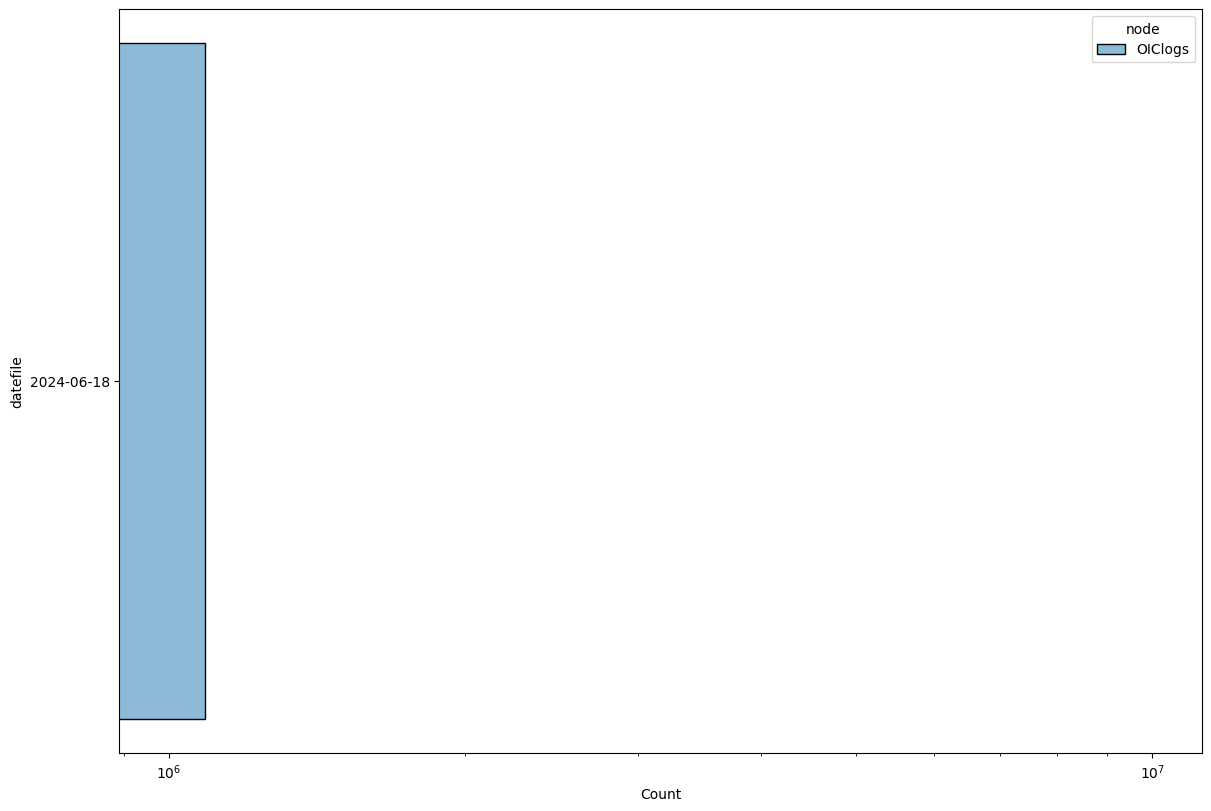

In [ ]:
columns = [ 'datefile', 'node']
if(handshake_df.size>0):
  fig = createhistplotLog((12, 8), handshake_df, columns[0], columns[1])


<ipython-input-76-99f54aa7e921>:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


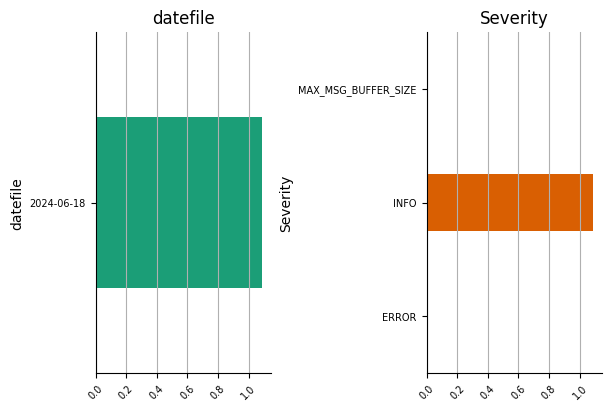

In [ ]:
columns = [ 'datefile', 'Severity']
if(handshake_df.size>0):
  fig = create2HBarPlots(handshake_df, columns, (6, 4))

<ipython-input-76-99f54aa7e921>:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


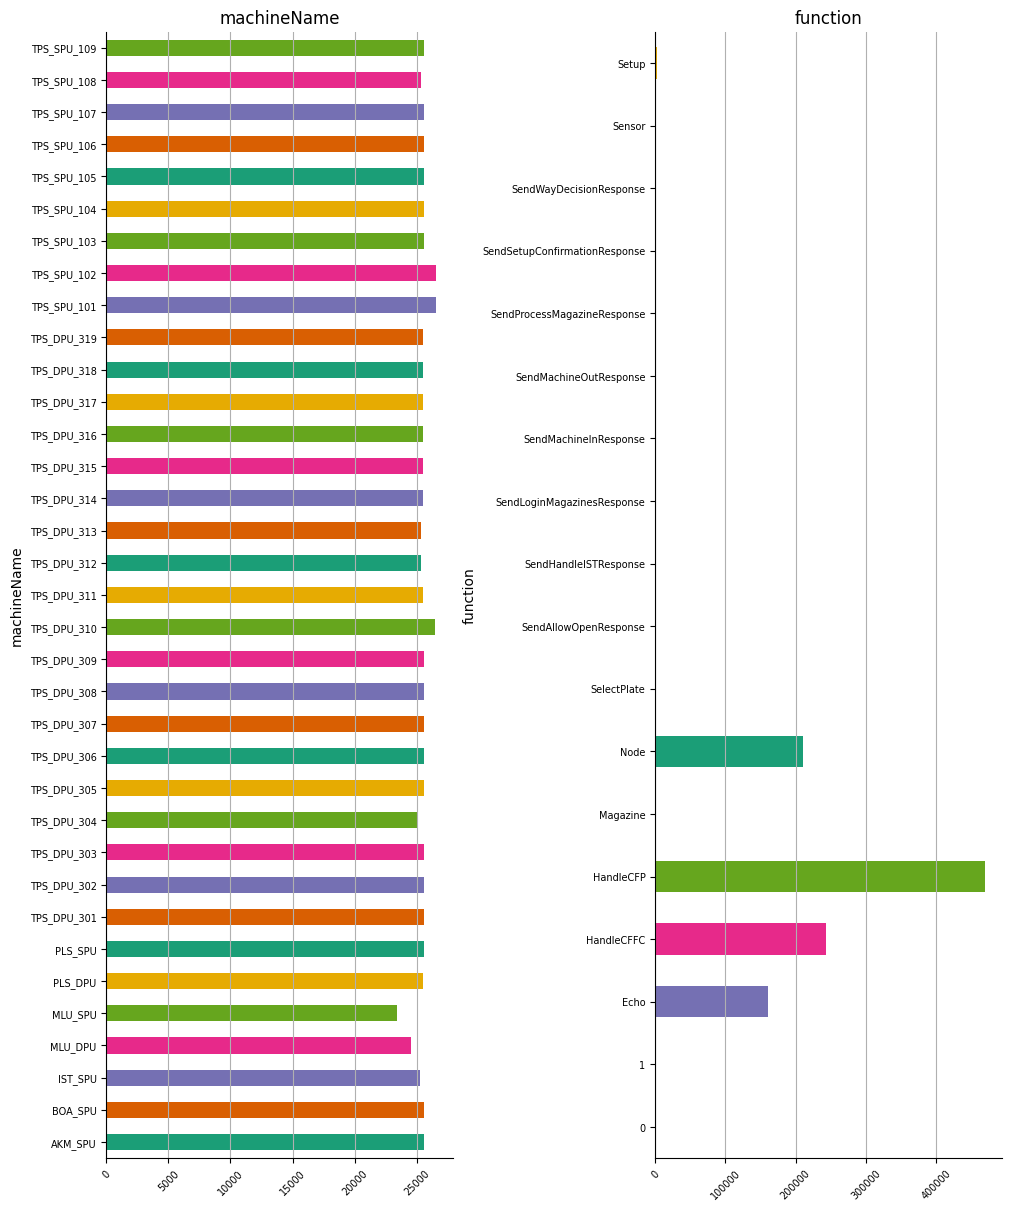

In [ ]:
columns = ['machineName', 'function']
if(handshake_df.size>0):
  fig = create2HBarPlots(handshake_df, columns, (10, 12))
  #fig = createPivotTablePlot((14,18), hanshake_df, columns)

In [ ]:
if(handshake_df.size>0):
  handshakeEcho_df = handshake_df[handshake_df['function'] == 'Echo']


<ipython-input-64-5ac7ab0454bd>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['data_type'] = df[colName].apply(lambda x: type(x).__name__)
<ipython-input-64-5ac7ab0454bd>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['data_type'] = df['data_type'].astype(str)


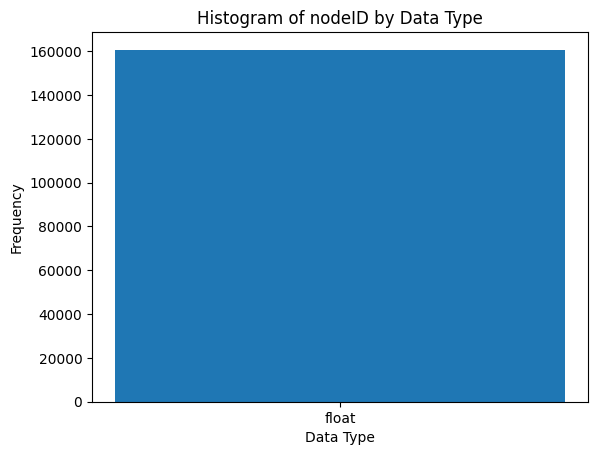

<ipython-input-83-2c9e9b7f83b8>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  handshakeEcho_df['duration'] = handshakeEcho_df['duration'].astype(float)
<ipython-input-64-5ac7ab0454bd>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['data_type'] = df[colName].apply(lambda x: type(x).__name__)
<ipython-input-64-5ac7ab0454bd>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docum

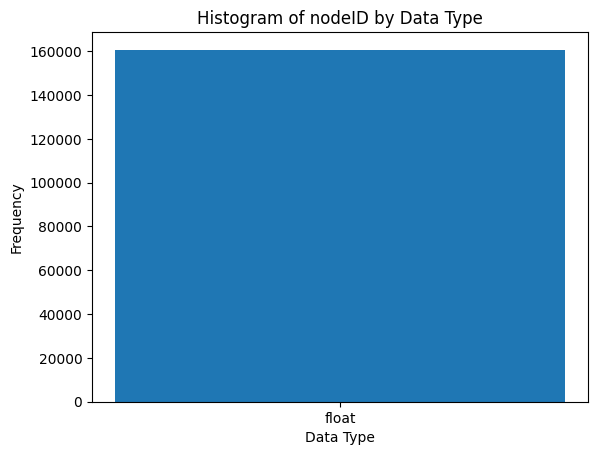

In [ ]:
colName = 'duration'
if(handshake_df.size>0):
  displayColumnDataType(handshakeEcho_df, colName)
  handshakeEcho_df['duration'] = handshakeEcho_df['duration'].astype(float)
  displayColumnDataType(handshakeEcho_df, colName)
  #handshakeEcho_df2 = convertfastNodeIDType(handshakeEcho_df,colName)
  #displayColumnDataType(handshakeEcho_df2, colName)

In [ ]:
# Convert duration from milliseconds to seconds
if(handshake_df.size>0):
  handshakeEcho_df['duration in seconds'] = handshakeEcho_df['duration'] / 1000
  handshakeEcho_df

<ipython-input-84-7f1fde07dcd3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  handshakeEcho_df['duration in seconds'] = handshakeEcho_df['duration'] / 1000


In [ ]:
# Convert 'datetime' column to datetime type before grouping with error handling
if(handshake_df.size>0):
  handshakeEcho_df['datetime'] = pd.to_datetime(handshakeEcho_df['datetime'], errors='coerce')
  # Isolate rows that do not match the specified data format
  rows_with_invalid_format = handshakeEcho_df[pd.isnull(handshakeEcho_df['datetime'])]

  # Display the isolated rows
  rows_with_invalid_format

<ipython-input-85-6ce4c0b9a1d7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  handshakeEcho_df['datetime'] = pd.to_datetime(handshakeEcho_df['datetime'], errors='coerce')


In [ ]:
#showMinMaxDates(handshakeEcho_df, legend='handshakeEcho_df')

In [ ]:
def extractColumnString(df, columnName):
  subset_df = df[df[columnName].apply(lambda x: isinstance(x, str))]
  #print(subset_df)
  return subset_df
#wrongDuration_df = extractColumnString(handshakeEcho_df,'duration')
#print(wrongDuration_df)

In [ ]:
# from matplotlib import pyplot as plt
# handshakeEcho_df.plot(kind='scatter', x='nodeID', y='duration', s=32, alpha=.8)
# plt.gca().spines[['top', 'right',]].set_visible(False)

(30, 14.4)


<ipython-input-89-d546ef1d7a9e>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=handshakeEcho_df, x='duration in seconds', y='machineName', palette='Dark2')


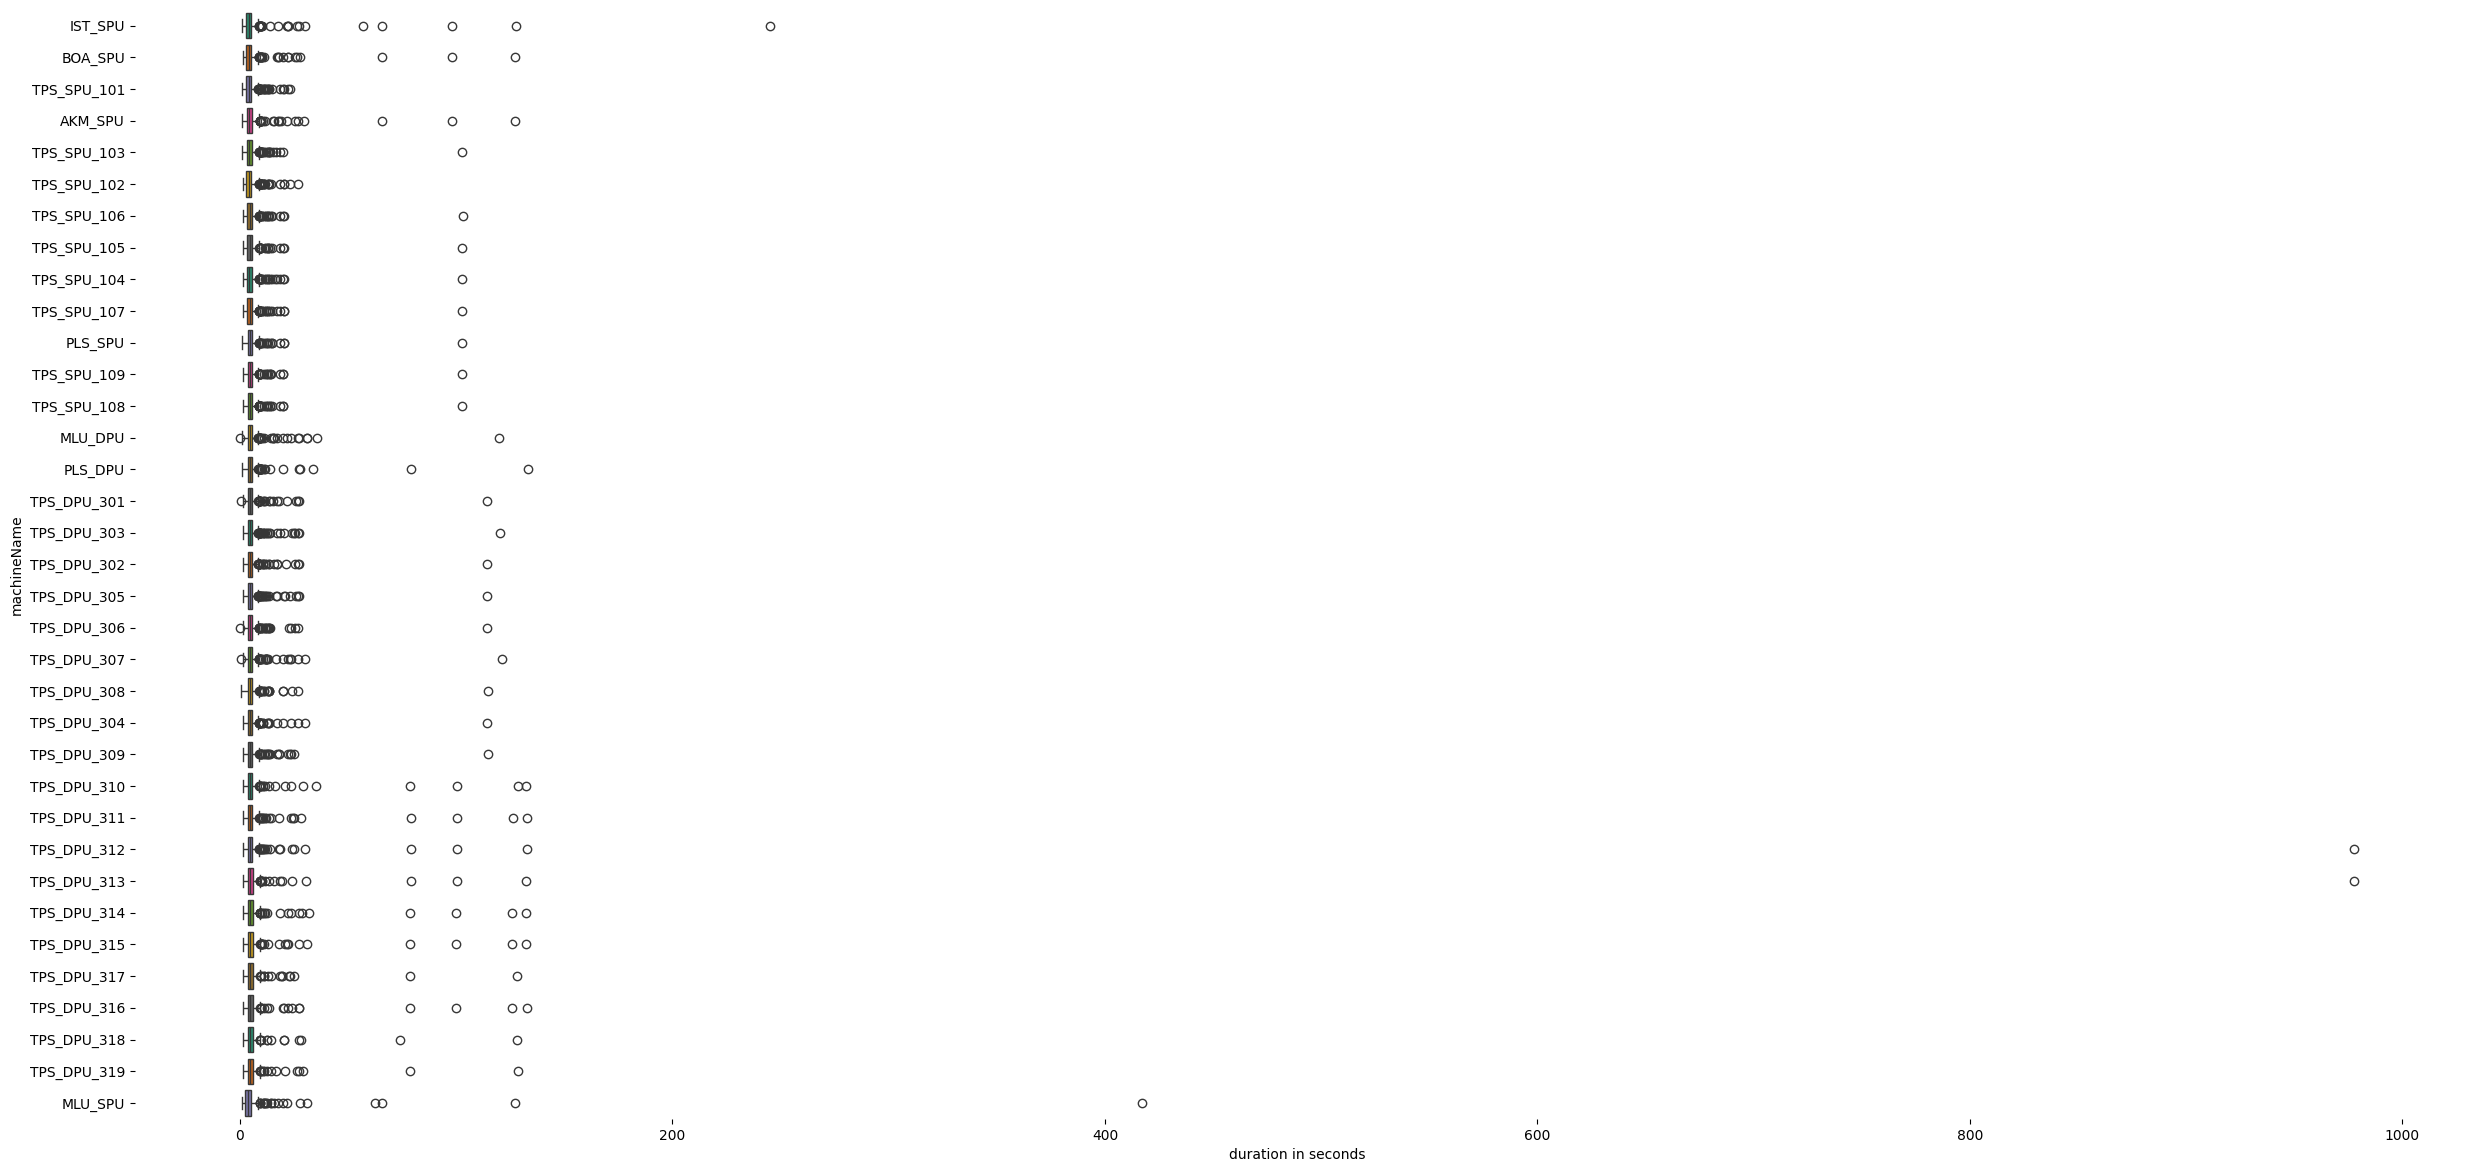

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
# Set the figure size
if(handshakeEcho_df.size>0):
  figsize = (30, 0.4 * len(handshakeEcho_df['machineName'].unique()))
  print(figsize)
  plt.figure(figsize=figsize)
  sns.boxplot(data=handshakeEcho_df, x='duration in seconds', y='machineName', palette='Dark2')
  #sns.violinplot(handshakeEcho_df, x='duration in seconds', y='machineName', inner='box', palette='Dark2')
  sns.despine(top=True, right=True, bottom=True, left=True)
  plt.show()

(30, 14.4)


<ipython-input-90-a4aa0b6fc48e>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(handshakeEcho_df, x='duration in seconds', y='machineName', inner='box', palette='Dark2')


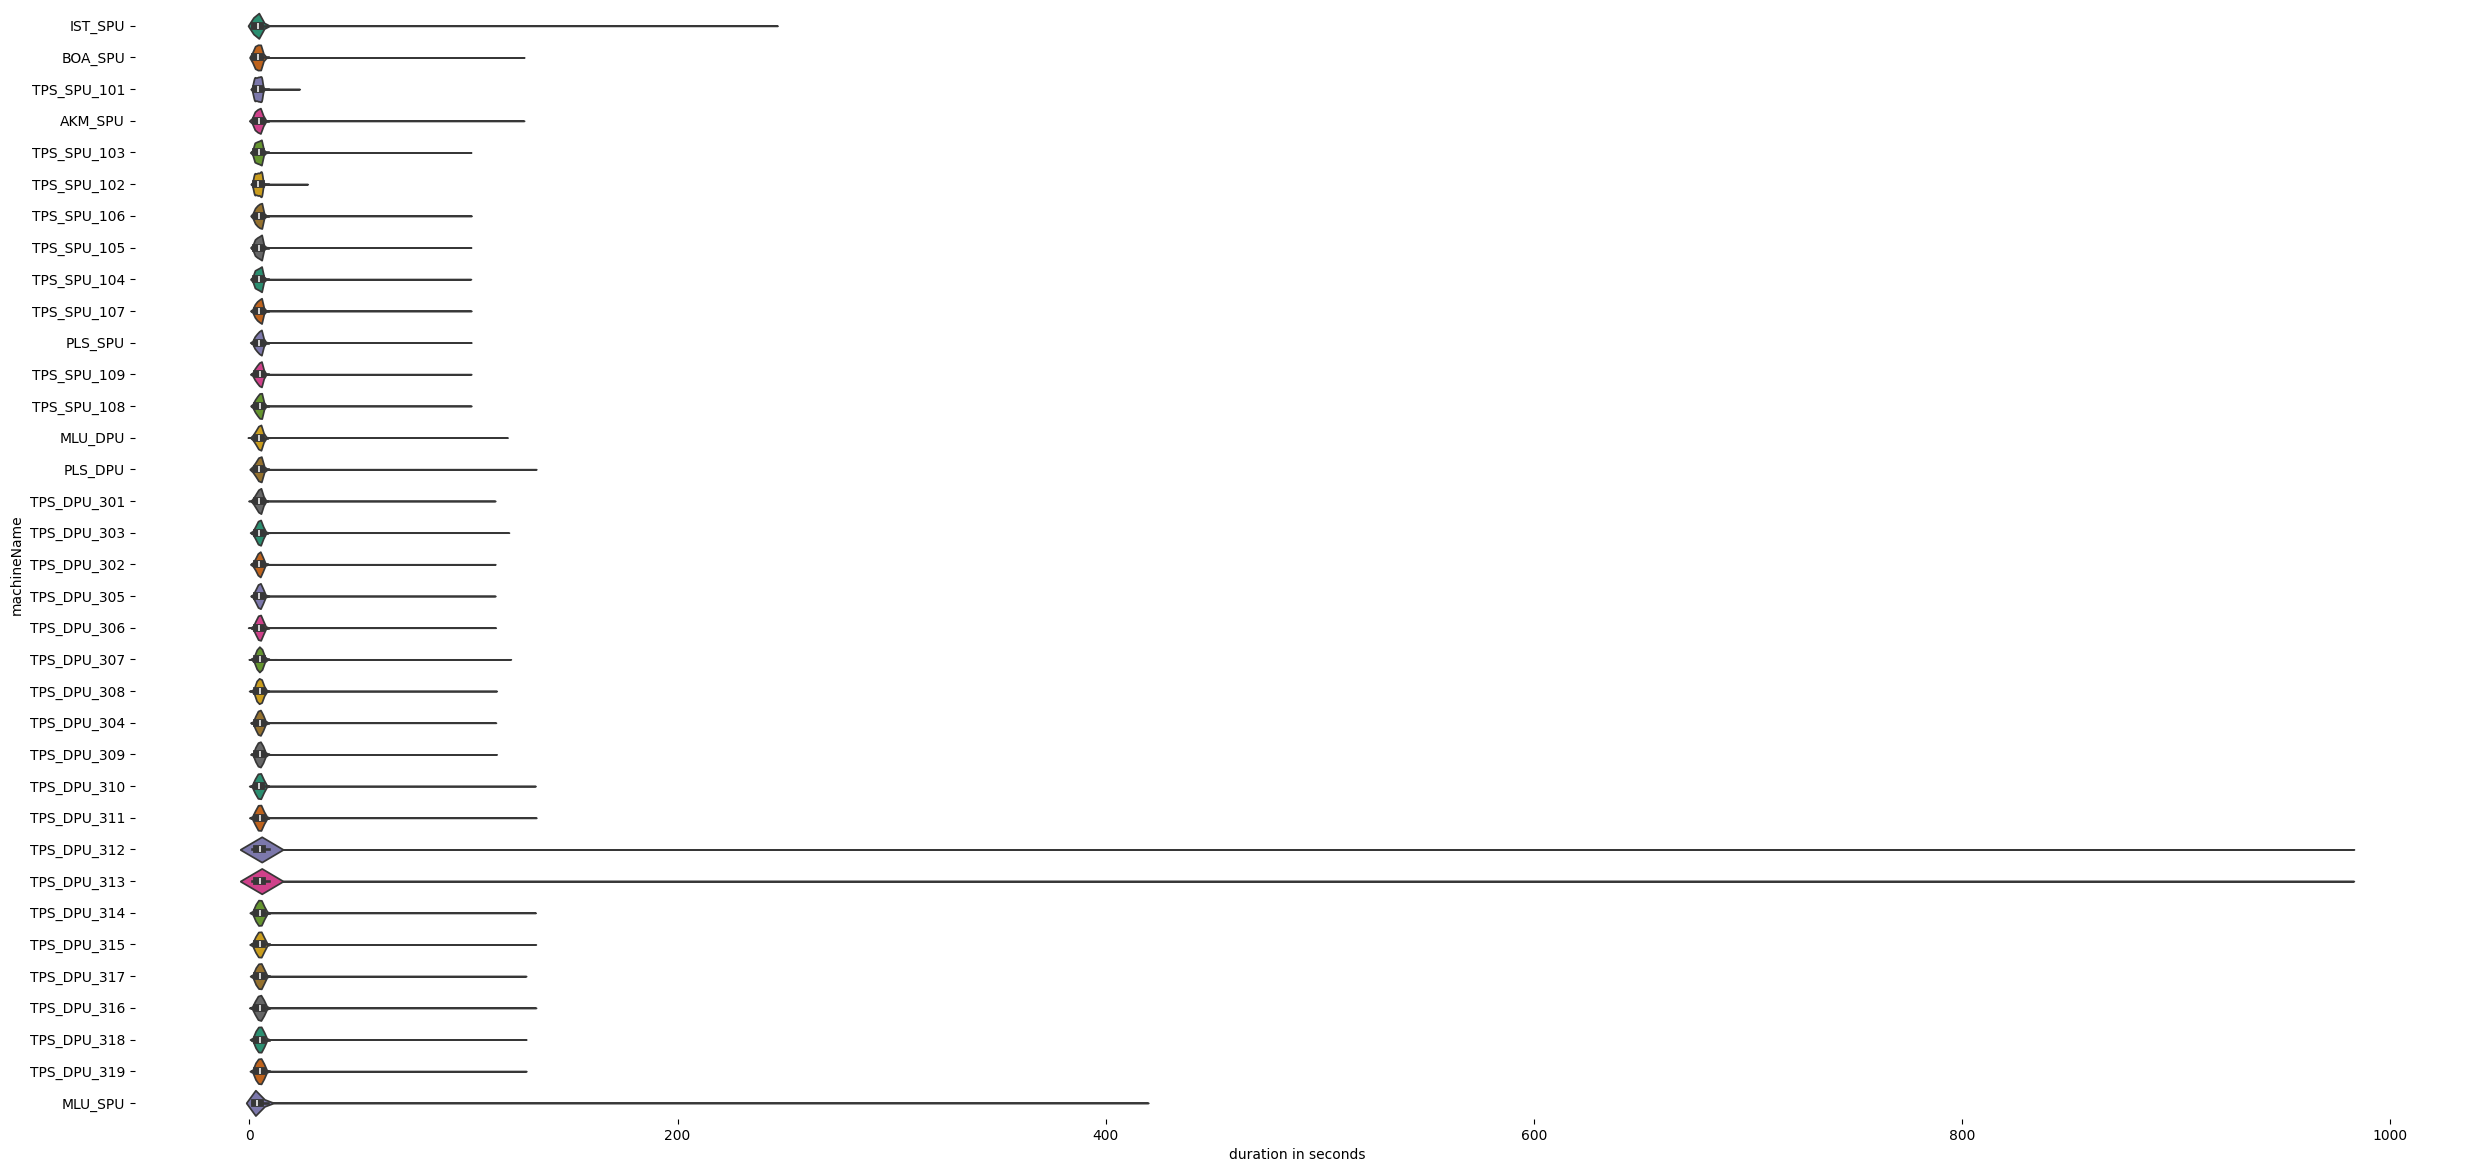

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
# Set the figure size
if(handshakeEcho_df.size>0):
  figsize = (30, 0.4 * len(handshakeEcho_df['machineName'].unique()))
  print(figsize)
  plt.figure(figsize=figsize)
  #sns.boxplot(data=handshakeEcho_df, x='duration(s)', y='machineName', palette='Dark2')
  sns.violinplot(handshakeEcho_df, x='duration in seconds', y='machineName', inner='box', palette='Dark2')
  sns.despine(top=True, right=True, bottom=True, left=True)
  plt.show()

In [ ]:
def getStats(df, xColumnName, yColumnName):
  print(f'---- {yColumnName} Stats ---')
  # Group the DataFrame by 'machineName' and calculate the minimum, maximum, and average values for 'duration'
  summary_table = df.groupby(xColumnName)[yColumnName].agg(['count', 'min', 'max', 'mean', 'std'])
  # Display the summary table
  print(handshakeEcho_df.size)
  print(summary_table)

if(handshakeEcho_df.size>0):
  getStats(handshakeEcho_df, 'machineName', 'duration')

---- duration Stats ---
3373818
             count     min       max         mean           std
machineName                                                    
AKM_SPU       4572  1032.0  127204.0  4267.625547   2950.385483
BOA_SPU       4569  1172.0  127235.0  4067.338148   2972.006087
IST_SPU       4523  1140.0  244923.0  4048.287199   4729.458829
MLU_DPU       4510   158.0  119672.0  4583.989579   2423.674037
MLU_SPU       4346  1094.0  417298.0  3942.311091   6864.951473
PLS_DPU       4552  1141.0  132985.0  4508.606986   2704.285138
PLS_SPU       4565  1141.0  102873.0  4550.528587   2056.892024
TPS_DPU_301   4570   375.0  113999.0  4567.757330   2222.193307
TPS_DPU_302   4571  1266.0  114030.0  4614.190549   2213.922699
TPS_DPU_303   4572  1203.0  120360.0  4637.384514   2321.532849
TPS_DPU_304   4571  1329.0  114327.0  4760.316123   2206.570986
TPS_DPU_305   4573  1359.0  114046.0  4698.141045   2235.163417
TPS_DPU_306   4574   219.0  114234.0  4713.132051   2201.887426
TPS_DPU_

In [ ]:
# Filter the DataFrame to include only rows where duration > 40000 seconds
echodetectionlimit = 15000
#if(handshakeEcho_df.size>0):
hanshakeLongEcho_df = handshakeEcho_df[handshakeEcho_df['duration'] > echodetectionlimit]

In [ ]:
# Display the filtered DataFrame
#if(handshakeEcho_df.size>0):
hanshakeLongEcho_df


,index,datefile,DNF,node,filename,datetime,Folder,Filename,Severity,nodeID,...,address,function,parameterName,parameterValue,handshakeOldValue,handshakeCurrentValue,duration,message,data_type,duration in seconds
154008,220400,2024-06-18,2024-06-18_OIClogs_/content/2024-06-18_CPCLogs...,OIClogs,/content/2024-06-18_CPCLogs_HandshakeEvents__G...,2024-06-13 05:24:30.000243,CPC Logs 12.07.2024,2024-06-13.oiclog,INFO,17110347,...,10.10.1.40|7000,Echo,NaN,NaN,NaN,NaN,15081.0,Echo response time for 'MLU_DPU (10.10.1.4...,float,15.081
200740,289492,2024-06-18,2024-06-18_OIClogs_/content/2024-06-18_CPCLogs...,OIClogs,/content/2024-06-18_CPCLogs_HandshakeEvents__G...,2024-06-13 07:07:32.000201,CPC Logs 12.07.2024,2024-06-13.oiclog,INFO,2110001,...,10.10.1.5|7000,Echo,NaN,NaN,NaN,NaN,244923.0,Echo response time for 'IST_SPU (10.10.1.5...,float,244.923
201450,293149,2024-06-18,2024-06-18_OIClogs_/content/2024-06-18_CPCLogs...,OIClogs,/content/2024-06-18_CPCLogs_HandshakeEvents__G...,2024-06-13 07:13:28.000262,CPC Logs 12.07.2024,2024-06-13.oiclog,INFO,1110001,...,10.10.1.2|7000,Echo,NaN,NaN,NaN,NaN,15749.0,Echo response time for 'MLU_SPU (10.10.1.2...,float,15.749
201453,293163,2024-06-18,2024-06-18_OIClogs_/content/2024-06-18_CPCLogs...,OIClogs,/content/2024-06-18_CPCLogs_HandshakeEvents__G...,2024-06-13 07:13:30.000387,CPC Logs 12.07.2024,2024-06-13.oiclog,INFO,17110001,...,10.10.1.40|7000,Echo,NaN,NaN,NaN,NaN,15280.0,Echo response time for 'MLU_DPU (10.10.1.4...,float,15.280
201465,293200,2024-06-18,2024-06-18_OIClogs_/content/2024-06-18_CPCLogs...,OIClogs,/content/2024-06-18_CPCLogs_HandshakeEvents__G...,2024-06-13 07:13:33.000296,CPC Logs 12.07.2024,2024-06-13.oiclog,INFO,4110001,...,10.10.1.11|7000,Echo,NaN,NaN,NaN,NaN,20361.0,Echo response time for 'TPS_SPU_101 (10.10.1.1...,float,20.361
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
972281,510294,2024-06-18,2024-06-18_OIClogs_/content/2024-06-18_CPCLogs...,OIClogs,/content/2024-06-18_CPCLogs_HandshakeEvents__G...,2024-06-18 17:47:21.000298,CPC Logs 12.07.2024,2024-06-18_3.oiclog,INFO,8110355,...,10.10.1.17|7000,Echo,NaN,NaN,NaN,NaN,17268.0,Echo response time for 'TPS_SPU_104 (10.10.1.1...,float,17.268
972284,510299,2024-06-18,2024-06-18_OIClogs_/content/2024-06-18_CPCLogs...,OIClogs,/content/2024-06-18_CPCLogs_HandshakeEvents__G...,2024-06-18 17:47:21.000454,CPC Logs 12.07.2024,2024-06-18_3.oiclog,INFO,11110355,...,10.10.1.22|7000,Echo,NaN,NaN,NaN,NaN,16955.0,Echo response time for 'TPS_SPU_107 (10.10.1.2...,float,16.955
972288,510321,2024-06-18,2024-06-18_OIClogs_/content/2024-06-18_CPCLogs...,OIClogs,/content/2024-06-18_CPCLogs_HandshakeEvents__G...,2024-06-18 17:47:22.000579,CPC Logs 12.07.2024,2024-06-18_3.oiclog,INFO,20110355,...,10.10.1.44|7000,Echo,NaN,NaN,NaN,NaN,16611.0,Echo response time for 'TPS_DPU_305 (10.10.1.4...,float,16.611
972290,510331,2024-06-18,2024-06-18_OIClogs_/content/2024-06-18_CPCLogs...,OIClogs,/content/2024-06-18_CPCLogs_HandshakeEvents__G...,2024-06-18 17:47:23.000032,CPC Logs 12.07.2024,2024-06-18_3.oiclog,INFO,22110355,...,10.10.1.46|7000,Echo,NaN,NaN,NaN,NaN,16767.0,Echo response time for 'TPS_DPU_307 (10.10.1.4...,float,16.767


one peak=2024-06-13 09:48:00 at distance=2.0
one peak=2024-06-13 09:50:00 at distance=4.333333333333334
one peak=2024-06-13 09:52:00 at distance=6.333333333333333
one peak=2024-06-13 09:56:00 at distance=5.666666666666666
one peak=2024-06-13 09:58:00 at distance=6.333333333333334
one peak=2024-06-13 10:14:00 at distance=16.666666666666664
one peak=2024-06-13 10:28:00 at distance=8.333333333333334
one peak=2024-06-13 10:30:00 at distance=16.333333333333336


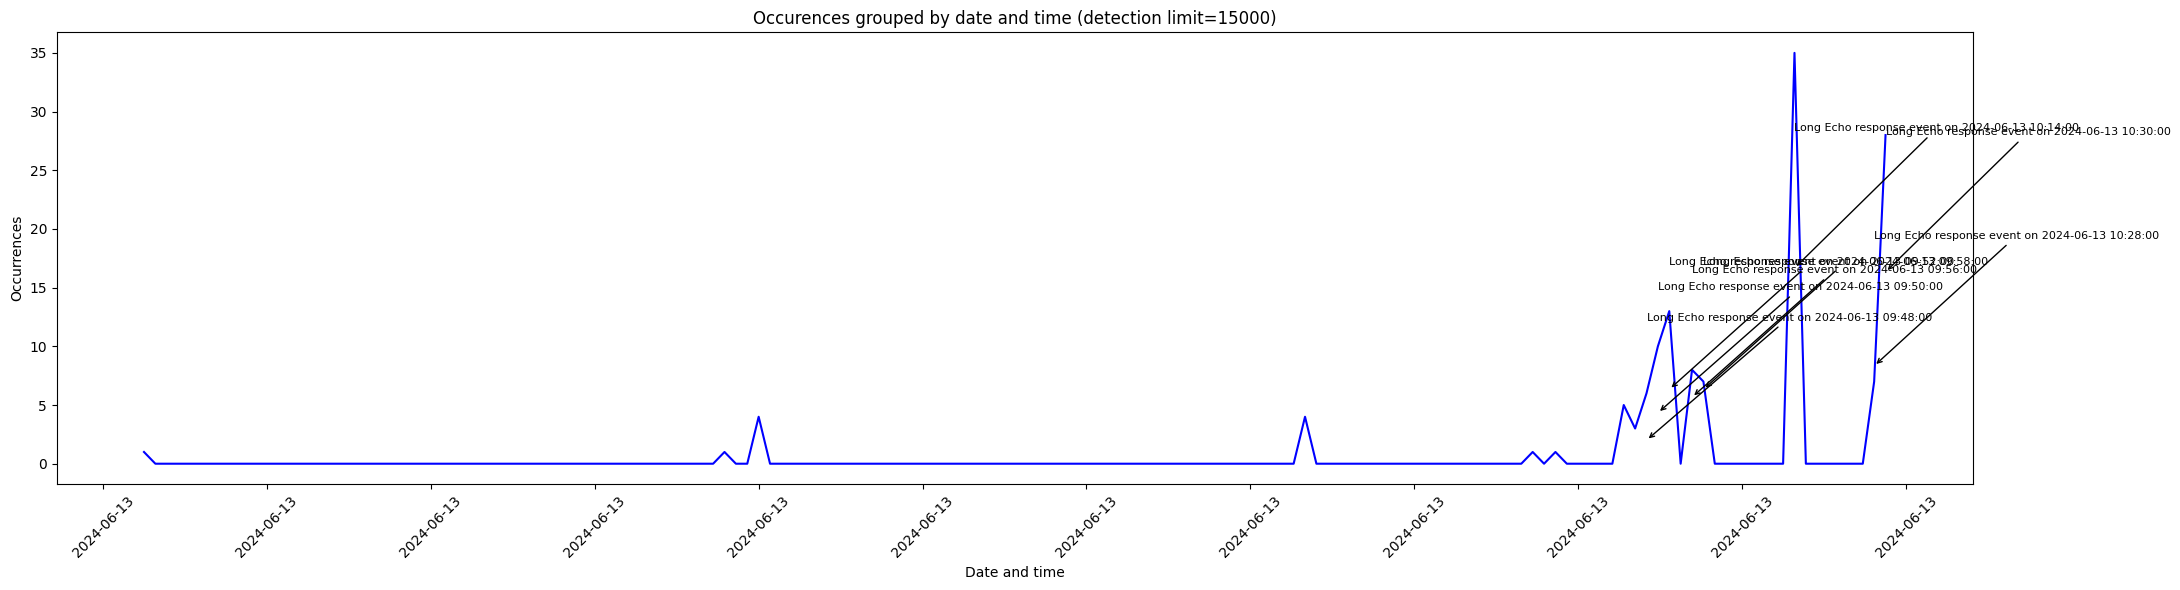

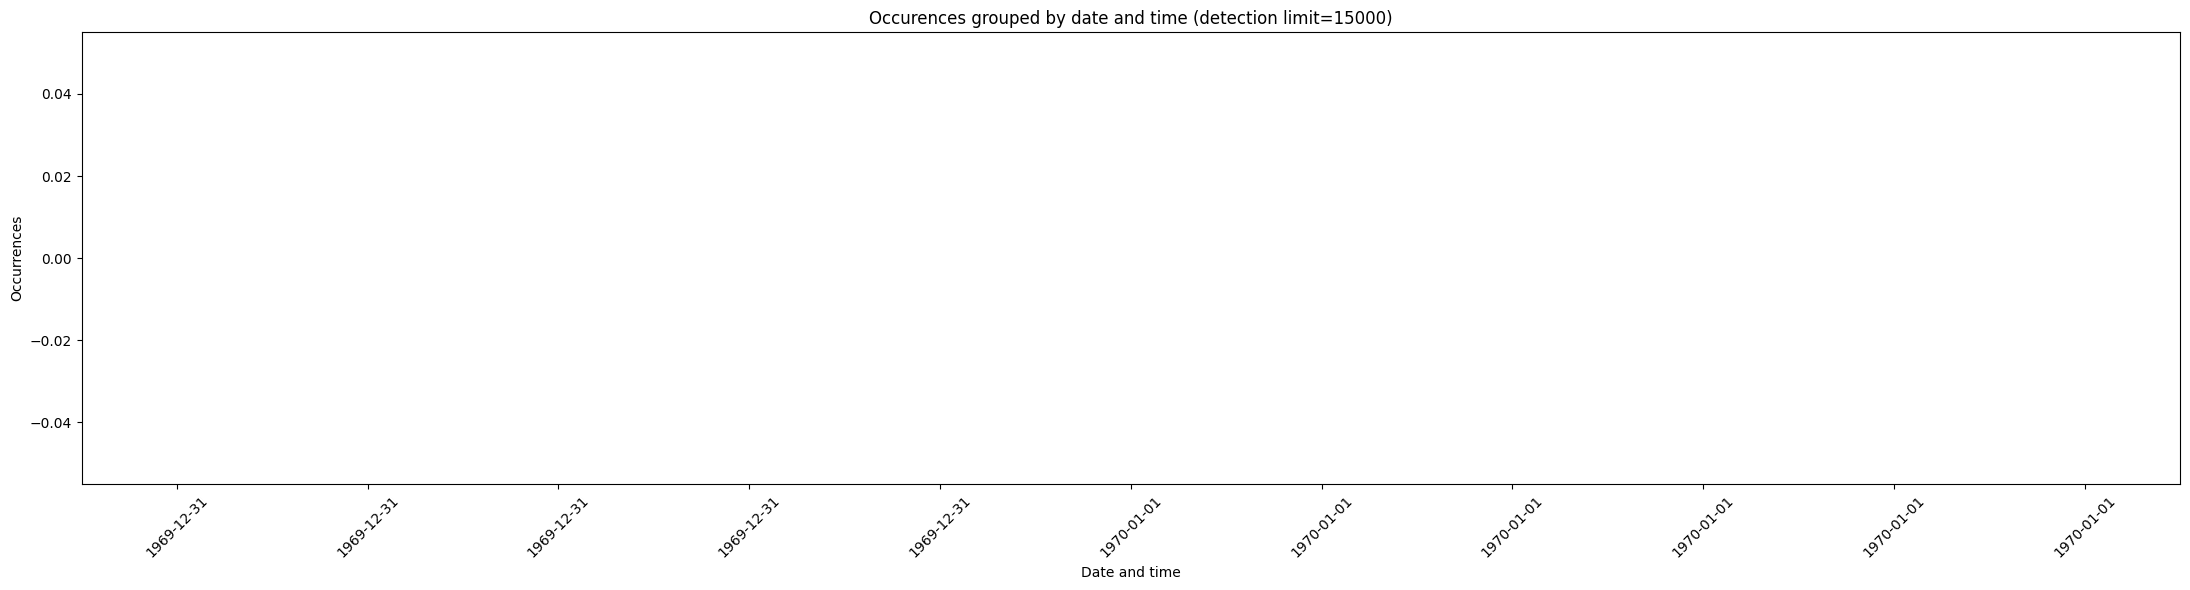

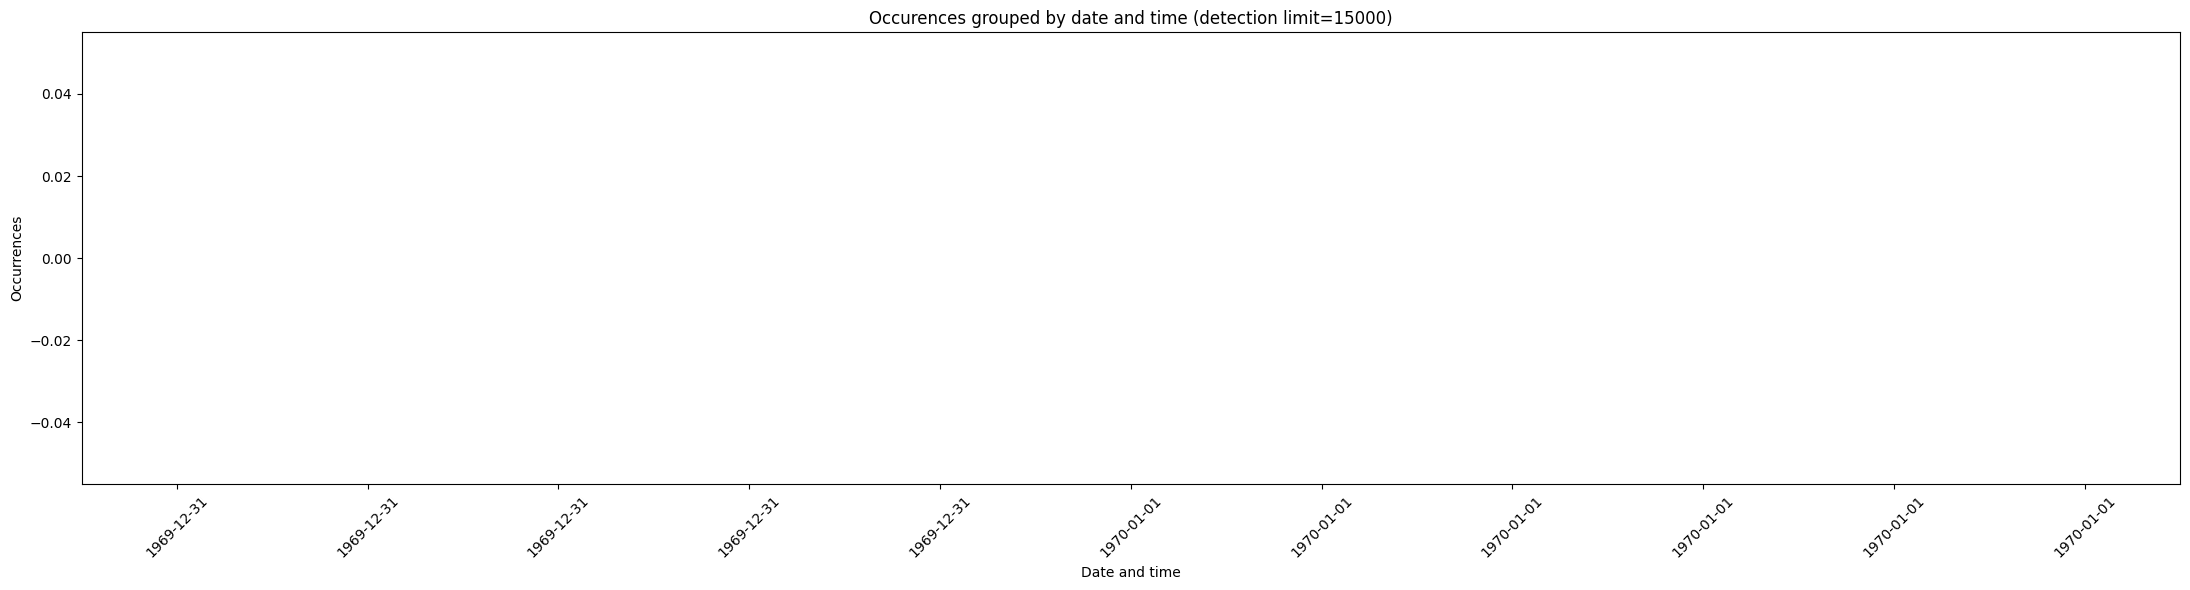

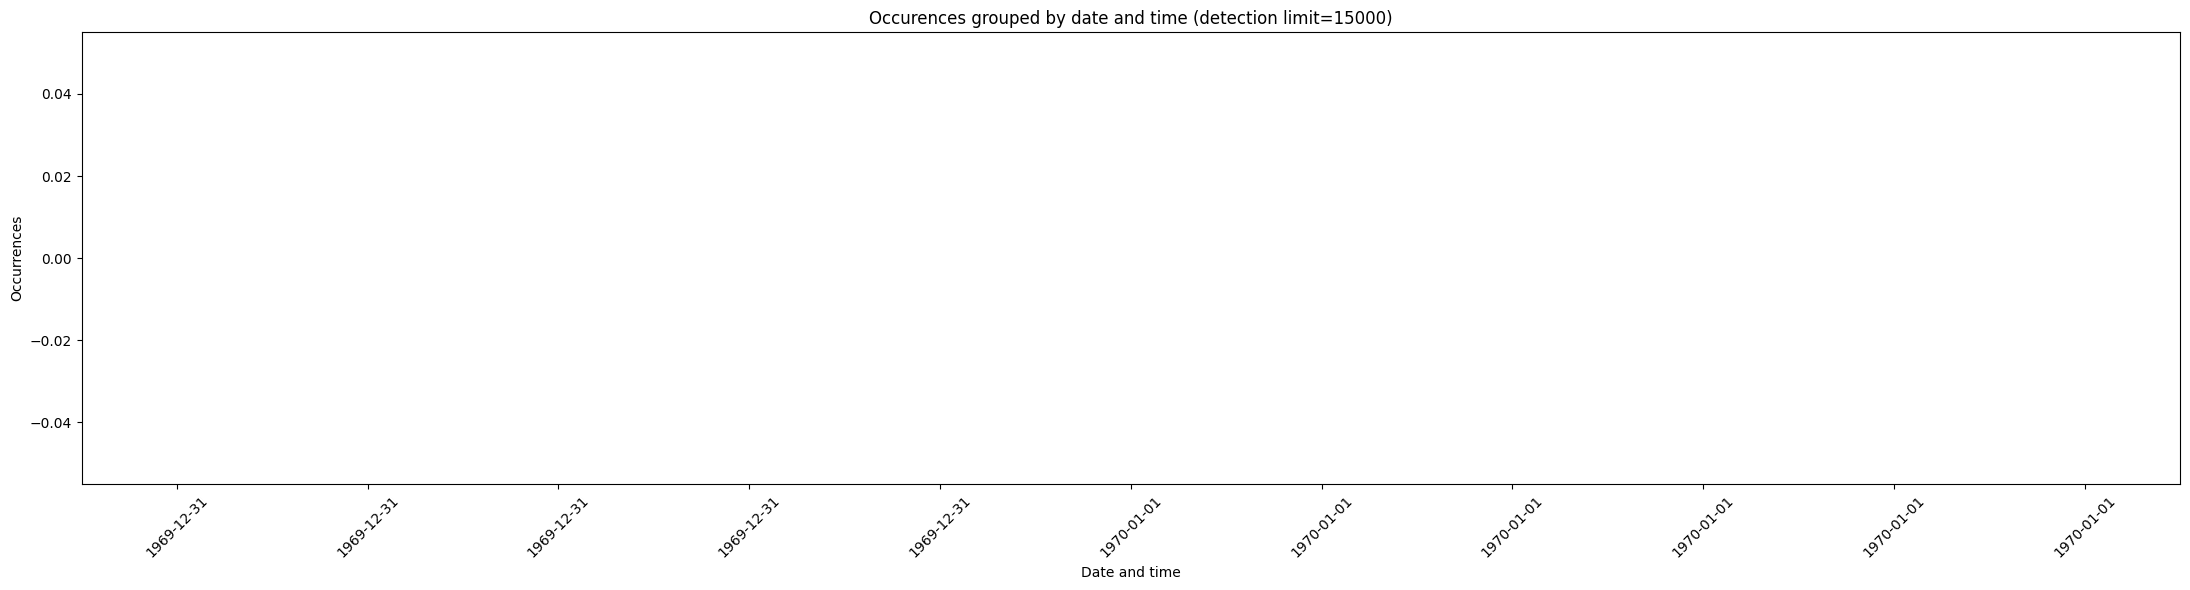

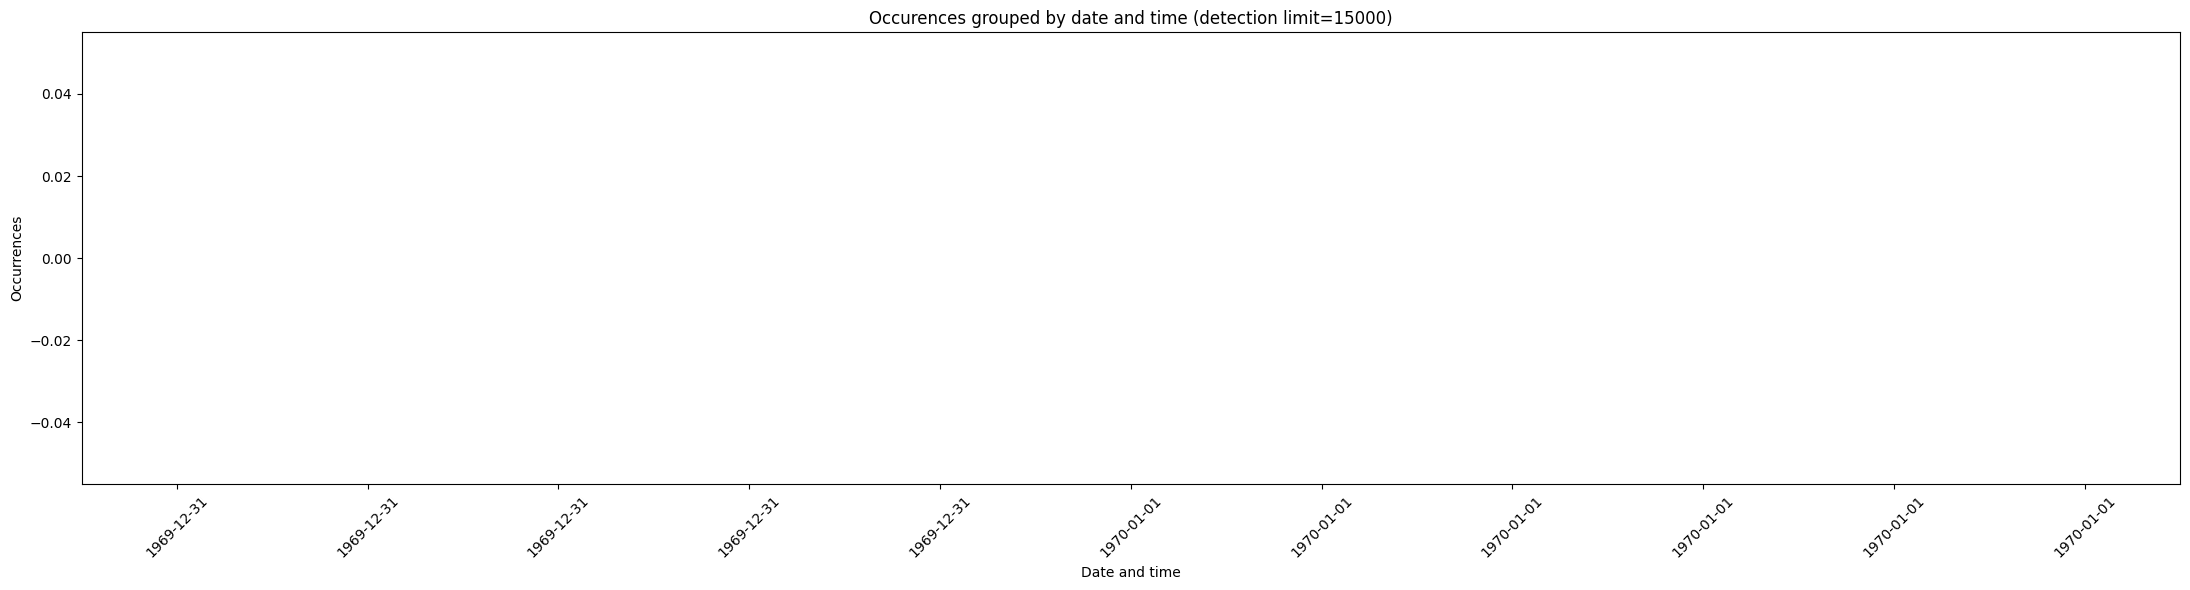

one peak=2024-06-18 09:56:00 at distance=11.0
one peak=2024-06-18 10:44:00 at distance=12.333333333333334
one peak=2024-06-18 12:10:00 at distance=13.333333333333334
one peak=2024-06-18 14:16:00 at distance=9.333333333333332
one peak=2024-06-18 17:46:00 at distance=6.0


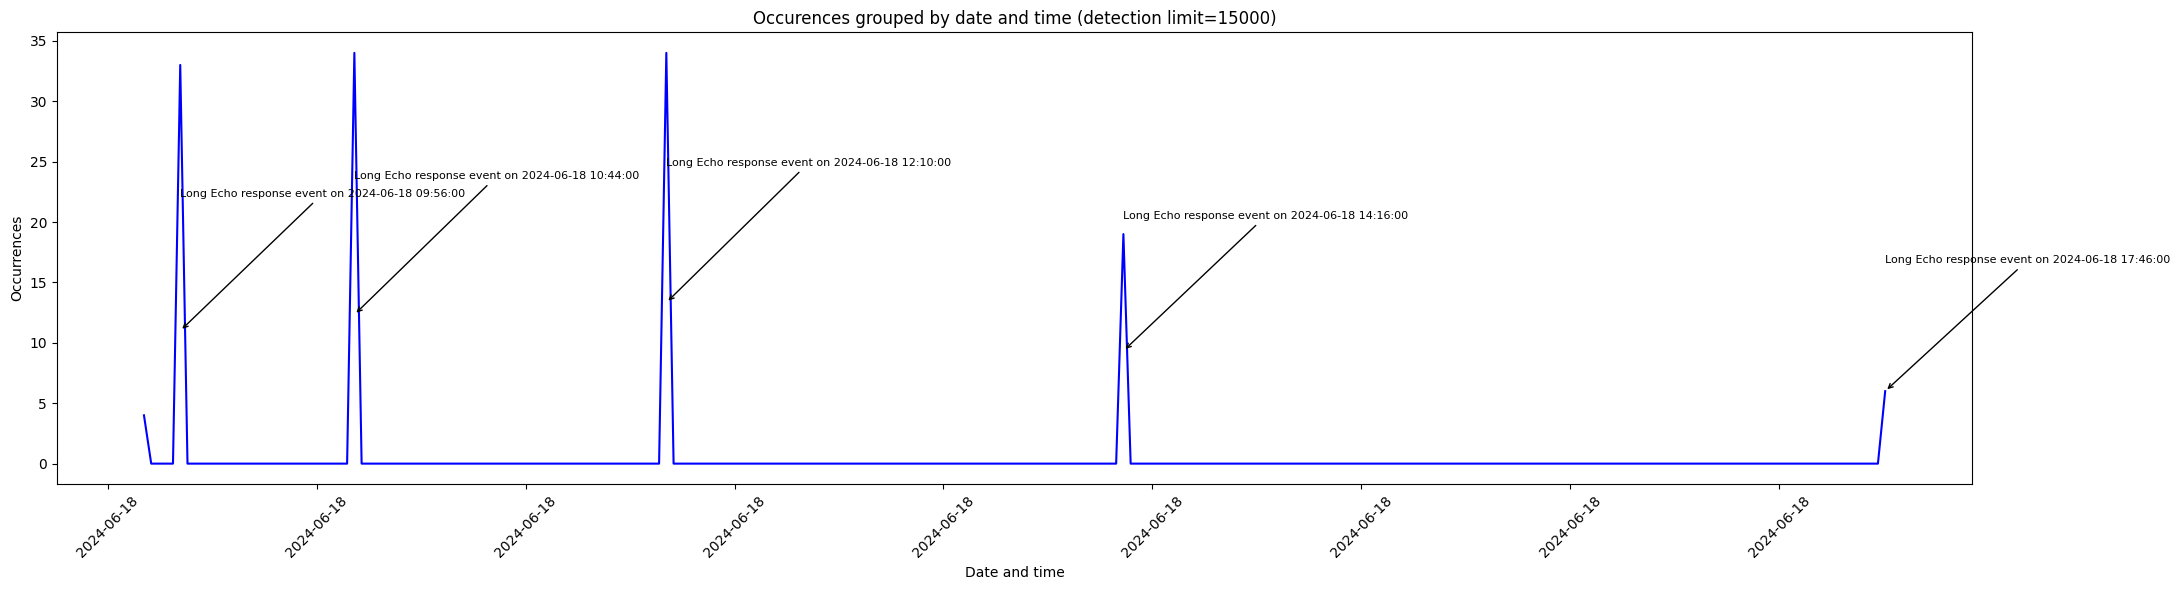

In [ ]:
# Group the DataFrame by date
if(hanshakeLongEcho_df.size>0):
  grouped_df = hanshakeLongEcho_df.groupby(pd.Grouper(key='datetime', freq='D'))

  # Iterate over each date group
  for date, group in grouped_df:
      # Create a unique label for each date
      label = f"Event on {date}"

      # Call the createEventGraph function for each date group
      fig = createEventGraph(group, 5, 'Long Echo response', 1.1, 8, 'blue', f'Occurences grouped by date and time (detection limit={echodetectionlimit})')
  #

In [ ]:
print('#####################################')
if(hanshakeLongEcho_df.size>0):
  getShapeSize('hanshake LongEcho',hanshakeLongEcho_df)

#####################################
Dataframe=hanshake LongEcho has Number of rows: 264 and columns : 21


In [ ]:
def extractDatesAndMachineNames(df):
  start_date = df['datetime'].min()
  end_date = df['datetime'].max()
  print('#####################################')
  print(f'start_date={start_date} end_date={end_date}')
  print('#####################################')
  machines = extractMachineNames(df, 'machineName')
  print(machines)
  print('#####################################')
  return (start_date, end_date, machines)

In [ ]:
def calculate_data_points(data, column, min_value, max_value, start_date, end_date):
    # Filter the data based on the specified conditions
    filtered_data1 = data[(data['datetime'] >= start_date) & (data['datetime'] <= end_date)]
    filtered_data2 = data[(data[column] >= min_value) & (data[column] <= max_value) &
                         (data['datetime'] >= start_date) & (data['datetime'] <= end_date)]
    # Calculate the number of data points
    num_data_points = len(filtered_data1)
    print(f'num_data_points={num_data_points} between {start_date} and {end_date}')
    # Calculate the number of data points
    num_data_points = len(filtered_data2)
    print(f'num_data_points={num_data_points} between {start_date} and {end_date} and {min_value} and {max_value}')
    return num_data_points

In [ ]:
selectedMachine = -1
dataColumnName='duration in seconds' #'machineName',
showMinMaxInColumn(handshakeLongEcho_df, dataColumnName)
(start_date, end_date, machines) = extractDatesAndMachineNames(hanshakeLongEcho_df)
#hanshakeLongEcho_df['duration'] = hanshakeLongEcho_df['duration'].astype(float)
#displayColumnDataType(hanshakeLongEcho_df, dataColumnName)


NameError: name 'handshakeLongEcho_df' is not defined

In [ ]:
#filteredMachine = hanshakeLongEcho_df[hanshakeLongEcho_df['machineName'] == machines[selectedMachine]]
#(start_date, end_date, single) = extractDatesAndMachineNames(filteredMachine)
#calculate_data_points(filteredMachine, dataColumnName, 15000.0, 420000.0, start_date, end_date)
#filteredMachine.plot(kind='scatter', x='datetime', y=dataColumnName, s=32, alpha=.8)

In [ ]:
def createSingleScatterPlotPerMachineNamePerDay(figsize, df, selectedMachine, xColumnName, yColumnName, y_legend, title):
  (start_date, end_date, machines) = extractDatesAndMachineNames(df)
  # Group the DataFrame by date
  grouped_df = df.groupby(pd.Grouper(key='datetime', freq='D'))
  #grouped_df = hanshakeLongEcho_df.groupby(pd.Grouper(key='datefile'))
  # Iterate over each date group
  for date, group in grouped_df:
      # Create a unique label for each date
      label = f"Event on {date}"
      print(label)
      # Call the createEventGraph function for each date group
      (start_date, end_date, singles) = extractDatesAndMachineNames(group)
      if pd.isnull(start_date) or pd.isnull(end_date):
          print("Invalid start_date or end_date. Cannot create plot.")
      else:
          fig = createSingleScatterPlotPerMachineName(figsize, group, start_date, end_date, machines, selectedMachine, 'datetime', dataColumnName, y_legend, title +' on '+ str(date))

if(hanshakeLongEcho_df.size>0):
  createSingleScatterPlotPerMachineNamePerDay((10,8), hanshakeLongEcho_df, selectedMachine, 'datetime', dataColumnName, 'duration in seconds', f'Long Echo response (detection limit={echodetectionlimit})')

In [ ]:


#createDualScatterPlotPerMachine(process_dnp,start_date, end_date, machines, selectedMachine, "Machine Process Data (Axis Study)", dataColumnNames, dataColumnNames)


In [ ]:
#fig = createChronoSeriePlot((18,15), handshakeEcho_df, ['machineName', 'duration'])
## too long

In [ ]:
if(hanshakeLongEcho_df.size>0):
  createDualHistoChartLog((18,15), handshakeEcho_df, 'datefile', 'duration', 'machineName', isYaxisLogSerie1=False, isYaxisLogSerie2=True)



## Vis Exe

In [ ]:
columns = [ 'manufacturer', 'severity']
fig = create2HBarPlots(rdf, columns, (6, 4))

In [ ]:
columns = [ 'datefile', 'node']
fig = createhistplotLog((12, 8), rdf, columns[0], columns[1])

In [ ]:
columns = [ 'methodName', 'node']
fig = createhistplotLog((12, 8), rdf, columns[0], columns[1])

In [ ]:
columns = [ 'methodName', 'node']
fig = createSimpleCountTable((12, 8), rdf, columns)

In [ ]:
columns = ['datefile', 'DNF']
fig = createPivotTablePlot((14,18), rdf, columns)
# # Save the plot as PNG
pngfilename  = globalCFCallfilename[:len(globalCFCallfilename)-7] + '(DateFile_Balance)'
fig.savefig(pngfilename+'.png', dpi=120)

In [ ]:
columns = ['node', 'DNF']
#filename_counts = rdf[columns].value_counts().reset_index('frequency')
#filename_pivotcounts = rdf.pivot_table(index='node', columns='filename', aggfunc='size', fill_value=0)
#print(filename_pivotcounts)
fig = createPivotTablePlot((14,18), rdf, columns)
# # Save the plot as PNG
pngfilename  = globalCFCallfilename[:len(globalCFCallfilename)-7] + '(NodeFile_Balance)'
fig.savefig(pngfilename+'.png', dpi=120)

In [ ]:
columns = [ 'node', 'methodName']
fig = createPivotTablePlot((14, 18), rdf, columns, True)
# # Save the plot as PNG
pngfilename  = globalCFCallfilename[:len(globalCFCallfilename)-7] + '(NodeMethod_Balance)'
fig.savefig(pngfilename+'.png', dpi=120)

In [ ]:
columns = ['datefile', 'methodName']
fig = createPivotTablePlot((14,24), rdf, columns, True)
# # Save the plot as PNG
pngfilename  = globalCFCallfilename[:len(globalCFCallfilename)-7] + '(DateMethod_Balance)'
fig.savefig(pngfilename+'.png', dpi=120)

In [ ]:
print ('#### TOP Ranking #######')
echoColumnCount(rdf,'methodName')
echoValueCount(rdf,'methodName')
print ('#### TOP Ranking #######')
echoColumnCount(rdf,'machineName')
echoValueCount(rdf,'machineName')
print ('###########')


In [ ]:
columns = ['machineName', 'methodName']
#echoValueCount(rdf, 'methodName')
echoColumnCount(rdf, 'machineName')
echoColumnCount(rdf, 'methodName')
print (rdf['methodName'].unique())

fig = create2HBarPlots(rdf, columns, (10, 12))
# # Save the plot as PNG
pngfilename  = globalCFCallfilename[:len(globalCFCallfilename)-7] + '(MachineMethodsCharts)'
fig.savefig(pngfilename+'.png', dpi=120)

In [ ]:
# @title Heatmaps
group_columns = 'methodName'
columnY = ['manufacturer', 'machineName']
createHeatmap2D((34, 22), rdf, group_columns, columnY)

In [ ]:
rdf['methodName'].unique()

In [ ]:
fig = createDoubleCountTable((10,18), rdf, 'methodName', 'machineName')
# # Save the plot as PNG
pngfilename  = globalCFCallfilename[:len(globalCFCallfilename)-7] + '(MachineMethodsDataTable)'
fig.savefig(pngfilename+'.png', dpi=120, bbox_inches='tight')

In [ ]:
#@ SetupConfirmation Per Instrument
rdf_setupConf = rdf[rdf['methodName'] == 'cffcSetupConfirmation']
echoValueCount(rdf_setupConf, 'machineName')

fig = createDoubleCountTable((10,18), rdf_setupConf, 'methodName', 'machineName')
# # Save the plot as PNG
pngfilename  = globalCFCallfilename[:len(globalCFCallfilename)-7] + '(cffcSetupConfirmationDataTable)'
fig.savefig(pngfilename+'.png', dpi=120, bbox_inches='tight')

In [ ]:
#@ cffcUploadMachineConditionOrMessages Per Instrument
rdf_setupConf = rdf[rdf['methodName'] == 'cffcUploadMachineConditionOrMessages']
echoValueCount(rdf_setupConf, 'machineName')

fig = createDoubleCountTable((10,18), rdf_setupConf, 'methodName', 'machineName')
# # Save the plot as PNG
pngfilename  = globalCFCallfilename[:len(globalCFCallfilename)-7] + '(cffcUploadMachineConditionOrMessages_DataTable)'
fig.savefig(pngfilename+'.png', dpi=120, bbox_inches='tight')

In [ ]:
#@title Display PlateHistory
rdf_plateHistory['serialNumber']

In [ ]:
rdf_plateHistory

In [ ]:
def create2HBarXPlots(df,serieX, columns, figsize=(10, 5.2), isXaxisLogSerie1=False, isXaxisLogSerie2=False, threshold_Serie1 = 40, threshold_Serie2 = 50):
  # Remove the row where serieX is empty
  result_df = df.dropna(subset=[serieX])
  # Create subplots with 2 row and 2 columns
  fig, axs = plt.subplots(1, 2, figsize=figsize, layout='constrained')
  # Plot the first chart on the left subplot
  ax = axs[0]
  sns.barplot(data=result_df, x=columns[0], y=serieX, palette='Dark2', legend=False, ax=ax)
  ax.set_ylabel(serieX)  # Set the y-axis label to serieX
  ax.spines[['top', 'right']].set_visible(False)
  # Set x-axis to logarithmic scale
  if isXaxisLogSerie1: ax.set_xscale('log')

  # Set the font size for the annotation
  annotation_font_size = 8
  # Annotate the values above threshold_Serie1
  result_df[columns[0]] = pd.to_numeric(result_df[columns[0]])
  max_value_index = result_df[columns[0]].idxmax()
  max_value = result_df.loc[max_value_index, columns[0]]
  max_value_serialNumber = result_df.loc[max_value_index, 'serialNumber']
  offst = max_value*0.125
  for index, value in enumerate(result_df[columns[0]]):
      # Check if the max value exceeds the threshold_Serie1
      if (value == max_value):
          ax.annotate(f'Max: {max_value}\n{max_value_serialNumber}', xy=(max_value, max_value_index), xytext=(max_value+offst, max_value_index + 0.5), arrowprops=dict(facecolor='blue', shrink=0.05), fontsize=annotation_font_size)
      elif value > threshold_Serie1:
          ax.annotate(f'{value}', xy=(value, index), xytext=(value+offst, index + 0.5),arrowprops=dict(facecolor='grey', shrink=0.05), fontsize=annotation_font_size)
      #else: ax.annotate(f'Max: {max_value}', xy=(max_value, max_value_index), xytext=(max_value+offst, max_value_index + 0.5), arrowprops=dict(facecolor='blue', shrink=0.05), fontsize=annotation_font_size)

  # Plot the second chart on the right subplot
  ax = axs[1]
  # Reverse the order of group names
  sns.barplot(data=result_df, x=columns[1], y=serieX, palette='Dark2', legend=False, ax=ax)
  ax.set_ylabel(serieX)  # Set the y-axis label to serieX
  ax.spines[['top', 'right']].set_visible(False)
  # Set xy-axis to logarithmic scale
  if isXaxisLogSerie2: ax.set_xscale('log')
  # Set titles for the subplots
  axs[0].set_title(f'{columns[0]} per {serieX}')
  axs[1].set_title(f'{columns[1]} per {serieX}')

  # Set the font size for the annotation
  annotation_font_size = 8
  # Annotate the values above threshold_Serie2
  result_df[columns[1]] = pd.to_numeric(result_df[columns[1]])
  max_value_index = result_df[columns[1]].idxmax()
  max_value = result_df.loc[max_value_index, columns[1]]
  max_value_serialNumber = result_df.loc[max_value_index, 'serialNumber']
  offst = max_value*0.125
  for index, value in enumerate(result_df[columns[1]]):
      # Check if the max value exceeds the threshold_Serie2
      if (value == max_value):
          ax.annotate(f'Max: {max_value}\n{max_value_serialNumber}', xy=(max_value, max_value_index), xytext=(max_value+offst, max_value_index + 0.5), arrowprops=dict(facecolor='blue', shrink=0.05), fontsize=annotation_font_size)
      elif value > threshold_Serie2:
          ax.annotate(f'{value}', xy=(value, index), xytext=(value+offst, index + 0.5), arrowprops=dict(facecolor='grey', shrink=0.05), fontsize=annotation_font_size)
      # else:ax.annotate(f'Max: {max_value}', xy=(max_value, max_value_index), xytext=(max_value+offst, max_value_index + 0.5), arrowprops=dict(facecolor='blue', shrink=0.05), fontsize=annotation_font_size)

  for ax in fig.axes:
      # Enable grid lines on the x-axis
      ax.xaxis.grid(True)
      # Set the font size for y-axis tick labels
      ax.tick_params(axis='y', labelsize=7)
      ax.tick_params(axis='x', labelsize=7)
      ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
  # Adjust the spacing between subplots
  #plt.subplots_adjust(wspace=1.4)
  # Show the plot
  plt.show()
  return fig



In [ ]:
getColumnNames(rdf_plateHistory)
# print (rdf_plateHistory['serialNumber'].unique())
#fig = createDoubleCountTable((10,4), rdf_plateHistory, 'serialNumber', 'Steps')
#lastDay_df = filterDataFrameBylastDays(rdf_plateHistory,studyDate, 1, 'firstDate')
#
# echoValueCount(rdf_plateHistory, 'serialNumber')
# echoColumnCount(rdf_plateHistory, 'Machines')
# echoColumnCount(rdf_plateHistory, 'Steps')
columns = ['MachineCount', 'StepCount']
fig = create2HBarXPlots(rdf_plateHistory, 'serialNumber', columns, (10, 22), False, False, 25, 150)
# # Save the plot as PNG
pngfilename  = globalCFCallfilename[:len(globalCFCallfilename)-7] + '(MachineStepsCharts)'
fig.savefig(pngfilename+'.png', dpi=120)

In [ ]:
sn_rdf_plateHistory = rdf_plateHistory[rdf_plateHistory['serialNumber'].isin(['01137803880', '01137803856'])]

In [ ]:
echoFirstOccurence(sn_rdf_plateHistory, 'serialNumber', 'firstDate')

In [ ]:
print(sn_rdf_plateHistory['Machine History'], sn_rdf_plateHistory['WorkflowPath'])
#print(sn_rdf_plateHistory['WorkflowPath'])

In [ ]:
kls_df = rdf[rdf['machineName'] == 'KLS_101']
getShapeSize('kls_df', kls_df)
fig = createDoubleCountTable((10,4), kls_df, 'machineName', 'methodName')

In [ ]:
kls_df = rdf[rdf['machineName'] == 'KLS_102']
getShapeSize('kls_df', kls_df)
fig = createDoubleCountTable((10,4), kls_df, 'machineName', 'methodName')

In [ ]:
kls_df = rdf[rdf['machineName'] == 'KLS_103']
getShapeSize('kls_df', kls_df)
fig = createDoubleCountTable((10,4), kls_df, 'machineName', 'methodName')

In [ ]:
echoValueCount(kls_df, 'methodName')
kls_setupConf_df = kls_df[kls_df['methodName'] == 'cffcSetupConfirmation']
#kls_inArgs_df = kls_setupConf_df['inArgs']
echoValueCount(kls_setupConf_df, 'inArgs')

In [ ]:
wayDecision_df = rdf[rdf['machineName'] == 'IST']
getShapeSize('wayDecision_df', wayDecision_df)
fig = createDoubleCountTable((8,4), wayDecision_df, 'machineName', 'methodName')

In [ ]:
wayDecision_df = rdf[rdf['methodName'] == 'cffcWayDecision']
getShapeSize('wayDecision_df', wayDecision_df)
fig = createDoubleCountTable((8,4), wayDecision_df, 'methodName', 'machineName')

In [ ]:
switchChamber_df = rdf[(rdf['methodName'] == 'cfpSwitchChamber') | (rdf['methodName'] == 'cfRocheTEST.cfpSwitchChamber')]
getShapeSize('switchChamber_df', switchChamber_df)
if len(switchChamber_df)>0 :
  fig = createDoubleCountTable((8,2), switchChamber_df, 'methodName', 'machineName')

In [ ]:
KLS310_df = rdf[rdf['machineName'] == 'KLS_310']
getShapeSize('KLS310_df', KLS310_df)
fig = createDoubleCountTable((8,2), KLS310_df, 'machineName', 'methodName')

In [ ]:
KLS310_df = rdf[rdf['machineName'] == 'KLS_310_K11']
getShapeSize('KLS310_df', KLS310_df)
if len(KLS310_df)>0 :
  fig = createDoubleCountTable((8,2), KLS310_df, 'machineName', 'methodName')

In [ ]:
columns = ['methodName', 'machineName']
fig = createPivotTablePlot((10,140), rdf, columns)
# # Save the plot as PNG
pngfilename  = globalCFCallfilename[:len(globalCFCallfilename)-7] + '(PivotCharts)'
#fig.set_size_inches(16, 9)  # Adjust the figure size as needed
fig.savefig(pngfilename+'.png', dpi=120)

In [ ]:
#createHistoChartLog((12,12),rdf, 'machineName', 'methodName','manufacturer', False, False)

In [ ]:
# Define the columns for the pivot table plot
columns = ['methodName', 'machineName']
# Filter the dataframe
rdf2 = rdf[rdf['methodName'].isin(['cffcMachineIn', 'cffcMachineOut'])]
filtered_df = rdf2[rdf2['datetime'].dt.date == pd.to_datetime('26-07-2024').date()]
# Create the pivot table plot
fig = createPivotTablePlot((10, 8), filtered_df, columns)
# Save the plot as PNG
pngfilename = globalCFCallfilename[:len(globalCFCallfilename)-7] + '(PivotMachineInOutCharts)'
fig.savefig(pngfilename+'.png', dpi=120)


In [ ]:
# Define the columns for the pivot table plot
columns = ['methodName', 'machineName']
# Filter the dataframe
rdf2 = rdf[rdf['methodName'].isin(['cffcCameraOut', 'cfpCameraIn'])]
filtered_df = rdf2[rdf2['datetime'].dt.date == pd.to_datetime('26-07-2024').date()]
# Create the pivot table plot
fig = createPivotTablePlot((10, 4), filtered_df, columns)
# Save the plot as PNG
pngfilename = globalCFCallfilename[:len(globalCFCallfilename)-7] + '(PivotCameraInOutCharts)'
fig.savefig(pngfilename+'.png', dpi=120)

## Histo

In [ ]:
fig = createDualHistoChartLog((12,12),rdf, 'machineName', 'methodName','manufacturer', True, True)
# # Save the plot as PNG
pngfilename  = globalCFCallfilename[:len(globalCFCallfilename)-7] + '(HistoLogarithms)'
#fig.set_size_inches(16, 9)  # Adjust the figure size as needed
fig.savefig(pngfilename+'.png', dpi=120)


## Analysis Long Duration

In [ ]:
# @title display Long duration
columns = ['datefile', 'DNF']
fig = createPivotTablePlot((14,18), longDuration_df, columns)

In [ ]:
fig = createDualHistoChartLog((12,12),longDuration_df, 'machineName', 'methodName','manufacturer', True, True)

In [ ]:
fig = createChronoSeriePlot((22,12), longDuration_df, ['machineName', 'methodName']) #, 'methodName' , machine_order

In [ ]:
pngfilename  = globalCFCallfilename[:len(globalCFCallfilename)-7] + '(longCall_peaks).png'
fig = createEventGraph(longDuration_df, peak_threshold=10, label='longCall')
fig.savefig(pngfilename)

In [ ]:
createEventSeriesGraph((22, 6), longDuration_df, 'machineName', 1, 'longcalls')

## Analysis of Main thread

In [ ]:
mainthread_df.sample(10)

In [ ]:
showMinMaxDates(mainthread_df, 'category')

In [ ]:
otherCat_df =  mainthread_df[(mainthread_df['category'] == 'Startup') & mainthread_df['message'].str.contains('initializing messaging service')]
otherCat_df =  mainthread_df[(mainthread_df['category'] != 'Base')] # mainthread_df['machineName'] == 'TPS_DPU_313') &
# Add a column with the date of each datetime row value
otherCat_df['date'] = otherCat_df['datetime'].dt.date
#value_counts = otherCat_df[['Path', 'category', 'date']].value_counts()
#print(value_counts)
# Print the value counts
echoValueCount(otherCat_df,['date', 'category']) # , 'message'

#echoValueRanked(otherCat_df,['date', 'Path','category'])

In [ ]:
showMinMaxDates(mainthread_df, 'severity')

In [ ]:
mainSeverityHigh_df = mainthread_df[mainthread_df['severity'].isin(['ERROR'])]
getShapeSize('mainSeverityHigh_df', mainSeverityHigh_df)
#mainSeverityHigh_df
mainSeverityMed_df = mainthread_df[mainthread_df['severity'].isin(['WARN', 'ERROR'])]
getShapeSize('mainSeverityMed_df', mainSeverityMed_df)


In [ ]:
startStopservices_df = mainthread_df[mainthread_df['category'].isin(['Startup', 'Shutdown'])]
#startStopservices_df = startStopservices_df[(startStopservices_df['datetime'] >= '2024-05-28') & (startStopservices_df['datetime'] < '2024-05-29')]
startservices_df = mainthread_df[mainthread_df['category'].isin(['Startup'])]
stopservices_df = mainthread_df[mainthread_df['category'].isin(['Shutdown'])]
getShapeSize('startStopservices_df', startStopservices_df)
startStopservices_df

In [ ]:
#@title Connection Lost
lost_df = otherCat_df[otherCat_df['category'].isin(['ConnectionLost'])]
lost_df

In [ ]:
fig = createDualHistoChartLog((12,12),lost_df, 'category', 'Path','severity', True, True)

In [ ]:
fig = createDualHistoChartLog((12,12),otherCat_df, 'category', 'Path','severity', True, True)

In [ ]:
fig = createDualHistoChartLog((12,12),mainSeverityMed_df, 'category', 'Path','severity', True, True)

In [ ]:
# @title mainthread messages

# Assuming the dataframe is named 'df'
topMainError_ranks = echoTopRank1(mainthread_df, 'message')
topMainError_ranks

In [ ]:
#@title datefilter

#mainSeverityHigh_df = mainSeverityHigh_df[(mainSeverityHigh_df['datetime'] >= '2024-05-26') & (mainSeverityHigh_df['datetime'] <= '2024-05-31')]
#startStopservices_df = startStopservices_df[(startStopservices_df['datetime'] >= '2024-05-26') & (startStopservices_df['datetime'] <= '2024-05-31')]
#ConnectionStartStopservices_df = otherCat_df[(otherCat_df['datetime'] >= '2024-05-28') & (otherCat_df['datetime'] <= '2024-05-29')]


In [ ]:
ConnectionStartStopservices_df = otherCat_df[otherCat_df['category'].isin(['ConnectionStart', 'ConnectionLost'])]
pngfilename  = globalCFCallfilename[:len(globalCFCallfilename)-7] + '(ConnectionlostSet_peaks).png'
fig = createEventGraph(ConnectionStartStopservices_df, peak_threshold=3, label='Connection lost & set', factor=0.75, annotation_fontsize=7)
fig.savefig(pngfilename, dpi=120)

In [ ]:
getShapeSize('ConnectionStartStopservices_df', ConnectionStartStopservices_df)
showMinMaxDates(ConnectionStartStopservices_df, 'severity')

In [ ]:
getShapeSize('mainSeverityHigh_df', mainSeverityHigh_df)
showMinMaxDates(mainSeverityHigh_df, 'severity')

In [ ]:
lost_df = lost_df[(lost_df['datetime'] >= studyDate)]

In [ ]:
createEventGraph(lost_df, peak_threshold=3, label='Connection lost & set', factor=0.75, annotation_fontsize=7)

In [ ]:
fig = createChronoSeriePlot((8,7), ConnectionStartStopservices_df, ['Path', 'category']) #, 'methodName' , machine_order

In [ ]:
fig = createChronoSeriePlot((8,5), lost_df, ['Path', 'category']) #, 'methodName' , machine_order

In [ ]:
fig = createChronoSeriePlot((8,5), lost_df, ['Path', 'severity']) #, 'methodName' , machine_order

In [ ]:
fig = createChronoSeriePlot((8,5), mainSeverityHigh_df, ['Path', 'severity']) #, 'methodName' , machine_order

In [ ]:
fig = createChronoSeriePlot((8,4), startStopservices_df, ['category', 'Path']) #, 'methodName' , machine_order

In [ ]:
fig = createDualHistoChartLog((12,12),startStopservices_df, 'category', 'Path','severity', True, True)

In [ ]:
createEventGraph(mainSeverityHigh_df, peak_threshold=30, label='MainThread Service error')

In [ ]:
createEventGraph(startStopservices_df, peak_threshold=5, label='Start/Stop')

## ChronoGram

In [ ]:
# Define the desired order of method names
method_order = ['cfpCameraIn', 'cfpIEIn','cffcIEOut','cffcCameraOut' ] # 'cffcGetSerialNumber',
camera_df = rdf[rdf['methodName'].isin(method_order)]
getShapeSize('Camera', camera_df)

# Assuming you have a DataFrame called 'df' with columns 'datetime' and 'serialNumber'
camera_df = camera_df.sort_values(by=['datetime', 'serialNumber'])
# Display the sorted DataFrame
camera_df

In [ ]:
fig = createSimpleCountTable((4,2), camera_df, ['methodName','node'])

In [ ]:
showMinMaxDates(camera_df)

### Camera IN Out

In [ ]:
method_order = ['cfpCameraIn', 'cfpIEIn','cffcIEOut','cffcCameraOut' ] # 'cffcGetSerialNumber',
rdf_simple = filterDataFrameIfIn(camera_df, method_order)

In [ ]:
#@title cfpCameraIn RC analysis
method_order = ['cfpCameraIn', 'cffcCameraOut']
cameraINnOUT = rdf[rdf['methodName'].isin(method_order)]
getShapeSize('cameraINnOUT', cameraINnOUT)
getColumnNames(cameraINnOUT)
#createSimpleCountTable((4,2), cameraINnOUT, ['methodName','returnCode'])
#createDoubleCountTable((4,2), cameraINnOUT, 'methodName', 'returnCode')
echoValueRanked(cameraINnOUT, ['methodName', 'returnCode'])
cameraINnOUT_rc = cameraINnOUT.groupby(['methodName', 'returnCode']).size().reset_index(name='count')
cameraINnOUT_rc
#

In [ ]:
showMinMaxDates(rdf_simple)

In [ ]:
def showUnstackCounts2(df, title, figsize=(10, 8)):
    counts = df.groupby('serialNumber').size()
    sns.set_palette("Set2")
    if len(counts) > 0:
        fig, ax = plt.subplots(figsize=figsize)
        counts.plot(kind='bar', stacked=False, ax=ax)
        ax.set_xlabel('serial Number (SN)', fontsize=8)
        ax.set_ylabel(title + ' per plate (SN)', fontsize=8)
        ax.set_title(title + ' per plate serial number (SN)', fontsize=10)
        ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
        ax.tick_params(axis='y', labelsize=7)
        ax.tick_params(axis='x', labelsize=7)
        ax.legend(ncol=7, prop={'size': 7})
        plt.show()
        return fig

# @title cfpCameraIn

cameraIn_df = camera_df[camera_df['methodName'] == 'cfpCameraIn']
# Remove rows where serialNumber is empty
cameraIn_df = cameraIn_df[cameraIn_df['serialNumber'] != '']
cameraIn_counts = cameraIn_df.groupby('serialNumber').size()
print (cameraIn_counts)
fig = showUnstackCounts2(cameraIn_df, 'cfpCameraIn')

In [ ]:
# @title cffcCameraOut

cameraOut_df = camera_df[camera_df['methodName'] == 'cffcCameraOut']
cameraOut_counts = cameraOut_df.groupby('serialNumber').size()
print (cameraOut_counts)



In [ ]:
getShapeSize('cameraOut_df', cameraOut_df)

In [ ]:
getColumnNames( cameraOut_df)

In [ ]:
cameraOut_df['inArgs']

In [ ]:
cameraOut_df['serialNumber']

In [ ]:

fig = showUnstackCounts2(cameraOut_df, 'cffcCameraOut')

In [ ]:
# @title cfpIEIn

cameraIn_df = camera_df[camera_df['methodName'] == 'cfpIEIn']
cameraIn_counts = cameraIn_df.groupby('serialNumber').size()
print (cameraIn_counts)
fig = showUnstackCounts2(cameraIn_df, 'cfpIEIn')

In [ ]:
# @title cffcIEOut
cameraIn_df = camera_df[camera_df['methodName'] == 'cffcIEOut']
cameraIn_counts = cameraIn_df.groupby('serialNumber').size()
print (cameraIn_counts)
fig = showUnstackCounts2(cameraIn_df, 'cffcIEOut')

#cameraInNotNull_df = cameraIn_df[cameraIn_df['serialNumber'].notnull()]
cffcIEOutNotNull_df = cameraIn_df[cameraIn_df['serialNumber'].notnull() & (cameraIn_df['serialNumber'].str.strip() != "")]
fig = showUnstackCounts2(cffcIEOutNotNull_df, 'cffcIEOut Not Null')
fig = createhistplotY((6,6), cffcIEOutNotNull_df, 'filename')

cffcIEOutNull_df = cameraIn_df[cameraIn_df['serialNumber'].isnull() | (cameraIn_df['serialNumber'].str.strip() == "")]
fig = createhistplotY((6,6), cffcIEOutNotNull_df, 'filename')
cffcIEOutNull_df

In [ ]:
# @title createChronoSeriePlot camera_df
print(camera_df['methodName'].unique())
print(camera_df['machineName'].unique())


nb_days = 7
rdf_5days = filterDataFrameBylastDays(camera_df, studyDate, nb_days)  # '03.15.2024'
getShapeSize('camera_df filtered',rdf_5days)
# Define the desired order of method names
machine_order = ['IPC_SPU_WET', 'IPC_SPU_DRY', 'IPC', 'IPC_DPU_DRY'] # 'SPU' 'IPC_SPU_WET' 'TPL_SPU' 'KLS_303' 'KLS_310' 'IPC_SPU_DRY' 'PMU'
method_order = ['cfpCameraIn','cfpIEIn', 'cffcIEOut', 'cffcCameraOut'] #
fig = createChronoSeriePlot((16,6), rdf_5days, ['methodName', 'machineName'], method_order) #, 'methodName' , machine_order
# # Save the plot as PNG
pngfilename  = globalCFCallfilename[:len(globalCFCallfilename)-7] + f'(CameraInOut-ChronoGram)-{nb_days}days'
fig.savefig(pngfilename+'.png', dpi=120)

In [ ]:
echoValueCount(camera_df, 'machineName')

#fig = createPyramidGraph((12, 18), camera_df, 'serialNumber', 'datetime', 'methodName', ['cfpCameraIn','cffcCameraOut' ])
machines = camera_df['machineName'].unique()
print(machines)

# @title PyramidGraph 'cfpCameraIn','cffcCameraOut'
for machine in machines:
  camera_df_IPCx = camera_df[camera_df['machineName'] == machine]  # print per machine
  #getShapeSize(machine, camera_df_IPCx)
  camera_df_IPCx = camera_df_IPCx.dropna(subset=['serialNumber']) #, inplace=True remove all rows that has empty 'serialNumber'
  camera_df_IPCx = camera_df_IPCx[camera_df_IPCx['serialNumber'] != '']
  #getShapeSize(machine, camera_df_IPCx)
  if not camera_df_IPCx.empty and camera_df_IPCx.size>0:  # Check if the DataFrame is empty
    #print(camera_df_IPCx)
    fig = createPyramidGraph((12, 14), camera_df_IPCx, 'serialNumber', 'datetime', 'methodName', ['cfpCameraIn','cffcCameraOut' ], machine)

In [ ]:
rdf['serialNumber']


In [ ]:
# to verify CameraIn
def verifyRows(df, colnames, values):
    filtered_rows = df.copy()
    for colname, value in zip(colnames, values):
        filtered_rows = filtered_rows[filtered_rows[colname] == value]
    #print(filtered_rows)
    return filtered_rows
def displayColumns(df, columns_to_display):
    filtered_df_cols = df[columns_to_display]
    #print(filtered_df_cols)
    return filtered_df_cols
import json
def extractJsonColumn(df, colName, jsonArg):
    if colName not in df.columns:
        print(f"Column '{colName}' does not exist in the DataFrame.")
        return df
    # Convert the "inArgs" column to a dictionary
    df[colName] = df[colName].apply(lambda x: json.loads(x) if isinstance(x, str) else x)
    # Extract the value of "topic" from the "inArgs" column
    df[jsonArg] = df[colName].apply(lambda x: x.get(jsonArg) if isinstance(x, dict) else None)
    return df

def verifyCameraIn(camera_df, serialNumber):
  print(f'verifyCameraIn with {serialNumber}')
  sn1 = verifyRows(camera_df, ['serialNumber','methodName'], [serialNumber, 'cfpCameraIn'])
  if (len(sn1)>0):
    sn1 = extractJsonColumn(sn1, 'inArgs', 'topic')
    columns_to_display = ['datetime', 'machineName', 'methodName', 'topic', 'inArgs', 'outArgs']
    sn1Col = displayColumns(sn1, columns_to_display)
    columns = ['machineName', 'topic']
    fig = createPivotTablePlot((10,6), sn1, columns)
    sn1Col.groupby('topic').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
    plt.gca().spines[['top', 'right',]].set_visible(False)
    return sn1Col
  else:
    return None

def verifyCameraOut(camera_df, serialNumber):
  print(f'verifyCameraOut with {serialNumber}')
  sn2 = verifyRows(camera_df, ['serialNumber','methodName'], [serialNumber, 'cffcCameraOut'])
  if (len(sn2)>0):
    print(f'extractCameraOut_InArgs with {serialNumber}')
    sn2 = extractCameraOut_InArgs(sn2)
    sn2['plateType']

    insertPosition = sn2.columns.get_loc('methodName')
    print(f'addCameraColumns with {serialNumber}')
    sn2 = addCameraColumns(sn2, insertPosition)

    #columns_to_display = ['datetime', 'machineName', 'methodName', 'inArgs'] # , 'topic'
    #sn2Col = displayColumns(sn2,columns_to_display)
    columns = ['machineName', 'CameraName']
    fig = createPivotTablePlot((10,6), sn2, columns)

    columns = ['CameraName', 'PP2d']
    fig = createPivotTablePlot((10,12), sn2, columns)
  return sn2

def verifyCamINOUT(sn):
  # @title verifyCameraIn
  verifyCameraIn(camera_df, sn)
  # @title verifyCameraOut
  verifyCameraOut(camera_df, sn)

In [ ]:
sn = '0110023964'
sn = '0110025757'
sn = '0110025661'
verifyCamINOUT(sn)

In [ ]:
sn = '0110025745'
verifyCamINOUT(sn)


In [ ]:
# @title createPyramidGraph 'cfpIEIn' 'cffcIEOut'
fig = createPyramidGraph((12, 26), rdf, 'serialNumber', 'datetime', 'methodName', ['cfpIEIn', 'cffcIEOut' ])
# # Save the plot as PNG
pngfilename  = globalCFCallfilename[:len(globalCFCallfilename)-7] + f'(cfpIEIncffcIEOut-PyramidGraph)'
fig.savefig(pngfilename+'.png', dpi=120)

In [ ]:
# @title createPyramidGraph cffcMachineIn','cffcMachineOut
fig = createPyramidGraph((12, 26), rdf, 'serialNumber', 'datetime', 'methodName', ['cffcMachineIn','cffcMachineOut' ])
# # Save the plot as PNG
pngfilename  = globalCFCallfilename[:len(globalCFCallfilename)-7] + f'(cffcMachineInOut-PyramidGraph)'
fig.savefig(pngfilename+'.png', dpi=120)


In [ ]:
fig = createChronoSeriePlot((16,6), camera_df, ['machineName', 'methodName'], machine_order) #, 'methodName' , machine_order
# # Save the plot as PNG
pngfilename  = globalCFCallfilename[:len(globalCFCallfilename)-7] + f'(CameraInOutMachine-ChronoGram)-{nb_days}days'
fig.savefig(pngfilename+'.png', dpi=120)

In [ ]:
nb_days = 3
rdf_5days = filterDataFrameBylastDays(camera_df, studyDate, nb_days)  # '03.15.2024'
# Define the desired order of method names
machine_order = ['IPC_SPU_WET', 'IPC_SPU_DRY', 'IPC', 'IPC_DPU_DRY'] # 'SPU' 'IPC_SPU_WET' 'TPL_SPU' 'KLS_303' 'KLS_310' 'IPC_SPU_DRY' 'PMU'
method_order = ['cfpCameraIn','cfpIEIn', 'cffcIEOut', 'cffcCameraOut'] #
fig = createChronoSeriePlot((24,24), camera_df, ['serialNumber', 'methodName']) #, 'methodName' , machine_order
# # Save the plot as PNG
pngfilename  = globalCFCallfilename[:len(globalCFCallfilename)-7] + f'(SNCameraInOut-ChronoGram)-{nb_days}days'
fig.savefig(pngfilename+'.png', dpi=120)

In [ ]:
method_order = ['cfpCameraIn','cfpIEIn', 'cffcIEOut', 'cffcCameraOut'] #
rdf_simple = filterDataFrameIfIn(camera_df, method_order)
nb_hours = 4
rdf_12hours = filterDataFrameBylastHours(rdf_simple, studyDatetime, nb_hours)

fig = createChronoSeriePlot((22,10), rdf_12hours, ['serialNumber', 'machineName'])
# # Save the plot as PNG
pngfilename  = globalCFCallfilename[:len(globalCFCallfilename)-7] + f'(PlateMachineInOut-ChronoGram-{nb_hours}Hours)'
fig.savefig(pngfilename+'.png', dpi=120)

In [ ]:
rdf_12hours

In [ ]:
method_order = ['cfpCameraIn', 'cfpIEIn','cffcIEOut','cffcCameraOut' ] # 'cffcGetSerialNumber',
rdf_simple = filterDataFrameIfIn(rdf, method_order)
rdf_12hours = filterDataFrameBylastHours(rdf_simple, studyDatetime, 96)  # '2024-03-13 18:30:00'
fig = createChronoSeriePlot((20, 6), rdf_12hours, ['methodName', 'machineName'], method_order)#

In [ ]:
method_order = ['cfpCameraIn', 'cfpIEIn','cffcIEOut','cffcCameraOut' ] # 'cffcGetSerialNumber',
rdf_simple = filterDataFrameIfIn(rdf, method_order)
rdf_12hours = filterDataFrameBylastHours(rdf_simple, studyDatetime, 6) # '2024-03-13 20:30:00'

fig = createChronoSeriePlot((16,7), rdf_12hours, ['serialNumber', 'methodName'])

### machineInOut_df

In [ ]:
# Define the desired order of method names
method_order = ['cffcLoadUnloadPlates', 'cffcWayDecision', 'cffcMachineIn', 'cffcLoadChamberConfirmation', 'cffcUnloadChamberConfirmation',  'cffcMachineOut']
method_order = ['cffcMachineIn', 'cffcMachineOut']
machineInOut_df = rdf[rdf['methodName'].isin(method_order)]
print ('#### TOP Ranking #######')
echoColumnCount(machineInOut_df,'machineName')
echoValueCount(machineInOut_df,'machineName')
getShapeSize('machineInOut_df', machineInOut_df)

machineInOut_df

In [ ]:
showMinMaxDates(machineInOut_df, 'methodName')

In [ ]:
showMinMaxDates(machineInOut_df, 'machineName')

In [ ]:
# @title extract workorderNumber
list1 = machineIn_df['workorderNumber'].unique()
print (list1)
list2 = machineInOut_df['workorderNumber'].unique()
print (list2)

workorderNumber_df = extractMachineIn_OutArgs(machineInOut_df)
not_none_items = workorderNumber_df[workorderNumber_df['workorderNumber'].notnull()]

print(not_none_items['workorderNumber'].unique())

not_none_items

In [ ]:
def getMachineInOutPairs(df):
  # Create an empty list to store the pairs of rows
  pairs = []
  #not_none_items = df[df['workorderNumber'].notnull()]
  #not_none_items = df[df['serialNumber'].notnull()]

  # Get the list of unique serial numbers from the dataframe
  unique_serial_numbers = df['serialNumber'].unique().tolist()
  # Iterate over the list of unique serial numbers
  for serial_number in unique_serial_numbers:
      # Filter the dataframe to get the rows with the same serial number
      rows_with_same_serial_number = df[df['serialNumber'] == serial_number]
      # Get the list of unique machineName from the dataframe
      unique_SN_machines = rows_with_same_serial_number['machineName'].unique().tolist()
      print(f"With {serial_number}, found {len(rows_with_same_serial_number)} rows in {len(unique_SN_machines)} machines : {unique_SN_machines}")
      # Loop through each row in the dataframe
      for machineName in unique_SN_machines:
        machinepairs = []
        # Filter the dataframe to get the rows with the same serial number
        rows_with_same_SN_machine = rows_with_same_serial_number[rows_with_same_serial_number['machineName'] == machineName]
        #print(f"With {machineName}, found {len(rows_with_same_SN_machine)} rows")
        # Filter the rows to include only cffcMachineIn and cffcMachineOut
        filtered_rows = rows_with_same_SN_machine
        filtered_rows = rows_with_same_SN_machine[rows_with_same_SN_machine['methodName'].isin(['cffcMachineIn', 'cffcMachineOut'])]
        # Filter the rows to include only cffcMachineIn and cffcMachineOut
        filtered_rows_in = rows_with_same_SN_machine[rows_with_same_SN_machine['methodName'] == 'cffcMachineIn']
        filtered_rows_out = rows_with_same_SN_machine[rows_with_same_SN_machine['methodName'] == 'cffcMachineOut']

        # Check if there are at least one row for cffcMachineIn and one row for cffcMachineOut
        if len(filtered_rows_in) > 0 and len(filtered_rows_out) > 0:
            # Create pairs of cffcMachineIn and cffcMachineOut
            for _, row_in in filtered_rows_in.iterrows():
                for _, row_out in filtered_rows_out.iterrows():
                    machinepairs.append((row_in, row_out))
                    pairs.append((row_in, row_out))
                    print(f"Pair: MachineName - {machineName}, DateTime - MachineIn: {row_in['datetime']}, MachineOut: {row_out['datetime']}")
        print(f'It found {len(machinepairs)} pairs for machine {machineName}')

  print(f'It found {len(pairs)} pairs:')
  # Print the list of pairs, even if they are unpaired
  #for pair in pairs:
  #     print(pair)
  #return pairs

getMachineInOutPairs(machineInOut_df)


In [ ]:
def calculateDuration(df, methodNames):
    # Group the dataframe by machineName
    grouped_df = df.groupby('machineName')

    # Iterate over each group
    for machineName, group in grouped_df:
        # Filter the group to include only machineIn and machineOut rows
        filtered_group = group[group['methodName'].isin(methodNames)]

        # Sort the filtered group by datetime
        sorted_group = filtered_group.sort_values('datetime')

        # Calculate the duration between machineOut and machineIn
        durations = sorted_group['datetime'].diff()

        # Print the machineName and the corresponding duration
        for i, duration in enumerate(durations):
            if i > 0:
                machineOut = sorted_group.iloc[i-1]['datetime']
                machineIn = sorted_group.iloc[i]['datetime']
                print(f"Machine: {machineName}, Duration: {duration}, MachineIn: {machineIn}, MachineOut: {machineOut}")

calculateDuration(machineInOut_df, ['cffcMachineIn', 'cffcMachineOut'])

### list serialNumber

In [ ]:
fig = createhistplotY((8,18), machineInOut_df, 'serialNumber')

In [ ]:
method_order = ['cffcLoadChamberConfirmation', 'cffcUnloadChamberConfirmation']
method_order = ['cffcLoadUnloadPlates', 'cffcWayDecision', 'cffcMachineIn', 'cffcLoadChamberConfirmation', 'cffcUnloadChamberConfirmation',  'cffcMachineOut']
method_order = ['cffcMachineIn', 'cffcMachineOut']
machineInOut_df = rdf[rdf['methodName'].isin(method_order)]
columns = ['methodName', 'machineName']
columns = ['machineName','methodName', 'node']

fig= echoValueCount(machineInOut_df,columns)


In [ ]:
fig = createPivotTablePlot((10,20), machineInOut_df, columns)
# # Save the plot as PNG
pngfilename  = globalCFCallfilename[:len(globalCFCallfilename)-7] + '(MachInOutMiroCharts)'
#fig.set_size_inches(16, 9)  # Adjust the figure size as needed
fig.savefig(pngfilename+'.png', dpi=120)


method_order = ['cffcLoadUnloadPlates', 'cffcWayDecision', 'cffcMachineIn', 'cffcLoadChamberConfirmation', 'cffcUnloadChamberConfirmation',  'cffcMachineOut']
machineInOut_df = rdf[rdf['methodName'].isin(method_order)]


### 'cffcMachineIn',  'cffcMachineOut'  Chronograph

In [ ]:
method_order = ['cffcMachineIn',  'cffcMachineOut', 'cffcWayDecision' ] # 'cffcLoadUnloadPlates', , 'cffcLoadChamberConfirmation', 'cffcUnloadChamberConfirmation'
rdf_simple = filterDataFrameIfIn(machineInOut_df, method_order)
nb_days = 7
rdf_5days = filterDataFrameBylastDays(rdf_simple, studyDate, nb_days)  # '03.15.2024'

fig = createChronoSeriePlot((22,22 ), rdf_5days, ['serialNumber', 'methodName'])
# # Save the plot as PNG
pngfilename  = globalCFCallfilename[:len(globalCFCallfilename)-7] + f'(PlateMachInOut-ChronoGram-{nb_days}days)'
fig.savefig(pngfilename+'.png', dpi=120)

In [ ]:
method_order = ['cffcMachineIn',  'cffcMachineOut', 'cffcWayDecision'] # 'cffcLoadUnloadPlates', , 'cffcLoadChamberConfirmation', 'cffcUnloadChamberConfirmation'
rdf_simple = filterDataFrameIfIn(machineInOut_df, method_order)
nb_days = 1
rdf_5days = filterDataFrameBylastDays(rdf_simple, studyDate, nb_days)  # '03.15.2024'

fig = createChronoSeriePlot((22,10), rdf_5days, ['serialNumber', 'methodName'])
# # Save the plot as PNG
pngfilename  = globalCFCallfilename[:len(globalCFCallfilename)-7] + f'(PlateMachInOut-ChronoGram-{nb_days}days)'
fig.savefig(pngfilename+'.png', dpi=120)

In [ ]:
def chronoOneMachine(machineInOut_df, machineName, nb_days = 2):
  BOA_df = machineInOut_df[machineInOut_df['machineName']==machineName]
  method_order = ['cffcMachineIn',  'cffcMachineOut'] # 'cffcLoadUnloadPlates', , 'cffcLoadChamberConfirmation', 'cffcUnloadChamberConfirmation'
  rdf_simple = filterDataFrameIfIn(BOA_df, method_order)
  rdf_5days = filterDataFrameBylastDays(rdf_simple, studyDate, nb_days)  # '03.15.2024'
  fig = createChronoSeriePlot((12,8), rdf_simple, ['serialNumber', 'methodName'],method_order=None, suptitle=machineName)

In [ ]:
print(machineInOut_df['machineName'].unique())

In [ ]:
machineName = 'PMU'
chronoOneMachine(machineInOut_df, machineName)

In [ ]:
machineName = 'AKM'
chronoOneMachine(machineInOut_df, machineName)

In [ ]:
machineName = 'KLS_102'
chronoOneMachine(machineInOut_df, machineName, nb_days=1)

In [ ]:
machineName = 'KLS_303'
chronoOneMachine(machineInOut_df, machineName, nb_days=1)

In [ ]:
machineName = 'KLS_107'
chronoOneMachine(machineInOut_df, machineName, nb_days=2)

In [ ]:
machineName = 'TPS_DPU_303'
chronoOneMachine(rdf, machineName)

In [ ]:
method_order = ['cffcMachineIn',  'cffcMachineOut', 'cffcWayDecision'] # 'cffcLoadUnloadPlates', , 'cffcLoadChamberConfirmation', 'cffcUnloadChamberConfirmation'
rdf_simple = filterDataFrameIfIn(machineInOut_df, method_order)
nb_hours = 7
rdf_12hours = filterDataFrameBylastHours(rdf_simple, studyDatetime, nb_hours)
print(rdf_12hours['machineName'].unique())

fig = createChronoSeriePlot((22,10), rdf_12hours, ['serialNumber', 'methodName'])
# # Save the plot as PNG
pngfilename  = globalCFCallfilename[:len(globalCFCallfilename)-7] + f'(PlateMachInOut-ChronoGram-{nb_hours}Hours)'
fig.savefig(pngfilename+'.png', dpi=120)

In [ ]:
print(machineInOut_df['methodName'].unique())
method_order = ['cffcMachineIn',  'cffcMachineOut', 'cffcWayDecision'] # 'cffcLoadUnloadPlates', , 'cffcLoadChamberConfirmation', 'cffcUnloadChamberConfirmation'
rdf_simple = filterDataFrameIfIn(machineInOut_df, method_order)
nb_hours = 3
rdf_12hours = filterDataFrameBylastHours(rdf_simple, studyDatetime, nb_hours)
print(rdf_12hours['machineName'].unique())
# Define the desired order of method names
machine_order = ['PMU','DLU', 'IST', 'SPU', 'IPC_SPU_WET', 'IPC_SPU_DRY', 'TPL_SPU','KLS_303', 'KLS_310'] # 'SPU' 'IPC_SPU_WET' 'TPL_SPU' 'KLS_303' 'KLS_310' 'IPC_SPU_DRY' 'PMU'

fig = createChronoSeriePlot((22,10), rdf_12hours, ['machineName', 'serialNumber'], machine_order)
# # Save the plot as PNG
pngfilename  = globalCFCallfilename[:len(globalCFCallfilename)-7] + f'(PlateMachineInOut-ChronoGram-{nb_hours}Hours)'
fig.savefig(pngfilename+'.png', dpi=120)

In [ ]:
method_order = ['cffcMachineIn',  'cffcMachineOut', 'cffcWayDecision'] # 'cffcLoadUnloadPlates', , 'cffcLoadChamberConfirmation', 'cffcUnloadChamberConfirmation'
rdf_simple = filterDataFrameIfIn(machineInOut_df, method_order)
nb_hours = 12
rdf_12hours = filterDataFrameBylastHours(rdf_simple, studyDatetime, nb_hours)

fig = createChronoSeriePlot((22,10), rdf_12hours, ['serialNumber', 'machineName'])
# # Save the plot as PNG
pngfilename  = globalCFCallfilename[:len(globalCFCallfilename)-7] + f'(PlateMachineInOut-ChronoGram-{nb_hours}Hours)'
fig.savefig(pngfilename+'.png', dpi=120)

In [ ]:
method_order = ['cffcMachineIn',  'cffcMachineOut', 'cffcWayDecision'] # 'cffcLoadUnloadPlates', , 'cffcLoadChamberConfirmation', 'cffcUnloadChamberConfirmation'
rdf_simple = filterDataFrameIfIn(machineInOut_df, method_order)

nb_hours = 12
rdf_12hours = filterDataFrameBylastHours(rdf_simple, studyDatetime, nb_hours)

fig = createChronoSeriePlot((22,10), rdf_12hours, ['serialNumber', 'methodName'])
# # Save the plot as PNG
pngfilename  = globalCFCallfilename[:len(globalCFCallfilename)-7] + f'(PlateMachInOut-ChronoGram-{nb_hours}Hours)'
fig.savefig(pngfilename+'.png', dpi=120)

In [ ]:
method_order = ['cffcMachineIn',  'cffcMachineOut', 'cffcWayDecision'] # 'cffcLoadUnloadPlates', , 'cffcLoadChamberConfirmation', 'cffcUnloadChamberConfirmation'
machineInOut_df = rdf[rdf['methodName'].isin(method_order)]
rdf_simple = filterDataFrameIfIn(machineInOut_df, method_order)
rdf_12hours = filterDataFrameBylastHours(rdf_simple, studyDatetime, 4) # '2024-03-14 19:30:00'

fig = createChronoSeriePlot((22,12), rdf_12hours, ['serialNumber', 'machineName'], method_order)

In [ ]:
method_order = ['cffcMachineIn',  'cffcMachineOut', 'cffcWayDecision'] # 'cffcLoadUnloadPlates', , 'cffcLoadChamberConfirmation', 'cffcUnloadChamberConfirmation'
fig = createChronoSeriePlot((22, 6), rdf_12hours, ['methodName', 'machineName'], method_order)#

In [ ]:
method_order = ['cffcLoadChamberConfirmation',  'cffcUnloadChamberConfirmation'] # 'cffcLoadUnloadPlates', , 'cffcLoadChamberConfirmation', 'cffcUnloadChamberConfirmation'
fig = createChronoSeriePlot((22, 6), rdf_12hours, ['methodName', 'machineName'], method_order)#

In [ ]:
def sortByFirstOccurence(df, sortingColumn):
    # Step 1: Sort the dataset by datetime in ascending order
    sorted_df = df.sort_values('datetime')
    # Step 2: Iterate through the sorted dataset and track the first occurrence of each method name
    first_occurrence = {}
    method_names_ordered = []
    for index, row in sorted_df.iterrows():
        method_name = row[sortingColumn]
        if method_name and method_name not in first_occurrence:
            first_occurrence[method_name] = True
            method_names_ordered.append(method_name)

    # Step 3: Print the method names in the order of their first occurrence
    print(sortingColumn + " Ordered by First Occurrence:", method_names_ordered)
    return method_names_ordered


### cfpSelectMagazine

In [ ]:
# ['cffcSetupConfirmation' 'cffcPing' 'cfpEcho'
#  'cffcUploadMachineConditionOrMessages' 'cfffUploadProcessData'
#  'cffcRequestCalibrationData' 'cffcAllowOpen' 'cffcProcessMagazine'
#  'cffcCheckUser' 'cffcLoadUnloadPlates' 'cffcWayDecision'
#  'cffcLogoutMagazines' 'cffcLoginMagazines' 'cfpSelectMagazine'
#  'cfpSelectPlate' 'cffcMachineOut' 'cffcGetSerialNumber' 'cffcHandleIST'
#  '_cleanMagazine' 'cffcStorageUnloadConfirmation' 'cffcMachineIn'
#  'cffcLoadChamberConfirmation' 'cffcUnloadChamberConfirmation'
#  'cffcCameraOut' 'NDcffcUploadMachineConditionOrMessages'
#  'NDcffcMachineIn' '30010230600180206' '_displayChamber'
#  'cfffSaveMeasurementToLastSN' 'cfpUnloadChamber' 'cffcIEOut']

# Define the desired order of method names
method_order = ['cffcLogoutMagazines','cffcLoginMagazines', 'cfpSelectMagazine', 'cffcProcessMagazine', 'cfpSelectPlate', 'cffcGetSerialNumber', 'cffcHandleIST', 'cffcWayDecision', 'cffcLoadUnloadPlates', 'cffcMachineIn',  'cffcMachineOut', 'cffcLoadChamberConfirmation', 'cffcUnloadChamberConfirmation', 'cfpCameraIn', 'cfpIEIn','cffcIEOut', 'cffcCameraOut']

#rdf_simple = filterDataFrameIfNot(rdf, ['cffcPing', 'cfpEcho','cffcUploadMachineConditionOrMessages', 'cfffUploadProcessData', 'cffcSetupConfirmation']) #
rdf_simple = filterDataFrameIfIn(rdf, method_order)
rdf_3days = filterDataFrameBylastDays(rdf_simple, studyDate, 4)

fig = createChronoSeriePlot((30, 12), rdf_3days, ['methodName', 'machineName'], method_order)#

# # Save the plot as PNG
pngfilename  = globalCFCallfilename[:len(globalCFCallfilename)-7] + '(methodName-ChronoGram)'
fig.savefig(pngfilename+'.png', dpi=120)

In [ ]:
# Define the desired order of method names
#excluded 'cfpEcho', 'cffcPing', 'NDcffcPing', 'cffcSetupConfirmation', 'cfffUploadProcessData', 'cffcUploadMachineConditionOrMessages', , 'NDcffcUploadMachineConditionOrMessages'
method_order = ['cffcCameraOut', 'cffcWayDecision', 'cffcMachineOut', 'cfpSelectPlate', 'cffcMachineIn', 'cffcLoadUnloadPlates', 'cffcUnloadChamberConfirmation', 'cffcLoadChamberConfirmation', 'cffcIEOut', 'cfpCameraIn', 'cfpUnloadChamber', 'cffcLogoutMagazines', 'cffcLoginMagazines', 'cffcProcessMagazine', 'cfpSwitchChamber', 'cffcHandleIST', 'cfRocheTEST._displayChamber', 'cfpParameterViolation', 'cffcGetSerialNumber', 'NDcffcSetupConfirmation', 'cfffSaveMeasurementToLastSN', 'NDcffcMachineIn', '_getFreeSlotInOppositeChamber', 'cffcCheckUser', 'cffcRequestCalibrationData', 'cfRocheTEST._getFreeSlotInOppositeChamber', 'cffcRequestSpecialPlate', 'cfRocheTEST._cleanChamber', 'cfpSelectMagazine', 'cffcAllowOpen', 'cfRocheTEST.__displayChamber', '_cleanMagazine', 'cfRocheTEST.__getFreeSlotInOppositeChamber', 'cfRocheTEST._cleanChmaber', 'cfpIEIn']
rdf_simple = filterDataFrameIfIn(rdf, method_order)
rdf_simple.dropna(subset=['methodName', 'machineName'])
machine_order = sortByFirstOccurence(rdf_simple, 'machineName')
rdf_1days = filterDataFrameBylastDays(rdf_simple, studyDate, 1)
echoValueCount(rdf_1days,'methodName')

In [ ]:
method_order = sortByFirstOccurence(rdf_1days, 'methodName')
fig = createChronoSeriePlot((30, 12), rdf_1days, ['methodName', 'machineName'], method_order)#
# # Save the plot as PNG
pngfilename  = globalCFCallfilename[:len(globalCFCallfilename)-7] + '(Workflow-InOut-ChronoGram)'
fig.savefig(pngfilename+'.png', dpi=120)

In [ ]:
import math
machine_order = sortByFirstOccurence(rdf_simple, 'machineName')
machineOrder_without_nan = [machine for machine in machine_order if not math.isnan(machine)]
fig = createChronoSeriePlot((30, 12), rdf_simple, ['machineName', 'methodName'], machineOrder_without_nan)#
# # Save the plot as PNG
pngfilename  = globalCFCallfilename[:len(globalCFCallfilename)-7] + '(Workflow-InOut-ChronoGram)'
fig.savefig(pngfilename+'.png', dpi=120)

In [ ]:
getShapeSize('rdf_simple',rdf_simple)

In [ ]:
# @title createChronoSeriePlotPerDay
machine_order = sortByFirstOccurence(rdf_simple, 'machineName')
print(machine_order)
print(rdf_simple['methodName'].unique())
fig = createChronoSeriePlotPerDay((30, 12), rdf_simple, ['machineName', 'methodName'], machine_order)#
# # Save the plot as PNG
pngfilename  = globalCFCallfilename[:len(globalCFCallfilename)-7] + '(Workflow-InOut-ChronoGramPerDay)'
fig.savefig(pngfilename+'.png', dpi=120)


In [ ]:
import pandas as pd

def createWorkflowPlotsPerTestday(df):
  # Assuming your original dataframe has a 'datetime' column
  # Sort the dataframe by the 'datetime' column in ascending order
  rdf_sorted = df.sort_values('datetime')
  # Iterate over the dataframe and create a separate plot for each day
  for day, day_data in rdf_sorted.groupby(rdf_sorted['datetime'].dt.date):
      # Create a new dataframe for the current day
      day_dataframe = day_data.copy()
      machine_order = sortByFirstOccurence(day_dataframe, 'machineName')
      # Call the createChronoSeriePlot function with the day's dataframe
      fig = createChronoSeriePlot((30, 12), day_dataframe, ['machineName', 'methodName'], machine_order, day.strftime('%Y-%m-%d'))
      # Save the plot as PNG
      pngfilename = f"{globalCFCallfilename[:len(globalCFCallfilename)-7]}_workflowINOUT_{day.strftime('%Y-%m-%d')}_Plot"
      fig.savefig(pngfilename+'.png', dpi=120)

createWorkflowPlotsPerTestday(rdf_simple)

### ChronoGram according to our Workflow

In [ ]:
# Define the desired order of method names
machine_order = ['MLU_SPU','PMU','DLU', 'IST', 'SPU', 'IPC_SPU_WET','KLS_102', 'AKM', 'IPC_SPU_DRY', 'MLU_DPU'] #

#rdf_simple = filterDataFrameIfNot(rdf, ['cffcPing', 'cfpEcho','cffcUploadMachineConditionOrMessages', 'cfffUploadProcessData', 'cffcSetupConfirmation']) #
rdf_simple = filterDataFrameIfIn(rdf, method_order)
rdf_3days = filterDataFrameBylastDays(rdf_simple, studyDate, 4)

fig = createChronoSeriePlot((30, 10), rdf_3days, ['machineName', 'methodName'], machine_order )#
# # Save the plot as PNG
pngfilename  = globalCFCallfilename[:len(globalCFCallfilename)-7] + '(methodName-ChronoGram)'
fig.savefig(pngfilename+'.png', dpi=120)

### Other Plots

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['datetime']
  ys = series['thread']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df_subset.sort_values('datetime', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('methodName')):
  _plot_series(series, series_name, i)
  fig.legend(title='methodName', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
# Set the desired date format for the x-axis tick labels
date_format = mdates.DateFormatter('%Y-%m-%d %H:%M')  # Example format: YYYY-MM-DD
ax.xaxis.set_major_formatter(date_format)
# Rotate the x-axis tick labels if needed
plt.xticks(rotation=90, fontsize=7)  # Adjust the rotation angle as needed
plt.xlabel('datetime')
_ = plt.ylabel('thread')

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['datetime']
  ys = series['index']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df_subset.sort_values('datetime', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('methodName')):
  _plot_series(series, series_name, i)
  fig.legend(title='methodName', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
# Set the desired date format for the x-axis tick labels
date_format = mdates.DateFormatter('%Y-%m-%d %H:%M')  # Example format: YYYY-MM-DD
ax.xaxis.set_major_formatter(date_format)
# Rotate the x-axis tick labels if needed
plt.xticks(rotation=90, fontsize=7)  # Adjust the rotation angle as needed
plt.xlabel('datetime')
_ = plt.ylabel('index')

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['datetime']
  ys = series['index']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df_subset.sort_values('datetime', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('manufacturer')):
  _plot_series(series, series_name, i)
  fig.legend(title='manufacturer', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
# Set the desired date format for the x-axis tick labels
date_format = mdates.DateFormatter('%Y-%m-%d %H:%M')  # Example format: YYYY-MM-DD
ax.xaxis.set_major_formatter(date_format)
# Rotate the x-axis tick labels if needed
plt.xticks(rotation=90, fontsize=7)  # Adjust the rotation angle as needed
plt.xlabel('datetime')
_ = plt.ylabel('index')

## Camera In

## Machine **Conditions**

In [ ]:
# Define the desired order of method names
method_order = ['cffcUploadMachineConditionOrMessages'] # , 'NDcffcUploadMachineConditionOrMessages'
mc_df = rdf[rdf['methodName'].isin(method_order)]
getShapeSize('MachineConditions df', mc_df)
showMinMaxDates(mc_df)

In [ ]:
issue_df1 = mc_df['inArgs']

echoValueCount(mc_df, 'machineName')
echoValueCount(mc_df, 'methodName')
echoColumnCount(mc_df, 'inArgs')
echoValueCount(mc_df, 'inArgs')
printFirstRow(mc_df)


## Overflow Issue analysis

In [ ]:
issue_df = rdf[rdf['methodName'] =='cffcUploadMachineConditionOrMessages']
issue_df2 = rdf[(rdf['methodName'] == 'cffcUploadMachineConditionOrMessages') & (rdf['machineName'] == 'IPC_SPU_DRY')]
#issue_df3 = issue_df2[issue_df2['inArgs'].str.'ST|30010320600180310, TM|1710490134997, MM|INF']


echoValueCount(issue_df2, 'machineName')
echoValueCount(issue_df2, 'methodName')
echoColumnCount(issue_df2, 'inArgs')
echoValueCount(issue_df2, 'inArgs')
printFirstRow(issue_df2)


In [ ]:
# Reduce the number of rows and pick a random subset
if (len(issue_df2)>15):
  df_subset = issue_df2.sample(n=15)
else :
  df_subset = issue_df2
df_subset

In [ ]:
def extractInArgs4ProcessData(dataset):
  inArgs = dataset['inArgs']
  #print(column_data3)
  # Assuming you have a column_data variable containing the desired column data
  column_data_list = inArgs.astype(str).tolist()  # Convert column_data to a list of strings
  split_values = [row.split(',') for row in column_data_list]  # Split each string by comma
  ## Create new DataFrame based on split values
  df = pd.DataFrame(split_values)  # Create a new DataFrame
  assignColumnHeaders(df)
  getColumnNames(df)
  ## Add previous columns
  df.insert(0, 'stationDescription',  dataset['stationDescription'].values)
  df.insert(0, 'machineName',         dataset['machineName'].values)
  df.insert(0, 'manufacturer',         dataset['manufacturer'].values)
  df.insert(0, 'timestampString',     dataset['timestampString'].values)
  # Add a new column 'Row Number' with sequentially numbered rows
  #df['rowIndex'] = range(1, len(df) + 1)
  df.insert(0, 'rowIndex', range(1, len(df) + 1))
  try:
    # Assuming you have a DataFrame named 'df' with a column named 'datetime' containing timestamp strings
    df.insert(0, 'datetime',     pd.to_datetime(df['timestampString']))
  except Exception as e:
    print("An error occurred:", str(e))
  return df

inArgs_issue = extractInArgs4ProcessData(issue_df2)
inArgs_issue = convertColumnToInteger(inArgs_issue, 'TM')

In [ ]:
inArgs_issue

In [ ]:
# Reduce the number of rows and pick a random subset
df_subset = inArgs_issue.sample(n=12)
df_subset

In [ ]:
columns = inArgs_issue.columns[-4:]
fig = create4HBarPlots(inArgs_issue, columns, (12,6))



#fig = createhistplotY((12,6), inArgs_issue, 5)

In [ ]:
infoArgs = inArgs_issue[(inArgs_issue['INFO']=='INFO')]
infoArgs

In [ ]:
from matplotlib import pyplot as plt
infoArgs['TM'].plot(kind='line', figsize=(8, 4), title='TM')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
# Assuming you have a DataFrame named 'df' with a datetime column 'datetime' and an integer column 'value'
plt.plot(infoArgs['datetime'], infoArgs['TM'])
plt.xlabel('Datetime')
plt.ylabel('TM')
plt.title('Time Series')
# Format x-axis as ISO 8601 time format
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%dT%H:%M:%S'))
plt.gcf().autofmt_xdate()
plt.show()